In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nglview as nv
import math
import parmed

import MDAnalysis as mda
import MDAnalysis.analysis.rdf
import mdtraj as md
import seaborn as sns

/opt/homebrew/anaconda3/envs/openmm/lib/python3.8/site-packages/simtk/__init__.py:2: UserWarning: 
You are using an experimental build of OpenMM v7.5.1.
This is NOT SUITABLE for production!
It has not been properly tested on this platform and we cannot guarantee it provides accurate results.

  warnings.warn("""


In [67]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
nonpolar_residue = ['ALA', 'GLY', 'ILE', 'LEU', 'MET', 'PHE', 'PRO', 'TRP', 'VAL']
polar_residue = ['ASN', 'CYS', 'GLN', 'SER', 'THR', 'TYR']
acid_residue = ['ASP', 'GLU']
base_residue = ['ARG', 'HIS', 'LYS']
sample_residue = ['ALA', 'ARG', 'ASN', 'SER', 'TRP', 'TYR', 'GLY'] #Contains an interesting mix of residues
figure_index = 0

In [3]:
def show_simulation(residue, no_HOH=True):
    if(no_HOH):
        top_file = "../" + residue + "/output_no_HOH.pdb"
        traj_file = "../" + residue + "/traj_no_HOH.dcd"
    else:
        top_file = "../" + residue + "/gromacs/output.gro"
        traj_file = "../" + residue + "/trajectory.dcd"
    univ = mda.Universe(top_file, traj_file)
    view = nv.show_mdanalysis(univ)
    view.clear_representations()
    view.add_representation('ball+stick', selection='protein')
    view.add_representation('ball+stick', selection='nucleic')
    return view

# Plots the potential energy for a simulation for one residue
def plot_PE(residue):
    log = pd.read_csv("../" + residue + "/log.txt", sep='\t')
    global figure_index
    plt.figure(figure_index)
    figure_index+=1
    log.plot(kind='line', x="Step", y='Potential Energy (kJ/mole)')
    plt.show()
    return

# 
def remove_HOH(topology, output_top, trajectory, output_traj=None):
    """
    Takes a topology and its trajectory and removes all water.
    
    Parameters:
        topology : str
            Path to the topology file in either .pdb or gromacs .top format.
            Note that if its in the .top format, a trajectory should also be included
        output_top : str
            File name for the new topology file to be written.
        trajectory : str
            Path to either the trajectory file in dcd format or a coordinates file as .pdb or .gro.
        output_traj : str
            File name for the new trajectory file to be written.
    """
    
    top = parmed.load_file(top_file)
    univ = mda.Universe(top, trajectory)
    
    no_water_group = univ.select_atoms("not resname SOL and not resname HOH")
        
    no_water_group.write(output_top, bonds = "conect")

    if(output_traj!=None):
        with mda.Writer(output_traj, no_water_group.n_atoms) as W:
            for ts in univ.trajectory:
                W.write(no_water_group)

In [11]:
for resid in x_residue:
    print(resid)
    top_file = f"../{resid}/gromacs/topol.top"
    traj_file = f"../{resid}/trajectory.dcd"
    output_file = f"../{resid}/output_no_HOH.pdb"
    traj_output = f"../{resid}/traj_no_HOH.dcd"
    remove_HOH(top_file, output_file, traj_file, traj_output)

ALA


/Users/cgayvert/anaconda3/envs/aa-liquid-pmf/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/cgayvert/anaconda3/envs/aa-liquid-pmf/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'record_types' Using default value of 'ATOM'
  warnings.warn("Found no information for attr: '{}'"
/Users/cgayvert/anaconda3/envs/aa-liquid-pmf/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1126: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


KeyboardInterrupt: 

In [10]:
univ = mda.Universe("../ALA/output_no_HOH.pdb")
view = nv.show_mdanalysis(univ)
view.clear_representations()
view.add_representation('ball+stick', selection='protein')
view.add_representation('ball+stick', selection='nucleic')
view

NGLWidget()

# My Part

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
plt.style.use('paper_style.mpl')

In [42]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']

In [43]:
nonpolar_residue = ['ALA', 'GLY', 'ILE', 'LEU', 'MET', 'PHE', 'PRO', 'TRP', 'VAL']
polar_residue = ['ASN', 'CYS', 'GLN', 'SER', 'THR', 'TYR']
acid_residue = ['ASP', 'GLU']
base_residue = ['ARG', 'HIS', 'LYS']
sample_residue = ['ALA', 'ARG', 'ASN', 'SER', 'TRP', 'TYR', 'GLY']


In [44]:
inter = {}

for i in x_residue:
    
    #all_f = pd.read_csv(f'{i}/contact_fp_50.csv',header=[0,1, 2])
    
    inter[i] = pd.read_csv(f'contact_rna_pro_{i}_20_vysa.csv')
    
    
    #inter[i] = all_f .groupby(axis=1, level=2).sum()

In [45]:
inter

{'ALA':      Anionic  HBAcceptor  HBDonor  Hydrophobic  PiCation  VdWContact
 0         42          26       33           46         0         246
 1         43          33       33           41         0         255
 2         42          32       39           44         0         249
 3         45          31       40           45         0         257
 4         43          37       33           38         0         254
 ..       ...         ...      ...          ...       ...         ...
 995       46          27       21           27         0         206
 996       44          32       23           31         0         200
 997       39          31       24           28         0         204
 998       39          30       27           22         0         195
 999       40          26       28           27         0         208
 
 [1000 rows x 6 columns],
 'ARG':      Anionic  HBAcceptor  HBDonor  Hydrophobic  PiCation  VdWContact
 0         71          86       27           28 

In [46]:
x = []

for i in x_residue:
    
    if 'HBDonor' in inter[i].columns: 
        value1 = inter[i]['HBDonor'].mean()
        
    else: 
        
        value1 = 0
    if 'HBAcceptor' in inter[i].columns:
        value2 = inter[i]['HBAcceptor'].mean()
        
    else: 
        
        value2 = 0

    x.append(value1+value2)

Text(0.5, 0, 'Aminoacid')

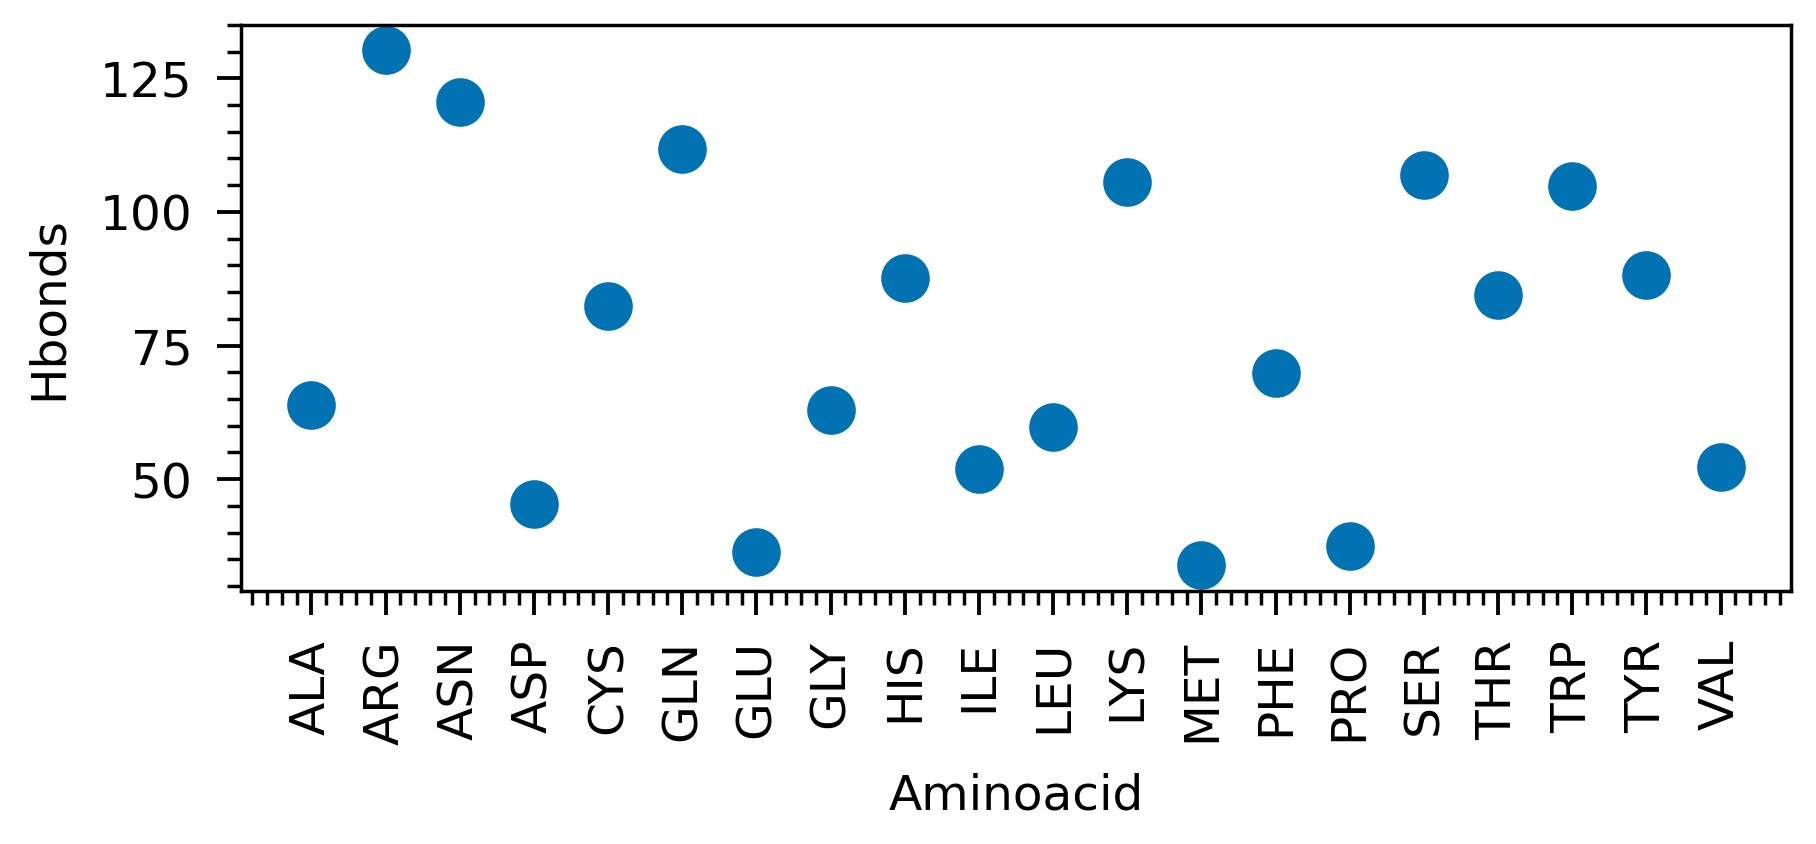

In [47]:
plt.figure(figsize=(4,1.5))

plt.plot(x_residue,x,'o')
plt.xticks(rotation=90)
plt.ylabel('Hbonds')
plt.xlabel('Aminoacid')

In [48]:
#### hbonds
for i in x_residue:
    
    if 'HBDonor' in inter[i].columns and 'HBAcceptor' in inter[i].columns: 
        inter[i]['Hbonds']= inter[i]['HBDonor'] + inter[i]['HBAcceptor']
        
    elif 'HBDonor' in inter[i].columns and 'HBAcceptor' not in inter[i].columns:
        inter[i]['Hbonds']= inter[i]['HBDonor']
        
    elif 'HBDonor' not in inter[i].columns and 'HBAcceptor' in inter[i].columns:
        inter[i]['Hbonds']= inter[i]['HBAcceptor']


hbonds_all = pd.DataFrame()

for i in x_residue:
    hbonds_all[i]=inter[i]['Hbonds']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'PRO'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'ILE'),
  Text(6, 0, 'VAL'),
  Text(7, 0, 'LEU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'ALA'),
  Text(10, 0, 'PHE'),
  Text(11, 0, 'CYS'),
  Text(12, 0, 'THR'),
  Text(13, 0, 'HIS'),
  Text(14, 0, 'TYR'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'LYS'),
  Text(17, 0, 'SER'),
  Text(18, 0, 'GLN'),
  Text(19, 0, 'ASN'),
  Text(20, 0, 'ARG')])

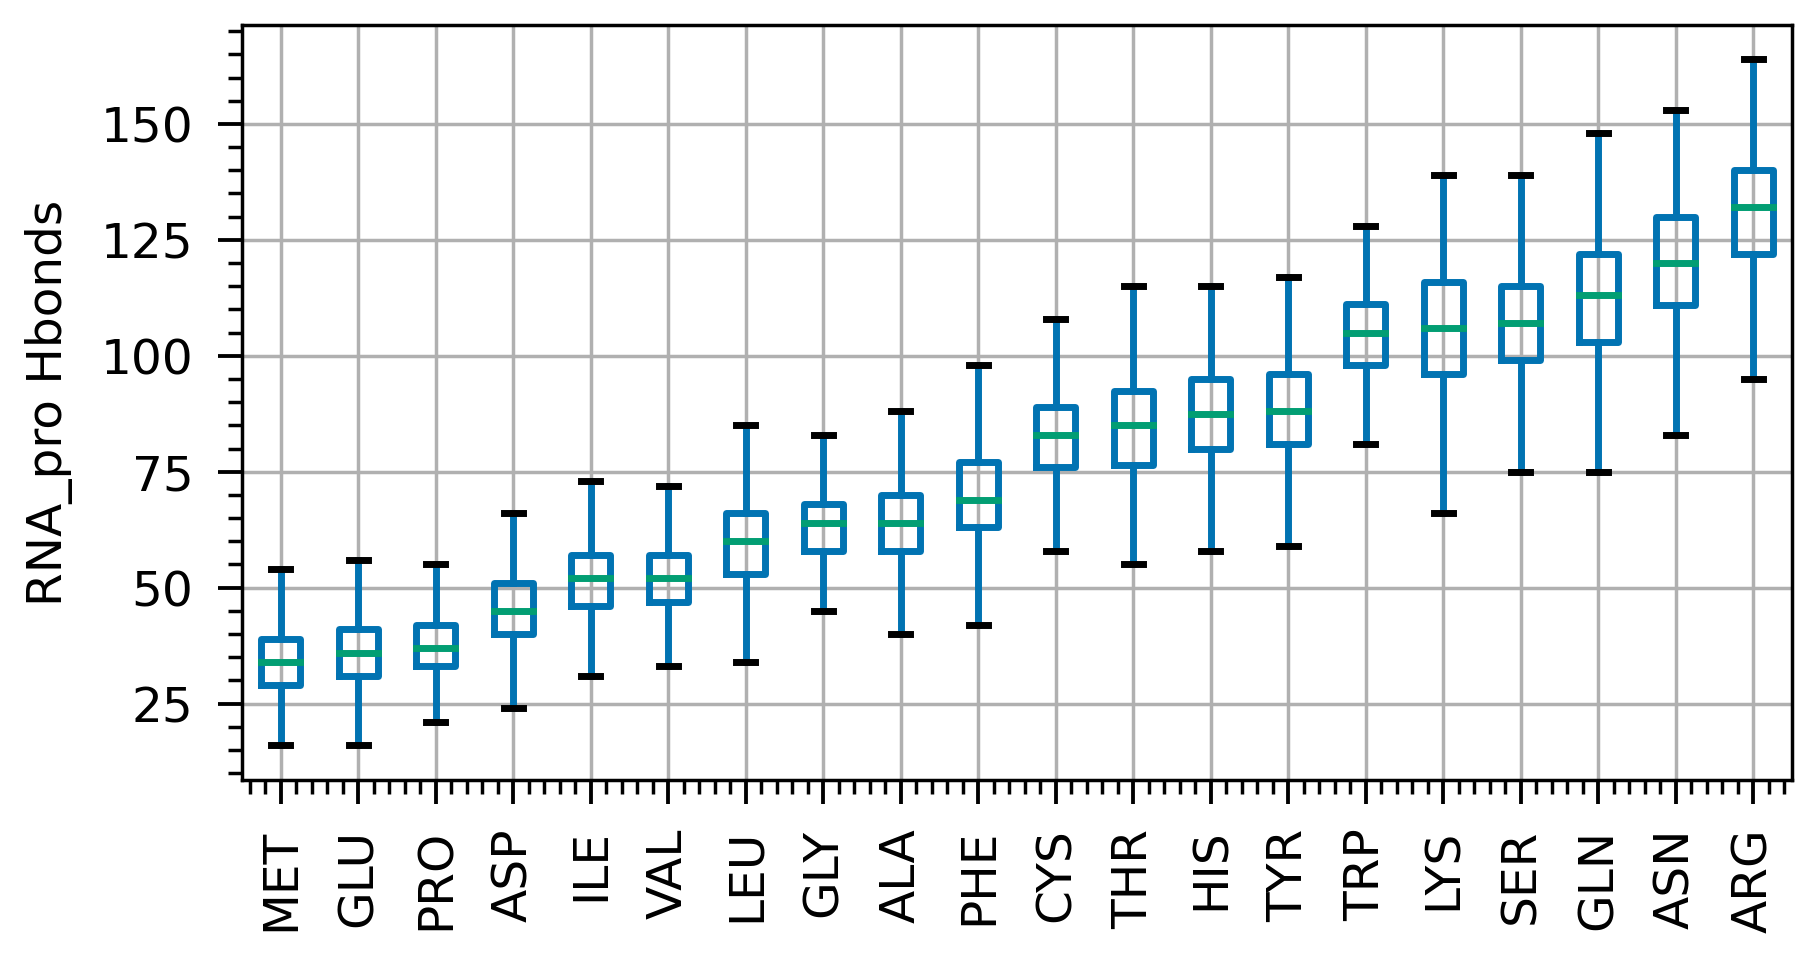

In [49]:
plt.figure(figsize=(4,2))
index_sort = hbonds_all.mean().sort_values().index
hbonds_all = hbonds_all[index_sort]
hbonds_all.boxplot(showfliers=False)
plt.ylabel('RNA_pro Hbonds')
plt.xticks(rotation=90)


In [50]:
#### RNA - RNA interaction
rna_inter = {}
for i in x_residue:
    
    all_f = pd.read_csv(f'{i}/contact_fp_rna_vysa.csv',header=[0,1, 2])
    
    rna_inter[i] = all_f .groupby(axis=1, level=2).sum()

In [51]:
#### hbonds
for i in x_residue:
    
    if 'HBDonor' in rna_inter[i].columns and 'HBAcceptor' in rna_inter[i].columns: 
        rna_inter[i]['Hbonds']= rna_inter[i]['HBDonor'] + rna_inter[i]['HBAcceptor']
        
    elif 'HBDonor' in rna_inter[i].columns and 'HBAcceptor' not in rna_inter[i].columns:
        rna_inter[i]['Hbonds']= rna_inter[i]['HBDonor']
        
    elif 'HBDonor' not in rna_inter[i].columns and 'HBAcceptor' in rna_inter[i].columns:
        rna_inter[i]['Hbonds']= rna_inter[i]['HBAcceptor']


hbonds_rna_all = pd.DataFrame()

for i in x_residue:
    hbonds_rna_all[i]=rna_inter[i]['Hbonds']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20]),
 [Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'PRO'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'ILE'),
  Text(6, 0, 'VAL'),
  Text(7, 0, 'LEU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'ALA'),
  Text(10, 0, 'PHE'),
  Text(11, 0, 'CYS'),
  Text(12, 0, 'THR'),
  Text(13, 0, 'HIS'),
  Text(14, 0, 'TYR'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'LYS'),
  Text(17, 0, 'SER'),
  Text(18, 0, 'GLN'),
  Text(19, 0, 'ASN'),
  Text(20, 0, 'ARG'),
  Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'PRO'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'ILE'),
  Text(6, 0, 'VAL'),
  Text(7, 0, 'LEU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'ALA'),
  Text(10, 0, 'PHE'),
  Text(11, 0, 'CYS'),
  Text(12, 0, 'THR'),
  Text(13, 0, 'HIS'),
  Text(14, 0, 'TYR'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'LYS'),
  Text(17, 0, 'SER'),
  Text(18, 0, 'GLN

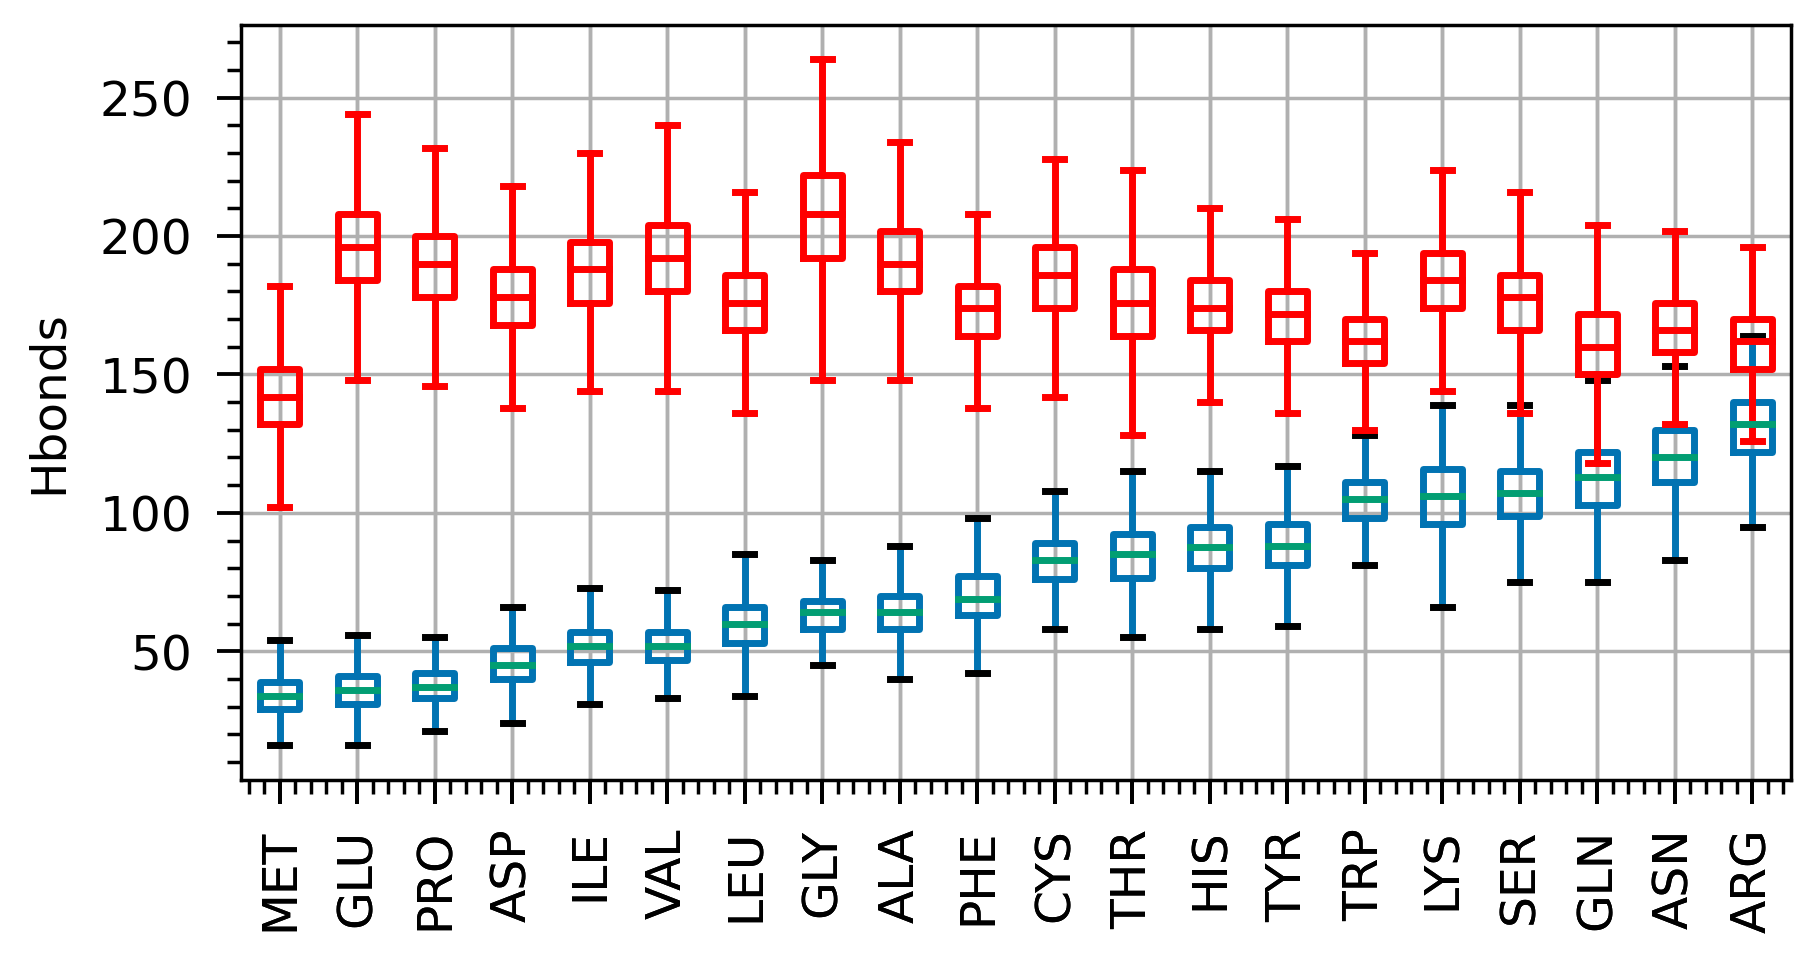

In [52]:

plt.figure(figsize=(4,2))
index_sort = hbonds_all.mean().sort_values().index
hbonds_all = hbonds_all[index_sort]
hbonds_rna_all = hbonds_rna_all[index_sort]

hbonds_all.boxplot(showfliers=False)
hbonds_rna_all.boxplot(showfliers=False,color='red')
plt.ylabel('Hbonds')
plt.xticks(rotation=90)


In [74]:
stack_all = pd.DataFrame()

for i in x_residue:
    
    if 'PiStacking' in inter[i].columns:
        
        stack_all[i]=inter[i]['PiStacking']

(array([1, 2, 3, 4]),
 [Text(1, 0, 'PHE'), Text(2, 0, 'HIS'), Text(3, 0, 'TYR'), Text(4, 0, 'TRP')])

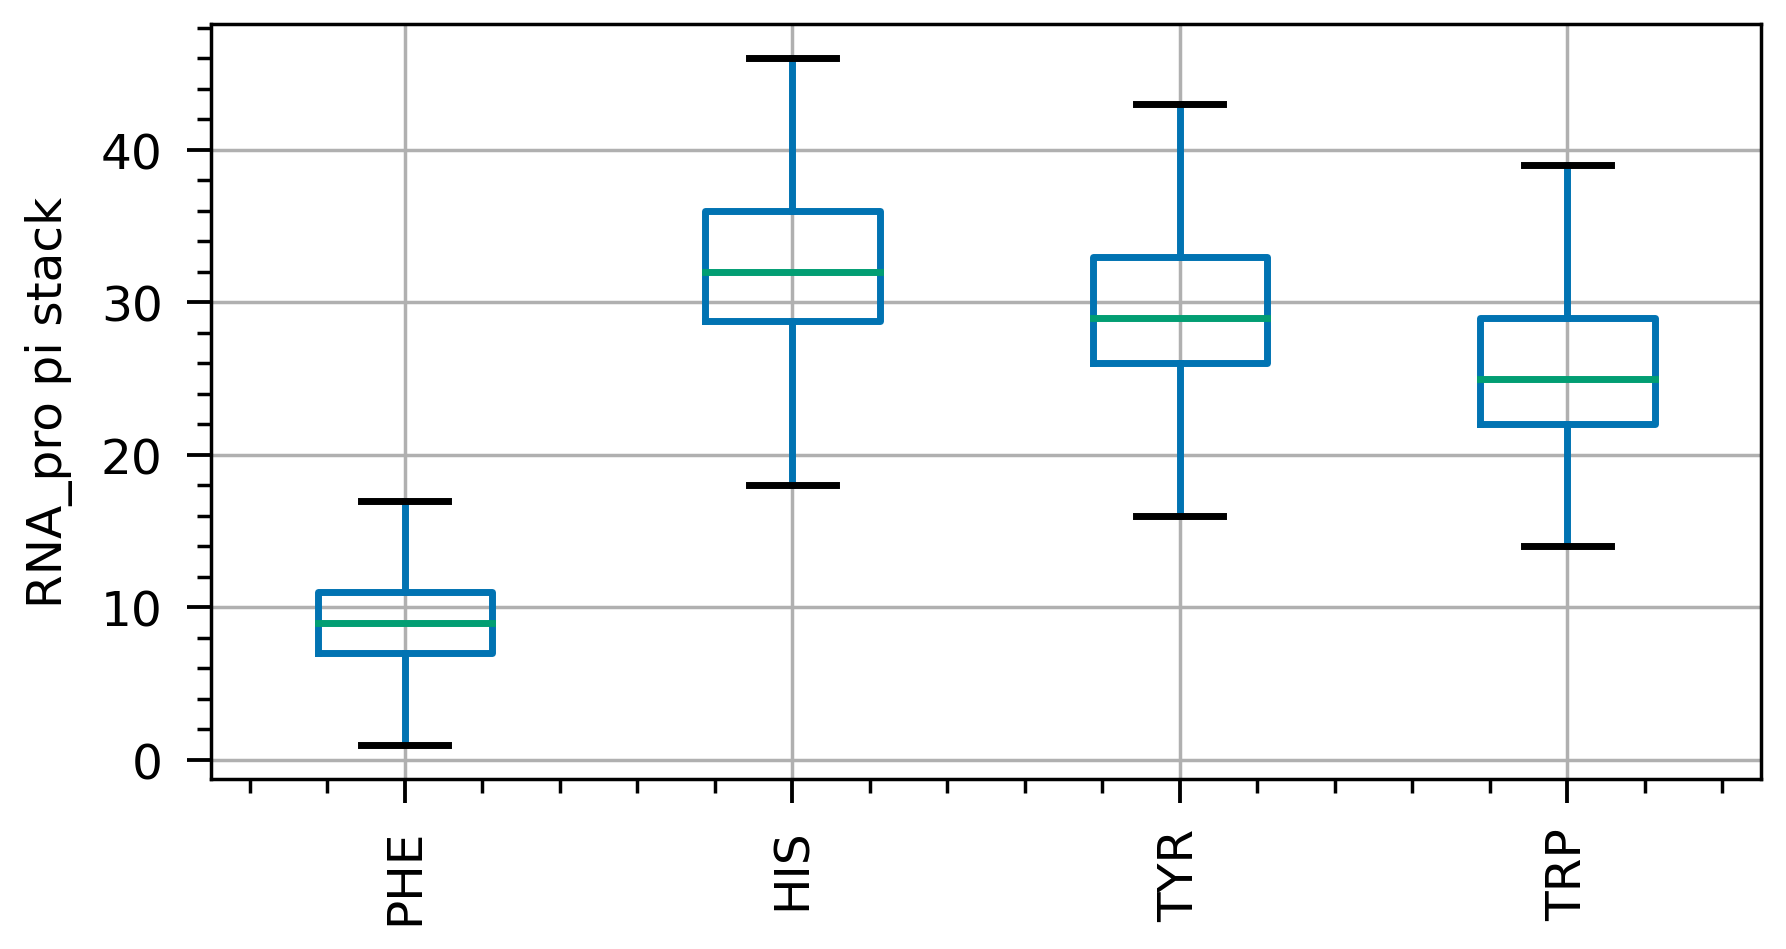

In [75]:
plt.figure(figsize=(4,2))
index_sort = stack_all.mean().sort_values().index
stack_all = hbonds_all[index_sort]
stack_all.boxplot(showfliers=False)
plt.ylabel('RNA_pro pi stack')
plt.xticks(rotation=90)

In [24]:
hydrophob_all = pd.DataFrame()

for i in x_residue:
    
    if 'Hydrophobic' in inter[i].columns:
        
        hydrophob_all[i]=inter[i]['Hydrophobic']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'GLU'),
  Text(2, 0, 'ASP'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'PRO'),
  Text(5, 0, 'LYS'),
  Text(6, 0, 'CYS'),
  Text(7, 0, 'MET'),
  Text(8, 0, 'ALA'),
  Text(9, 0, 'VAL'),
  Text(10, 0, 'THR'),
  Text(11, 0, 'ARG'),
  Text(12, 0, 'ILE'),
  Text(13, 0, 'LEU'),
  Text(14, 0, 'GLN'),
  Text(15, 0, 'PHE'),
  Text(16, 0, 'HIS'),
  Text(17, 0, 'TYR'),
  Text(18, 0, 'TRP')])

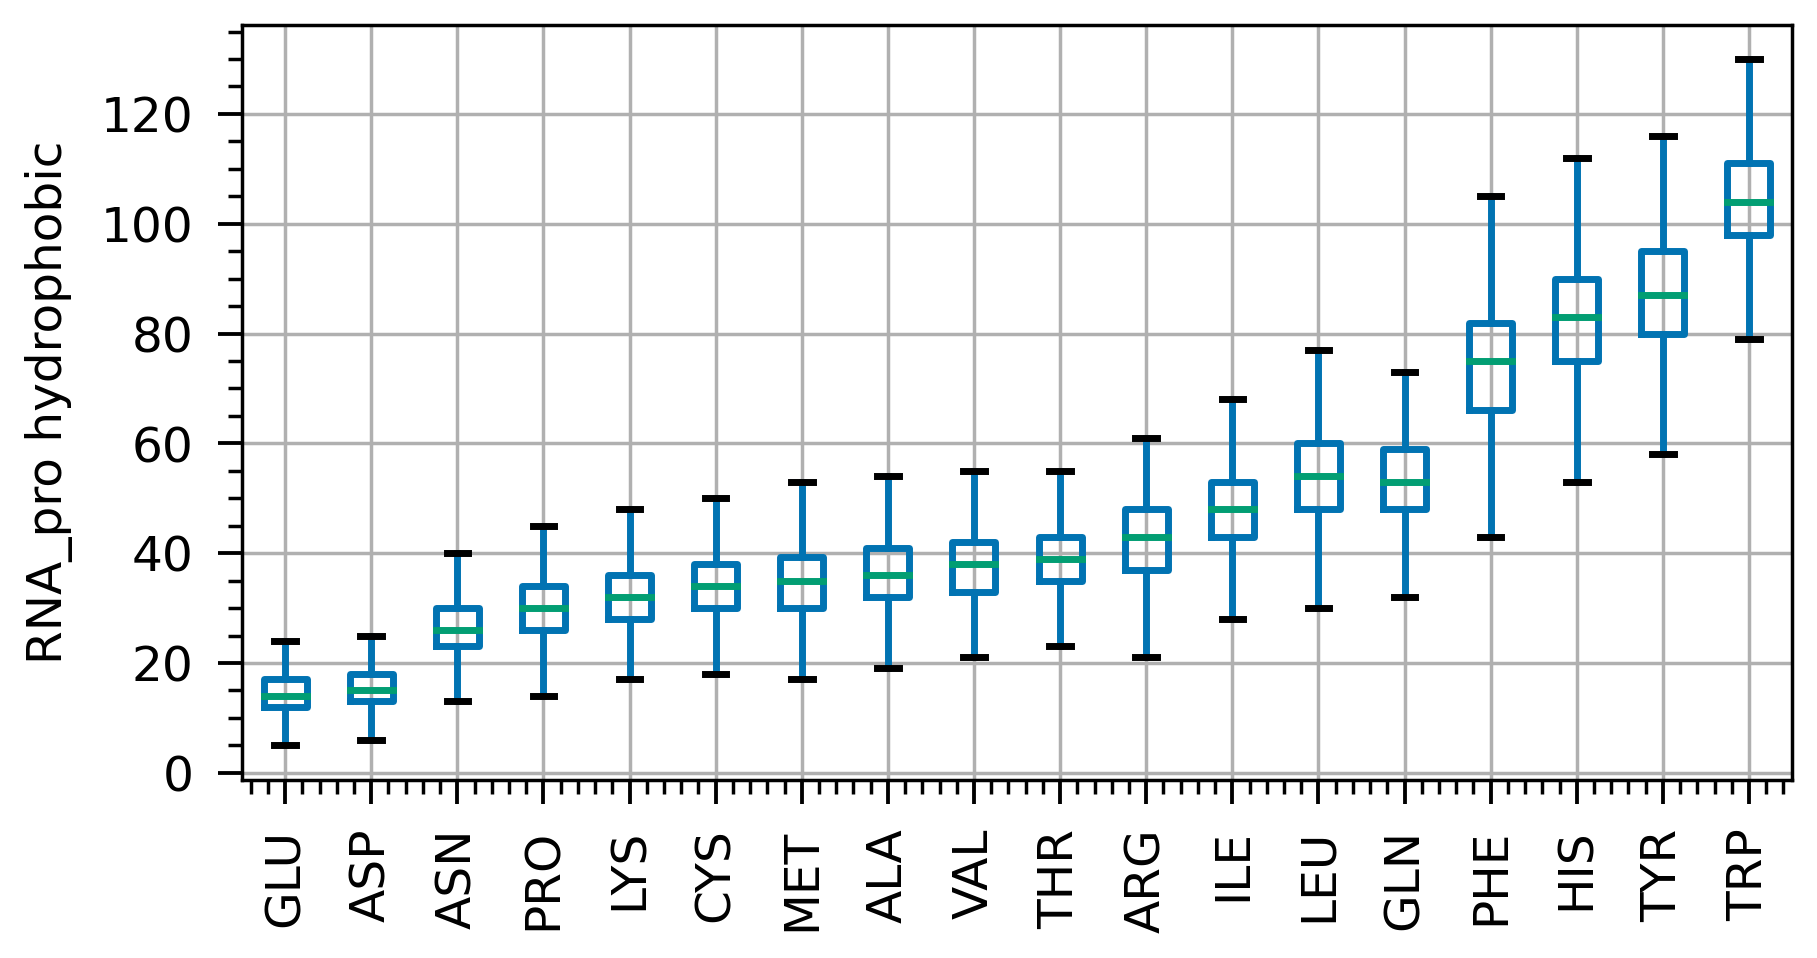

In [26]:
plt.figure(figsize=(4,2))
index_sort = hydrophob_all.mean().sort_values().index
hydrophob_all = hydrophob_all[index_sort]
hydrophob_all.boxplot(showfliers=False)
plt.ylabel('RNA_pro hydrophobic')
plt.xticks(rotation=90)

In [11]:
x_stack = []

for i in x_residue:
    
    if 'PiStacking' in inter[i].columns: 
        s1 = inter[i]['PiStacking'].mean()
        
    else: 
        
        s1 = 0

        
    x_stack.append(s1)

Text(0.5, 0, 'Aminoacid')

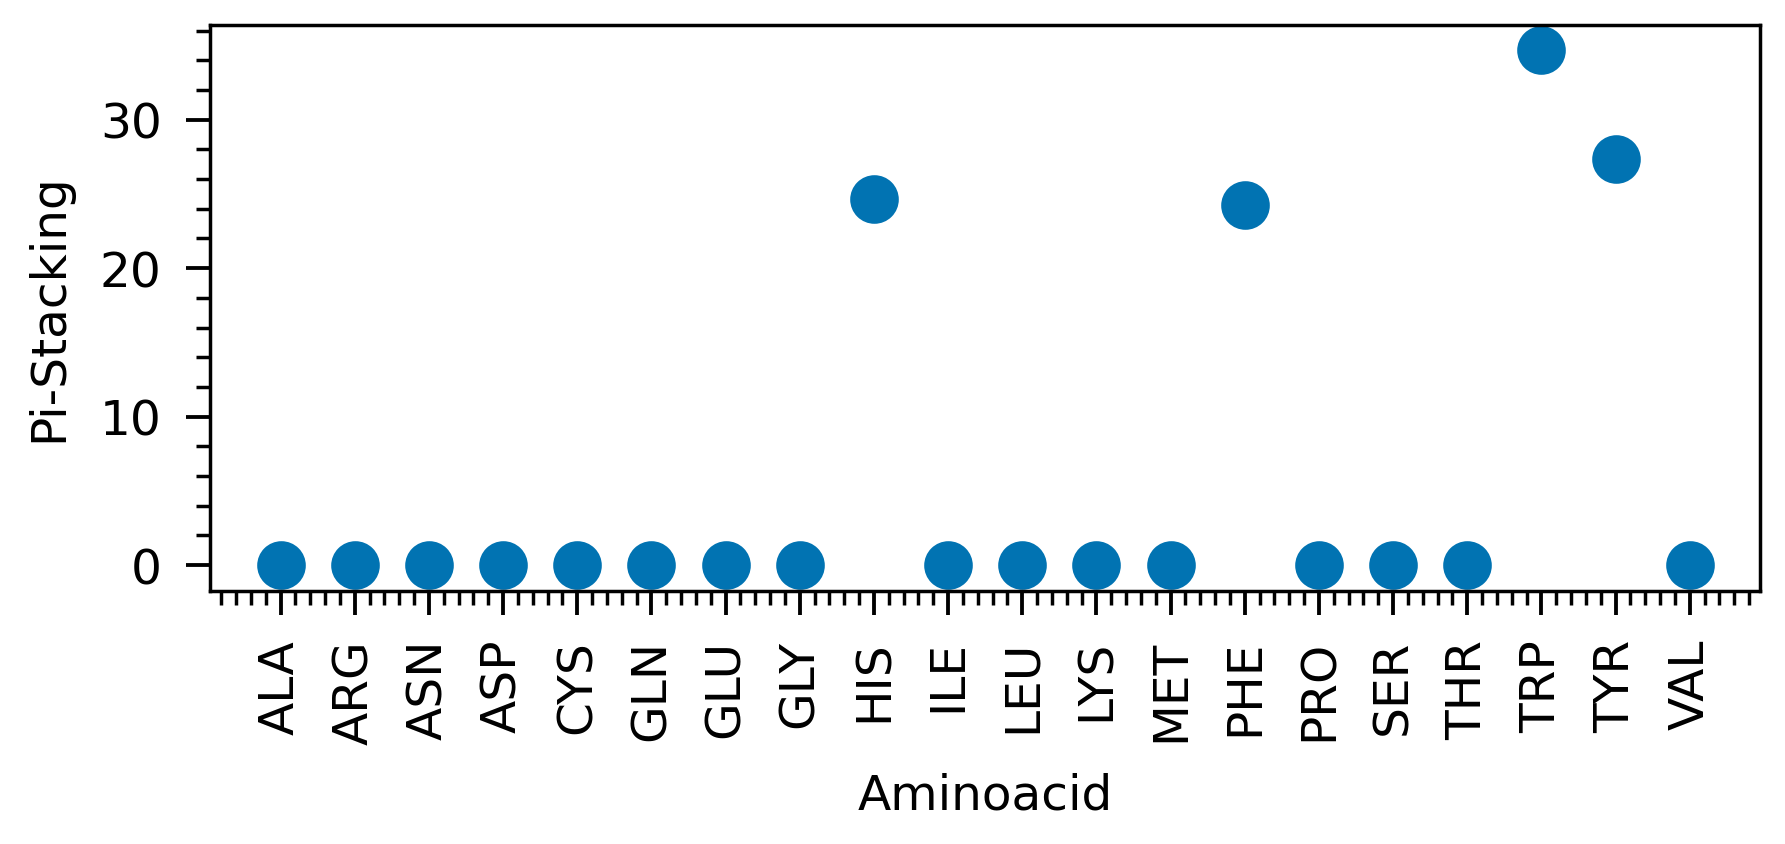

In [12]:
plt.figure(figsize=(4,1.5))

plt.plot(x_residue,x_stack,'o')
plt.xticks(rotation=90)
plt.ylabel('Pi-Stacking')
plt.xlabel('Aminoacid')

In [13]:
x_pc = []
for i in x_residue:
    
    if 'PiCation' in inter[i].columns: 
        s1 = inter[i]['PiCation'].mean()
        
    else: 
        
        s1 = 0
        
    x_pc.append(s1)

Text(0.5, 0, 'Aminoacid')

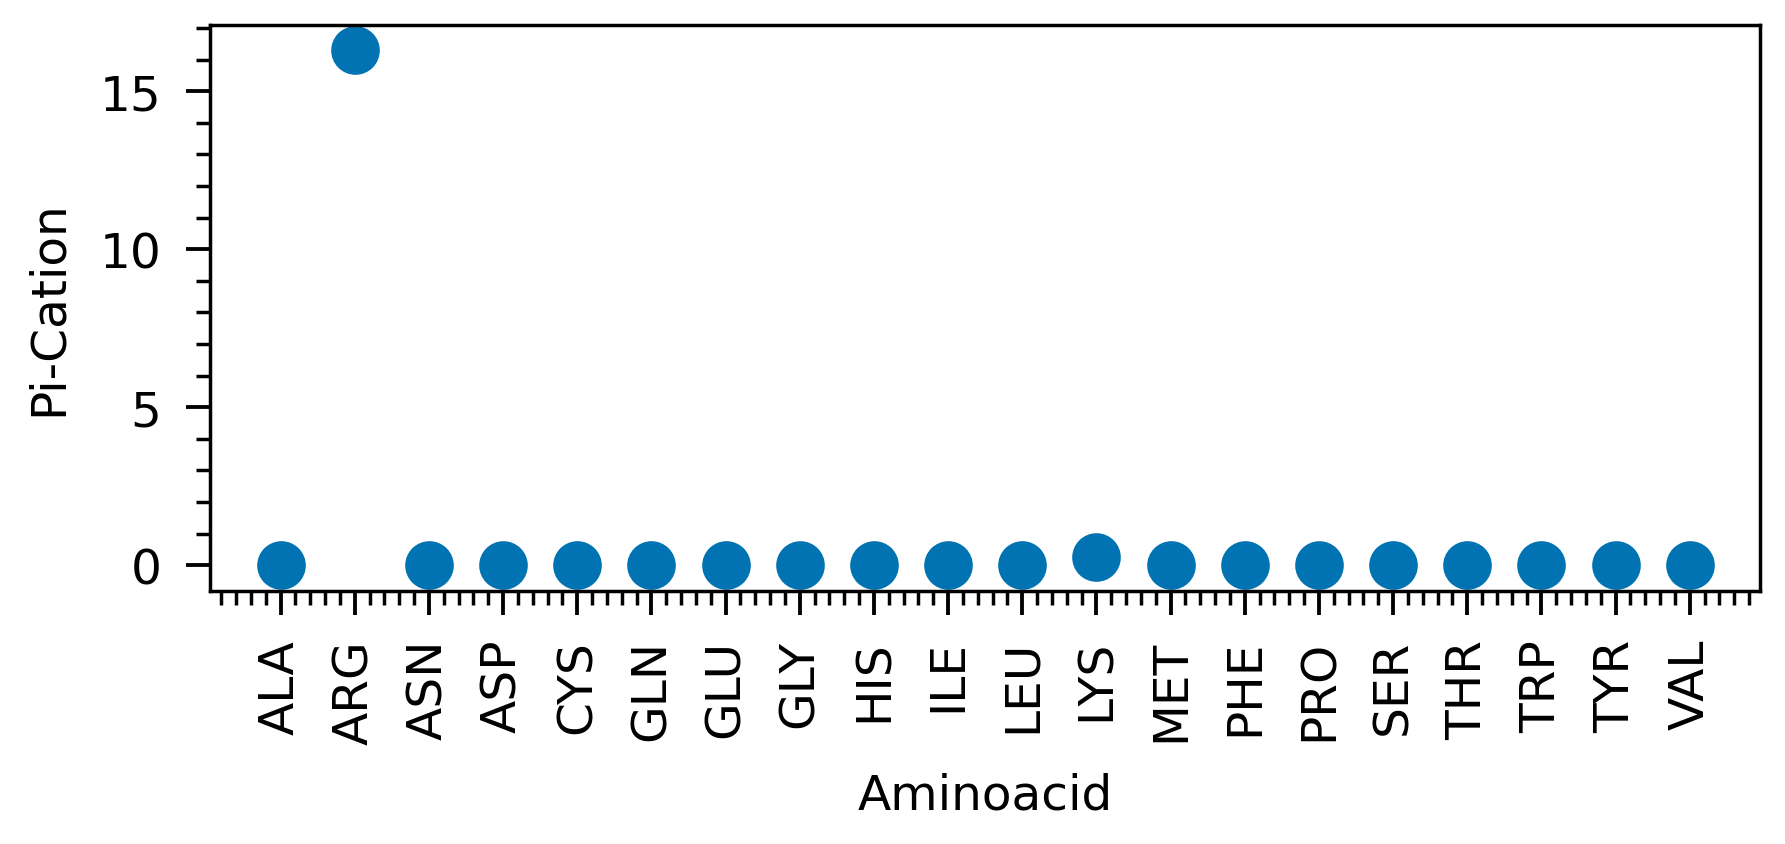

In [14]:
plt.figure(figsize=(4,1.5))

plt.plot(x_residue,x_pc,'o')

plt.xticks(rotation=90)
plt.ylabel('Pi-Cation')
plt.xlabel('Aminoacid')

In [15]:
x_hb = []

for i in x_residue:
    
    if 'Hydrophobic' in inter[i].columns: 
        s1 = inter[i]['Hydrophobic'].mean()
        
    else: 
        
        s1 = 0
        
    x_hb.append(s1)

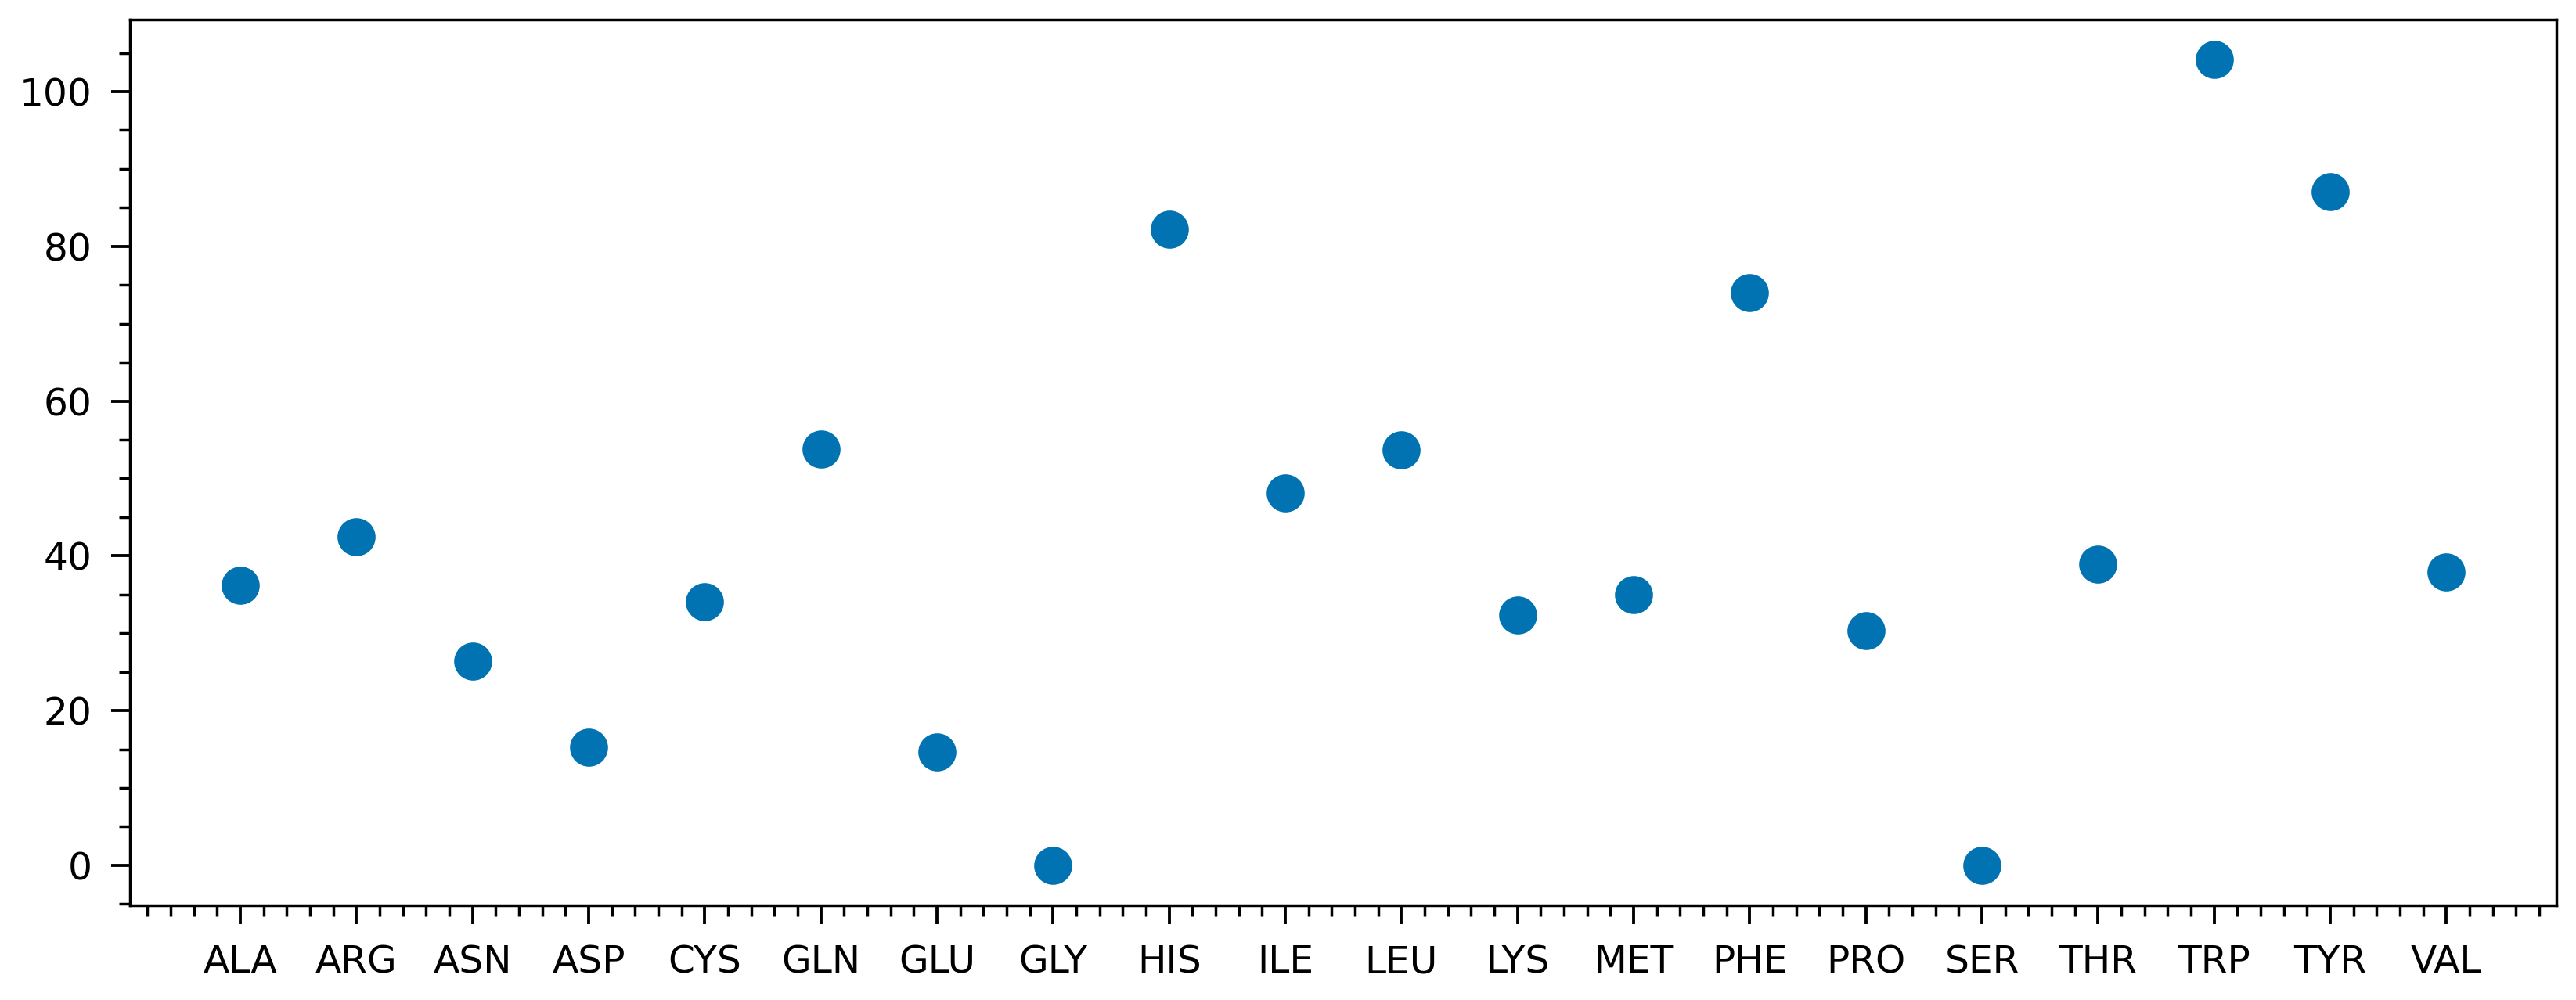

In [16]:
plt.figure(figsize=(8,3))

plt.plot(x_residue,x_hb,'o')

In [17]:
x_ha = []

for i in x_residue:
    
    if 'HBAcceptor' in inter[i].columns: 
        s1 = inter[i]['HBAcceptor'].mean()
        
    else: 
        
        s1 = 0
        
    x_ha.append(s1)

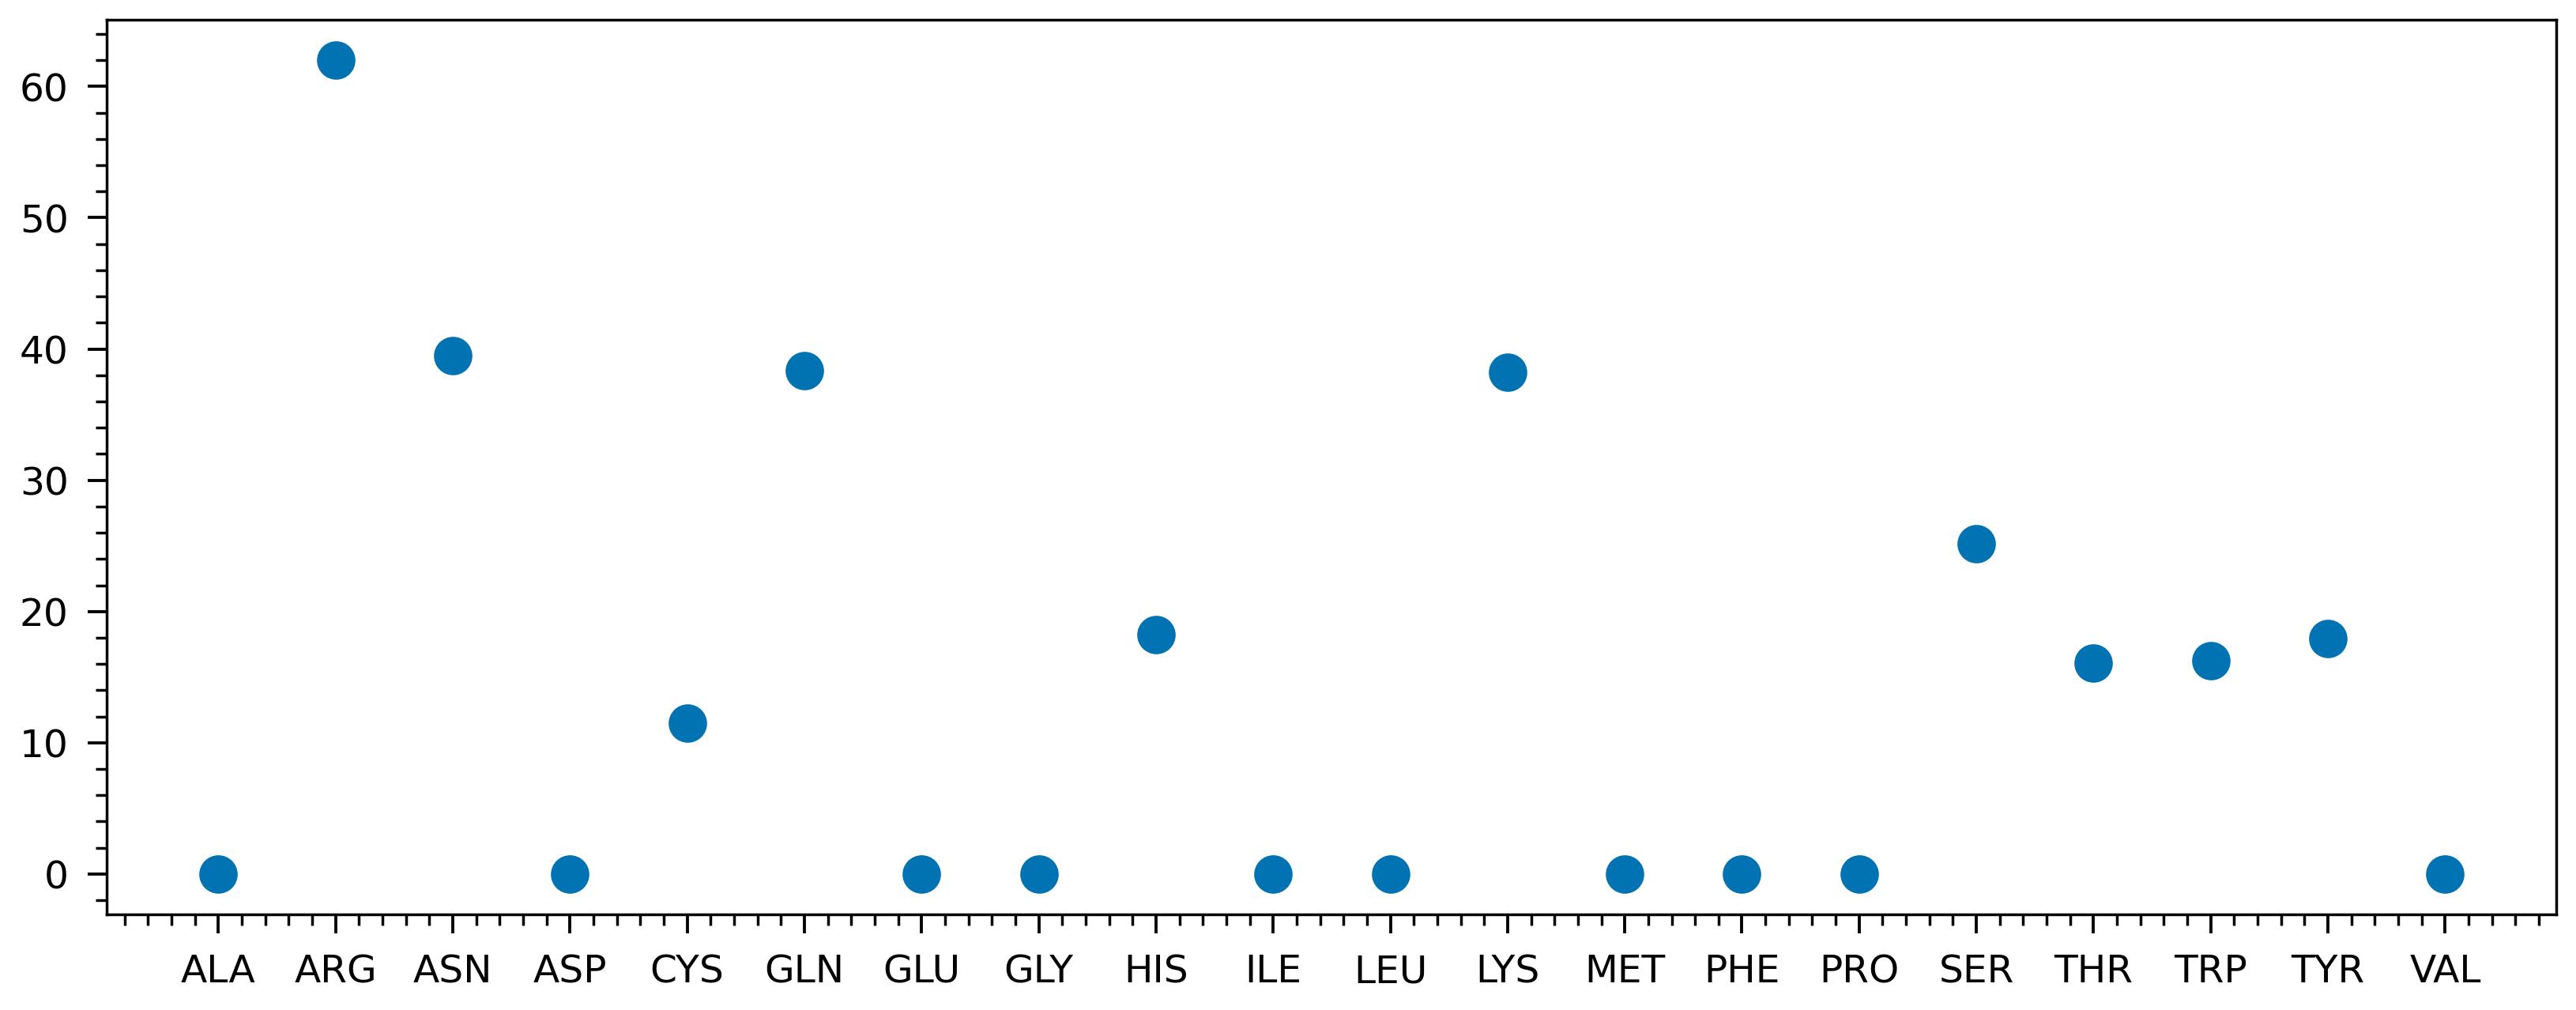

In [18]:
plt.figure(figsize=(8,3))
plt.plot(x_residue,x_ha,'o')

### RNA-RNA contacts

In [16]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']

In [17]:
rna_inter = {}

for i in x_residue:
    
    all_f = pd.read_csv(f'{i}/contact_fp_rna_vysa.csv',header=[0,1, 2])
    
    rna_inter[i] = all_f .groupby(axis=1, level=2).sum()


In [18]:
rna_inter

{'ALA':       HBAcceptor  HBDonor  Hydrophobic  PiStacking  VdWContact
 0            105      105          228          47         408
 1             99       99          234          45         408
 2            102      102          224          51         404
 3            102      102          230          47         408
 4            105      105          224          56         408
 ...          ...      ...          ...         ...         ...
 9995         102      102          228          32         396
 9996         103      103          226          38         382
 9997         105      105          218          31         392
 9998         104      104          218          35         392
 9999         108      108          230          32         416
 
 [10000 rows x 5 columns],
 'ARG':       HBAcceptor  HBDonor  Hydrophobic  PiStacking  VdWContact
 0             84       84          220          34         318
 1             79       79          228          28         3

In [19]:
x_rna = []

for i in x_residue:
    
    if 'HBDonor' in rna_inter[i].columns: 
        value1 = rna_inter[i]['HBDonor'].mean()
        
    else: 
        
        value1 = 0
    if 'HBAcceptor' in rna_inter[i].columns:
        value2 = rna_inter[i]['HBAcceptor'].mean()
        
    else: 
        
        value2 = 0

    x_rna.append(value1+value2)

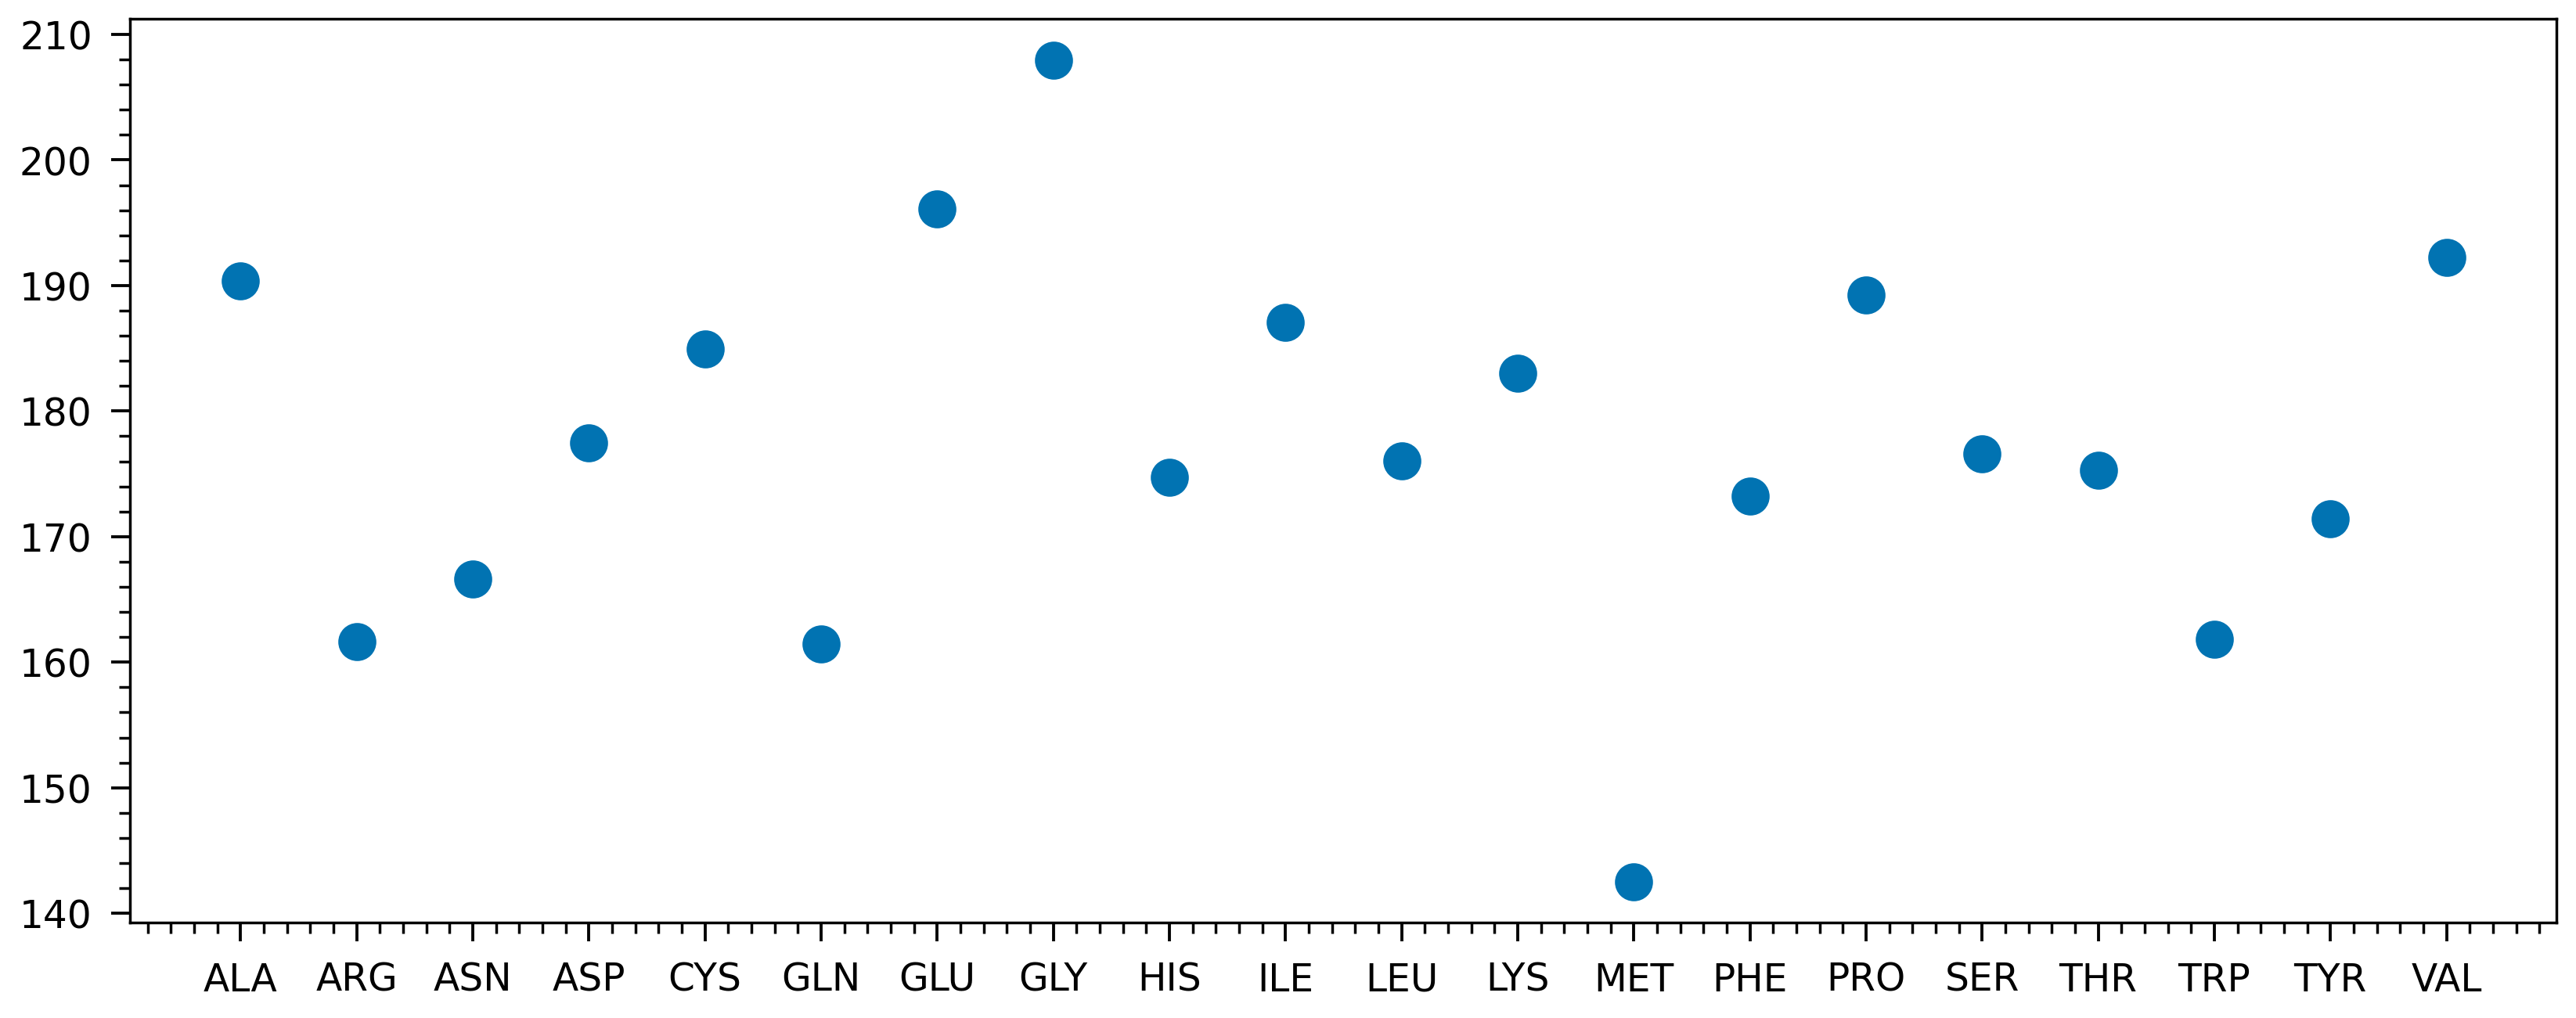

In [20]:
plt.figure(figsize=(8,3))
plt.plot(x_residue,x_rna,'o')

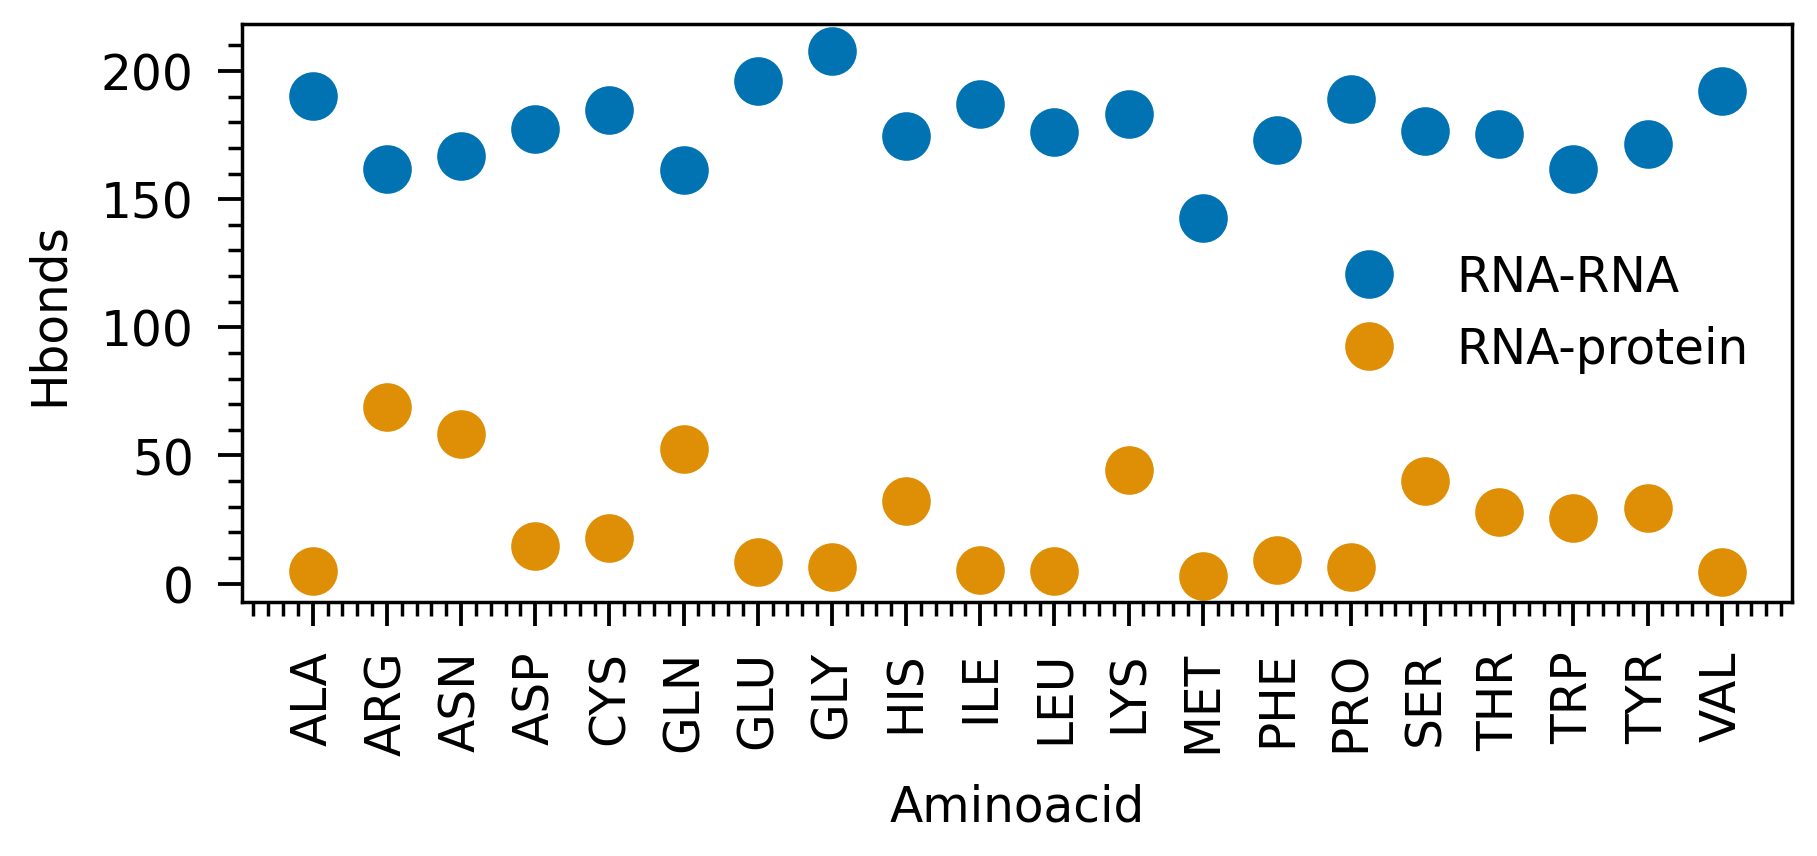

In [21]:
plt.figure(figsize=(4,1.5))
plt.plot(x_residue,x_rna,'o',label='RNA-RNA')
plt.plot(x_residue,x,'o',label='RNA-protein')

plt.xticks(rotation=90)
plt.ylabel('Hbonds')
plt.xlabel('Aminoacid')
plt.legend()

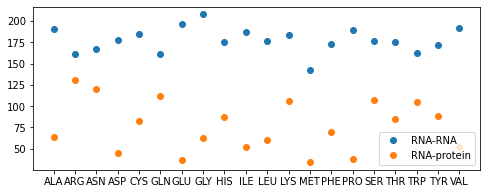

In [240]:
plt.figure(figsize=(8,3))
plt.plot(x_residue,x_rna,'o',label='RNA-RNA')
plt.plot(x_residue,x_rna_pro,'o',label='RNA-protein')
plt.legend()

In [34]:
x_stack_rna= []

for i in x_residue:
    
    if 'PiStacking' in rna_inter[i].columns: 
        s1 = rna_inter[i]['PiStacking'].mean()
        
    else: 
        
        s1 = 0
        
    x_stack_rna.append(s1)

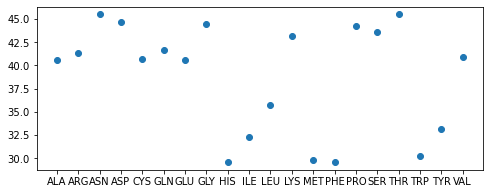

In [133]:
plt.figure(figsize=(8,3))
plt.plot(x_residue,x_stack_rna,'o')

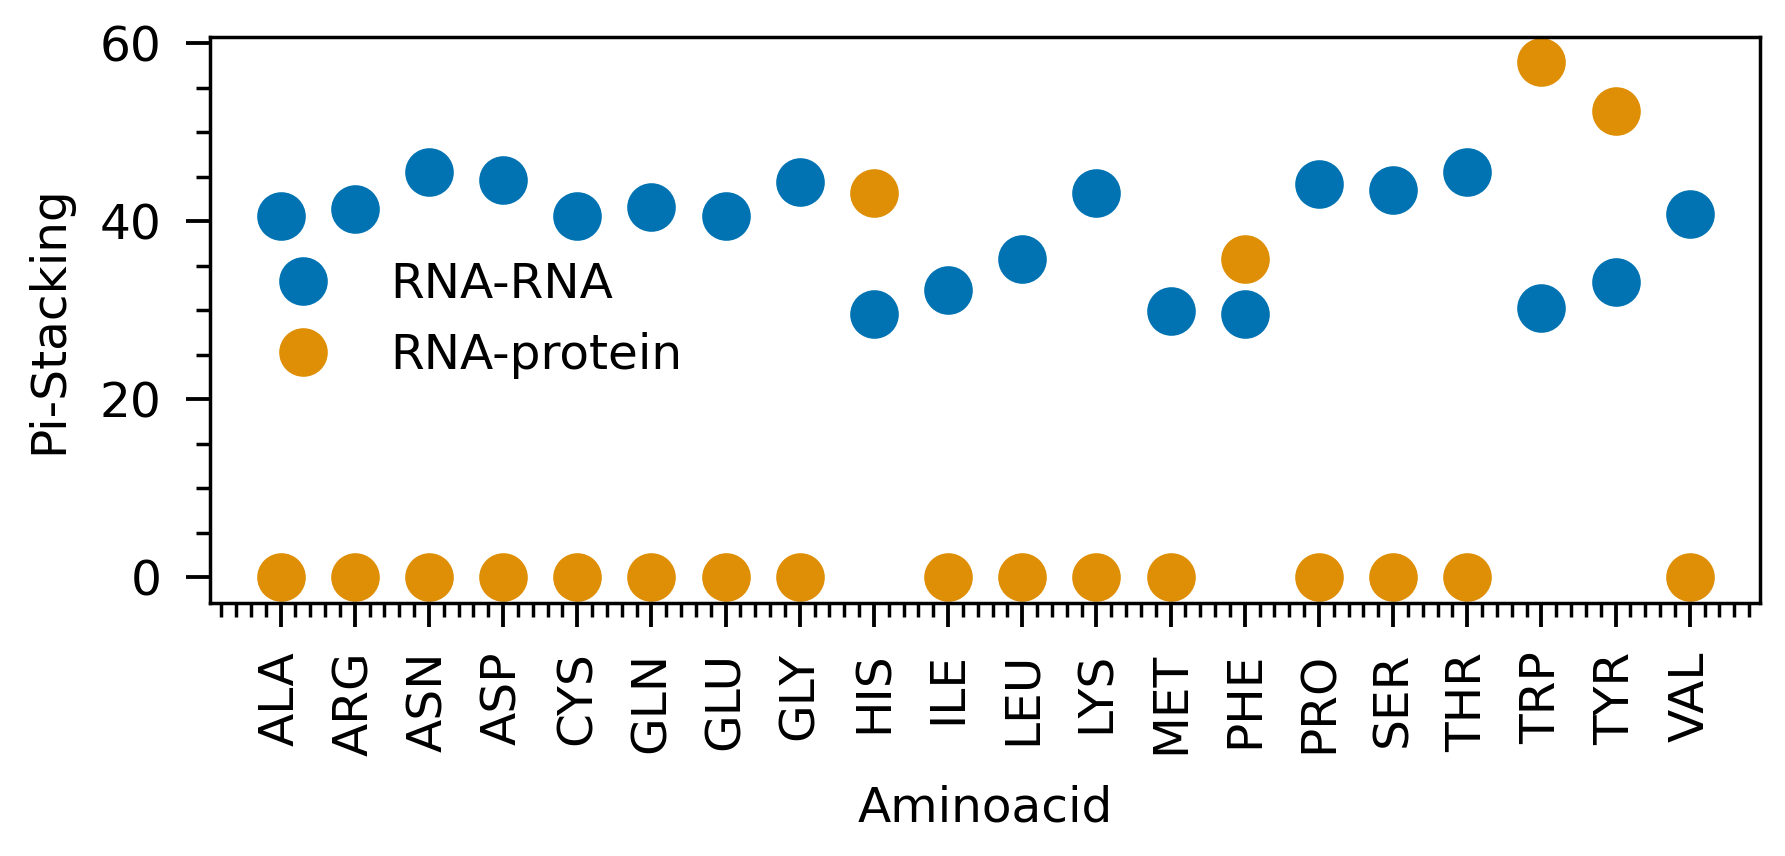

In [35]:
plt.figure(figsize=(4,1.5))
plt.plot(x_residue,x_stack_rna,'o',label='RNA-RNA')
plt.plot(x_residue,x_stack,'o',label='RNA-protein')

plt.xticks(rotation=90)
plt.ylabel('Pi-Stacking')
plt.xlabel('Aminoacid')
plt.legend()

In [36]:


x_vdw_rna= []

for i in x_residue:
    
    if 'VdWContact' in rna_inter[i].columns: 
        s1 = rna_inter[i]['VdWContact'].mean()
        
    else: 
        
        s1 = 0
        
    x_vdw_rna.append(s1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


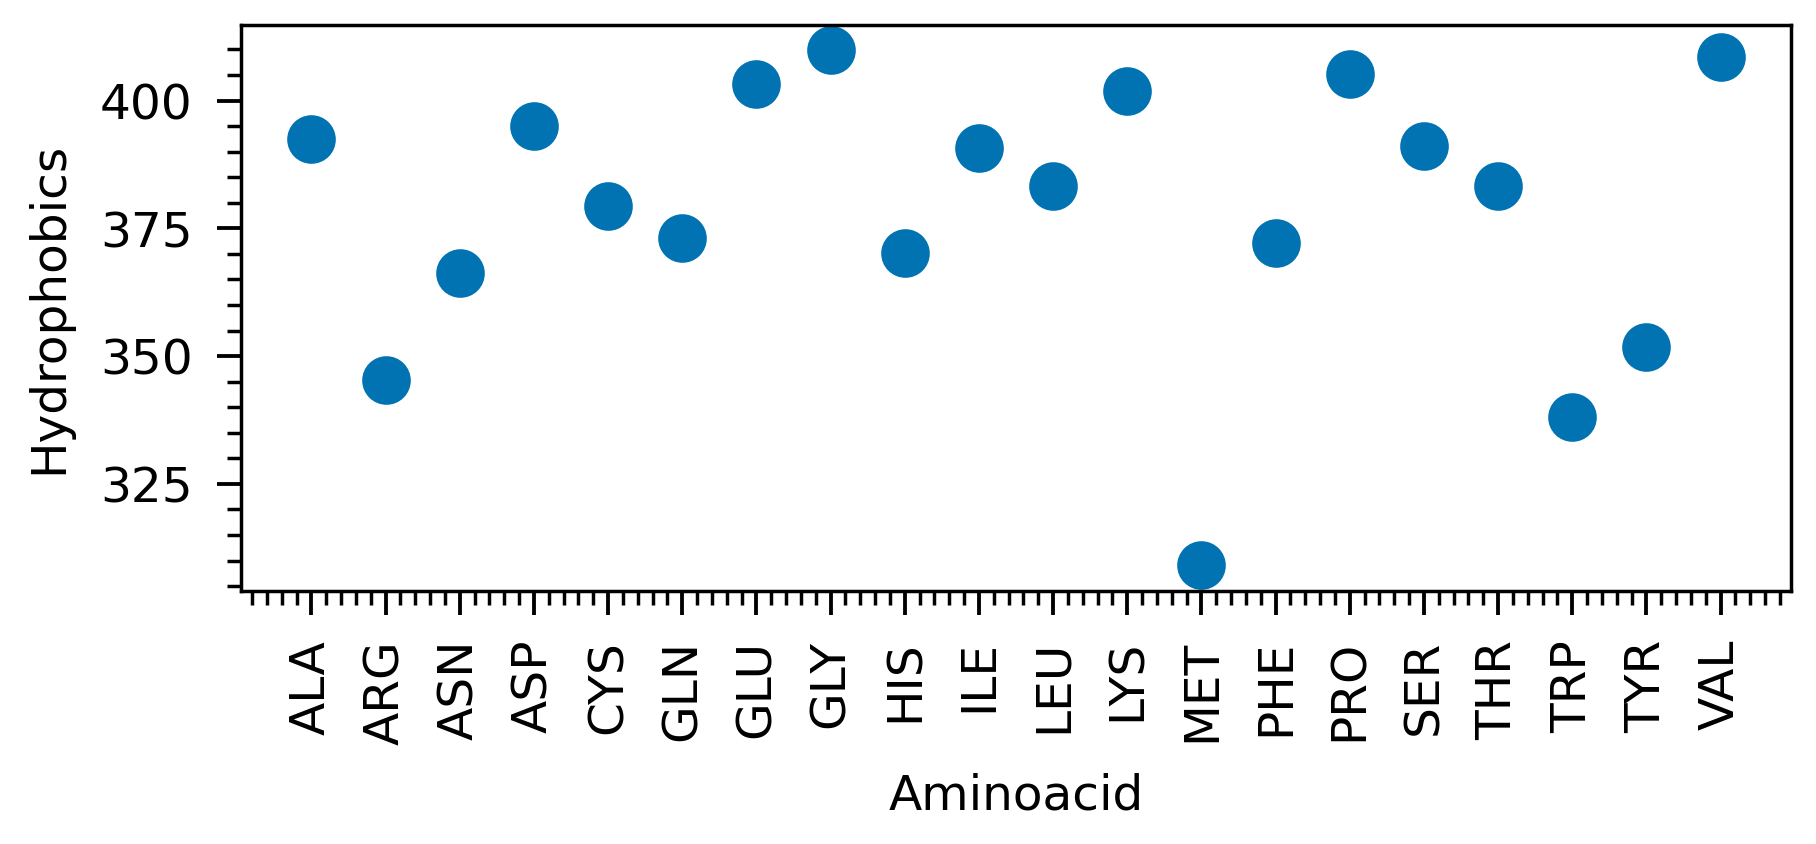

In [37]:
plt.figure(figsize=(4,1.5))
plt.plot(x_residue,x_vdw_rna,'o')

plt.xticks(rotation=90)
plt.ylabel('Hydrophobics')
plt.xlabel('Aminoacid')
plt.legend()

## pro contacts

In [27]:
x_residue = ['ALA','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']

In [36]:
pro_inter = {}

for i in x_residue:
    
    all_f = pd.read_csv(f'contact_pro_{i}_vysa2.csv')
    
    pro_inter[i] = all_f

In [37]:
for i in x_residue:
    
    if 'HBDonor' in pro_inter[i].columns and 'HBAcceptor' in pro_inter[i].columns: 
        pro_inter[i]['Hbonds']= pro_inter[i]['HBDonor'] + pro_inter[i]['HBAcceptor']
        
    elif 'HBDonor' in pro_inter[i].columns and 'HBAcceptor' not in pro_inter[i].columns:
        pro_inter[i]['Hbonds']= pro_inter[i]['HBDonor']
        
    elif 'HBDonor' not in pro_inter[i].columns and 'HBAcceptor' in pro_inter[i].columns:
        pro_inter[i]['Hbonds']= pro_inter[i]['HBAcceptor']


hbonds_all = pd.DataFrame()

for i in x_residue:
    hbonds_all[i]=pro_inter[i]['Hbonds']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'PRO'),
  Text(2, 0, 'MET'),
  Text(3, 0, 'VAL'),
  Text(4, 0, 'GLU'),
  Text(5, 0, 'ALA'),
  Text(6, 0, 'ILE'),
  Text(7, 0, 'LEU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'PHE'),
  Text(10, 0, 'CYS'),
  Text(11, 0, 'ASP'),
  Text(12, 0, 'TYR'),
  Text(13, 0, 'TRP'),
  Text(14, 0, 'HIS'),
  Text(15, 0, 'LYS'),
  Text(16, 0, 'THR'),
  Text(17, 0, 'SER'),
  Text(18, 0, 'GLN'),
  Text(19, 0, 'ASN')])

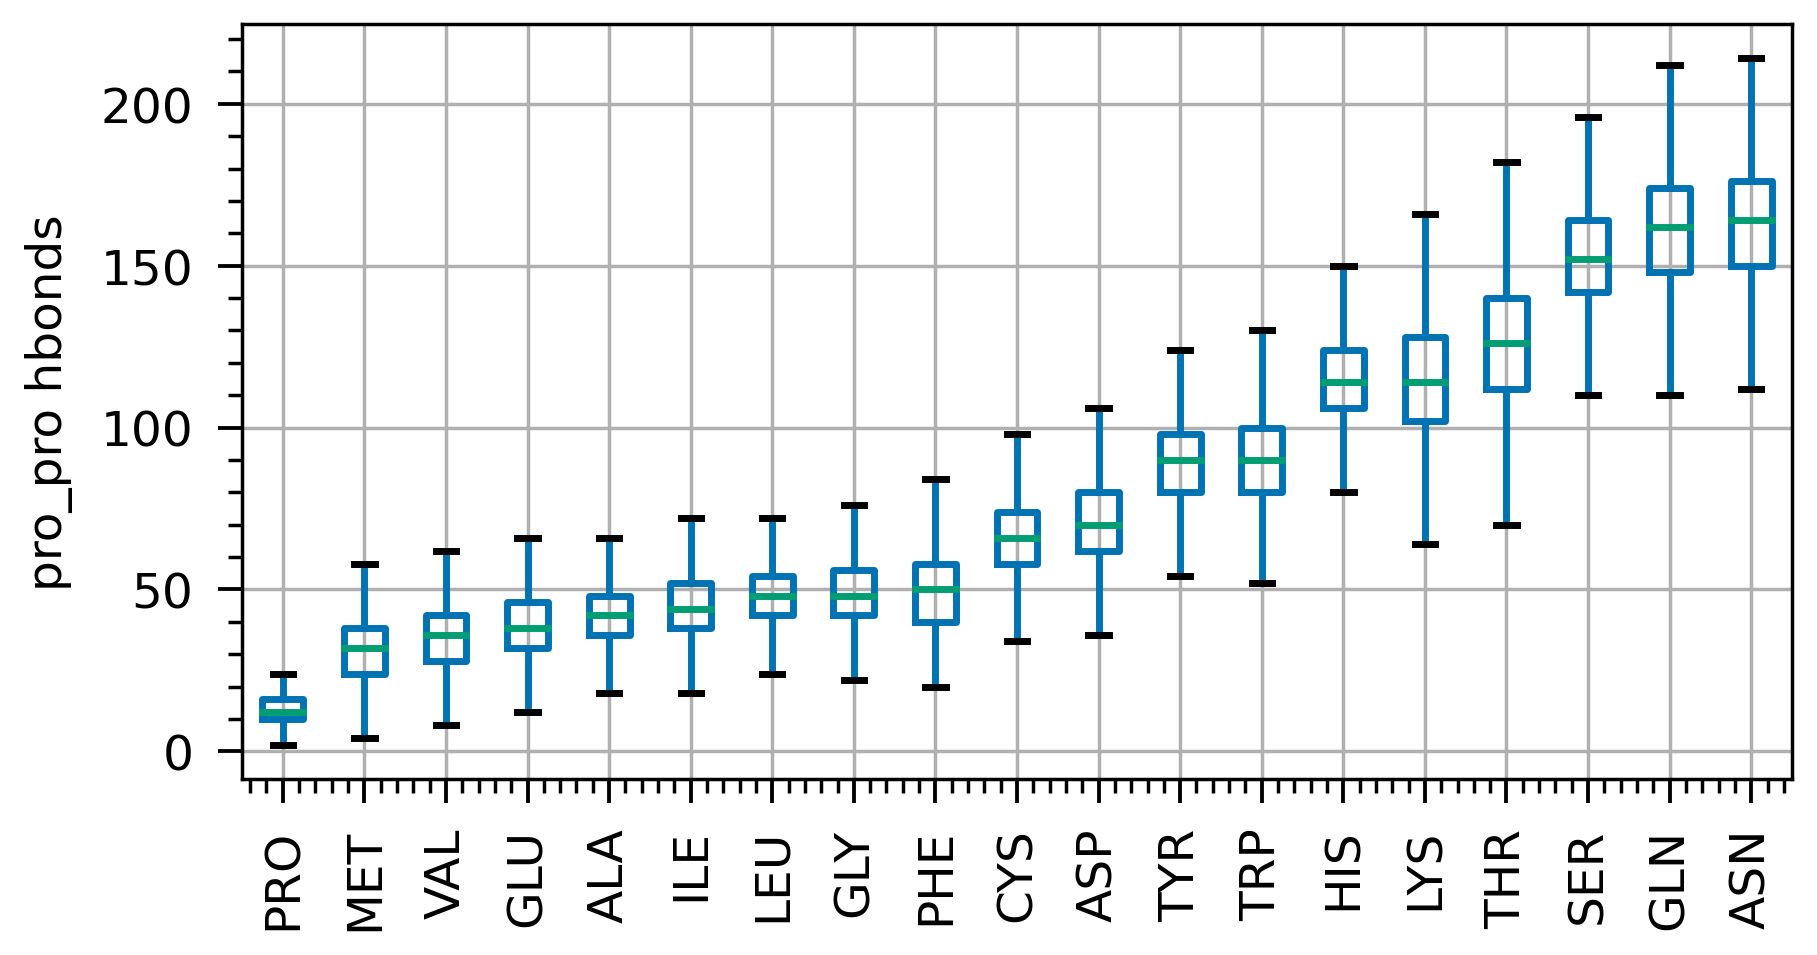

In [38]:
plt.figure(figsize=(4,2))
index_sort = hbonds_all.mean().sort_values().index
hbonds_all= hbonds_all[index_sort]
hbonds_all.boxplot(showfliers=False)
plt.ylabel('pro_pro hbonds')
plt.xticks(rotation=90)

In [24]:
pro_inter

{'ALA':       Anionic  Cationic  HBAcceptor  HBDonor  Hydrophobic  VdWContact
 0          52        52          28       28          130        1016
 1          52        52          23       23          118         966
 2          47        47          22       22          120         948
 3          56        56          26       26          122         982
 4          53        53          25       25          116         960
 ...       ...       ...         ...      ...          ...         ...
 3995       41        41           8        8          120         902
 3996       39        39          17       17          122         906
 3997       36        36          14       14          116         896
 3998       43        43          21       21          120         930
 3999       39        39          15       15          116         886
 
 [4000 rows x 6 columns],
 'ASN':       Anionic  Cationic  HBAcceptor  HBDonor  Hydrophobic  VdWContact
 0          72        72          9

In [25]:
x_pro = []

for i in x_residue:
    
    if 'HBDonor' in pro_inter[i].columns: 
        value1 = pro_inter[i]['HBDonor'].mean()
        
    else: 
        
        value1 = 0
    if 'HBAcceptor' in pro_inter[i].columns:
        value2 = pro_inter[i]['HBAcceptor'].mean()
        
    else: 
        
        value2 = 0

    x_pro.append(value1+value2)

No handles with labels found to put in legend.


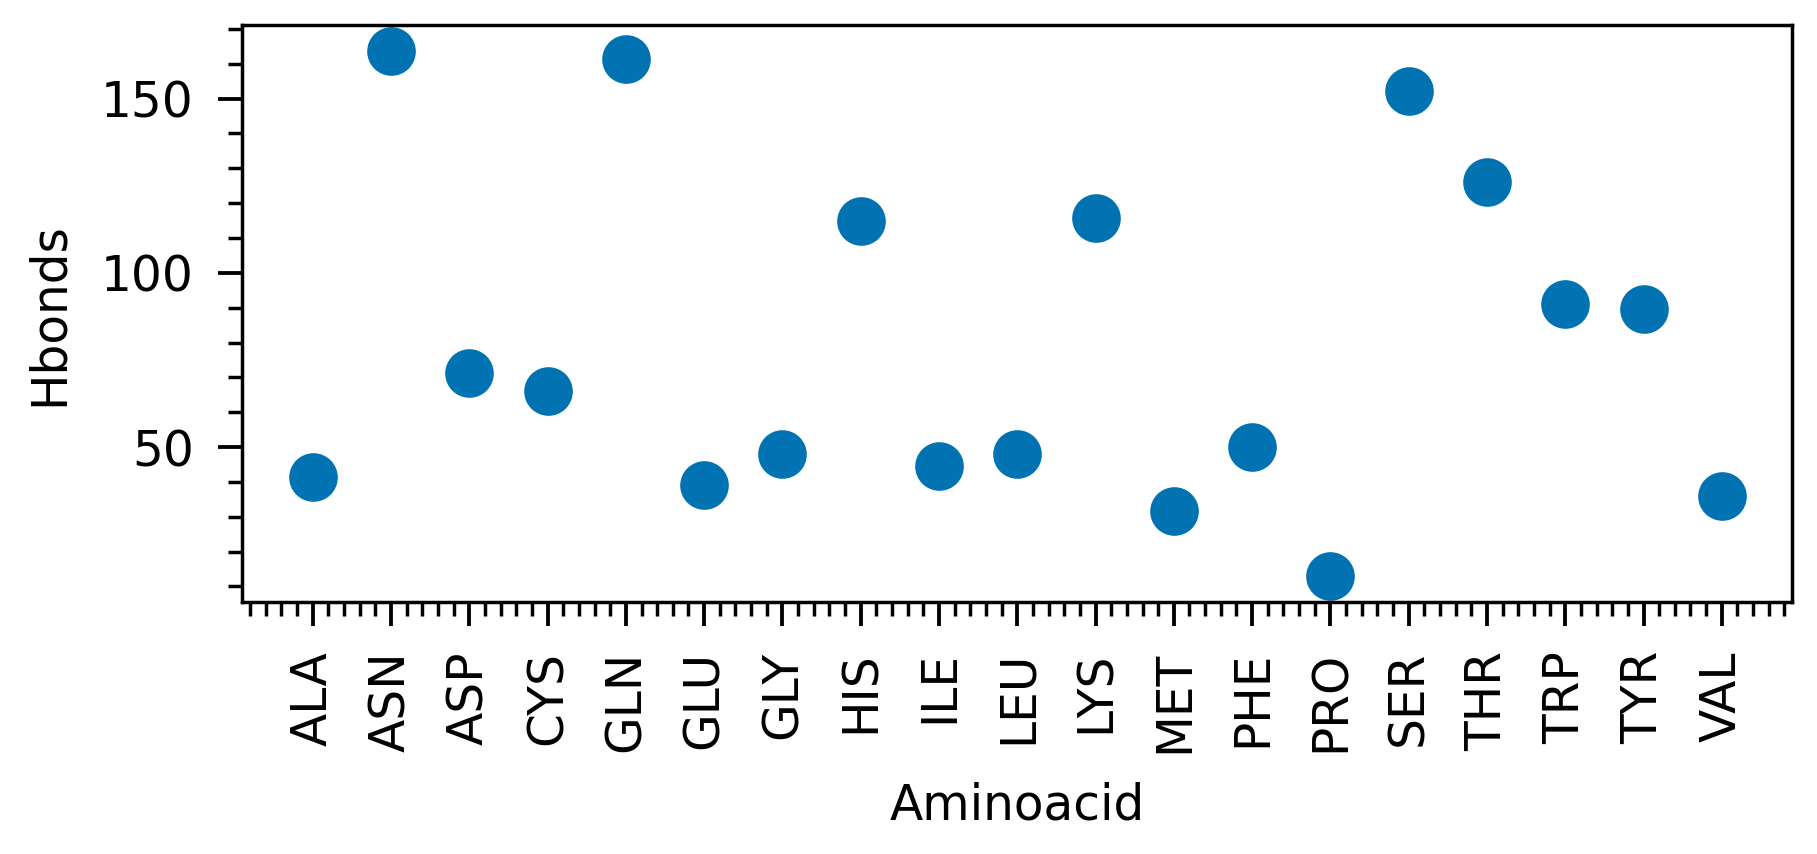

In [26]:
plt.figure(figsize=(4,1.5))
plt.plot(x_residue,x_pro,'o')

plt.xticks(rotation=90)
plt.ylabel('Hbonds')
plt.xlabel('Aminoacid')
plt.legend()

# RNA-PRo

In [122]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']

In [123]:
rna_pro_inter = {}

for i in x_residue:
    
    all_f = pd.read_csv(f'contact_rna_pro_{i}_20_vysa.csv')
    
    rna_pro_inter[i] = all_f

In [124]:
rna_pro_inter

{'ALA':      Anionic  HBAcceptor  HBDonor  Hydrophobic  PiCation  VdWContact
 0         42          26       33           46         0         246
 1         43          33       33           41         0         255
 2         42          32       39           44         0         249
 3         45          31       40           45         0         257
 4         43          37       33           38         0         254
 ..       ...         ...      ...          ...       ...         ...
 995       46          27       21           27         0         206
 996       44          32       23           31         0         200
 997       39          31       24           28         0         204
 998       39          30       27           22         0         195
 999       40          26       28           27         0         208
 
 [1000 rows x 6 columns],
 'ARG':      Anionic  HBAcceptor  HBDonor  Hydrophobic  PiCation  VdWContact
 0         71          86       27           28 

In [125]:
x_rna_pro = []

for i in x_residue:
    
    if 'HBDonor' in rna_pro_inter[i].columns: 
        value1 = rna_pro_inter[i]['HBDonor'].mean()
        
    else: 
        
        value1 = 0
    if 'HBAcceptor' in rna_pro_inter[i].columns:
        value2 = rna_pro_inter[i]['HBAcceptor'].mean()
        
    else: 
        
        value2 = 0

    x_rna_pro.append(value1+value2)

<BarContainer object of 20 artists>

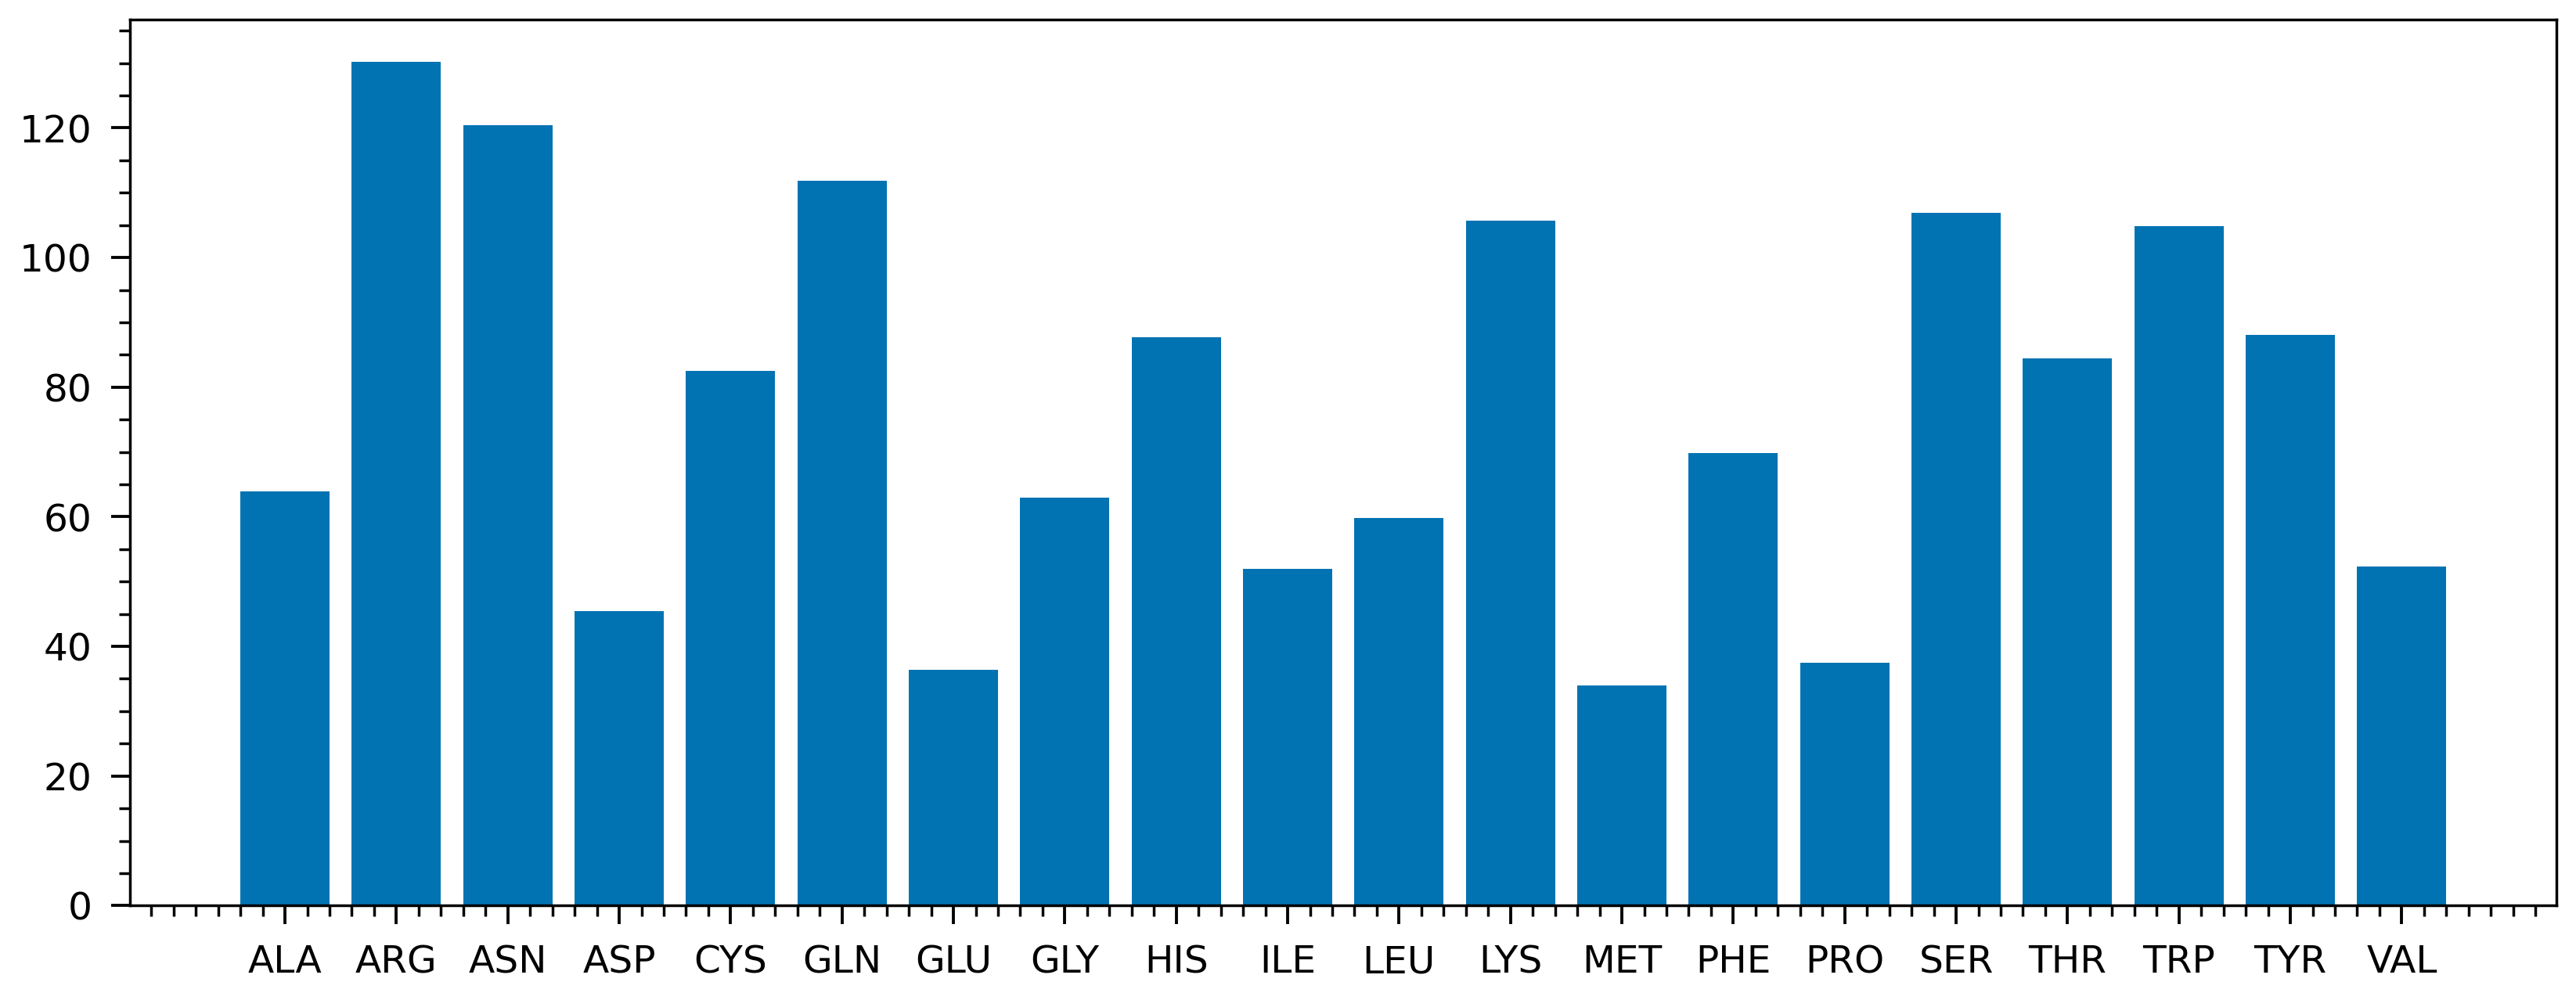

In [126]:
plt.figure(figsize=(8,3))
plt.bar(x_residue,x_rna_pro)

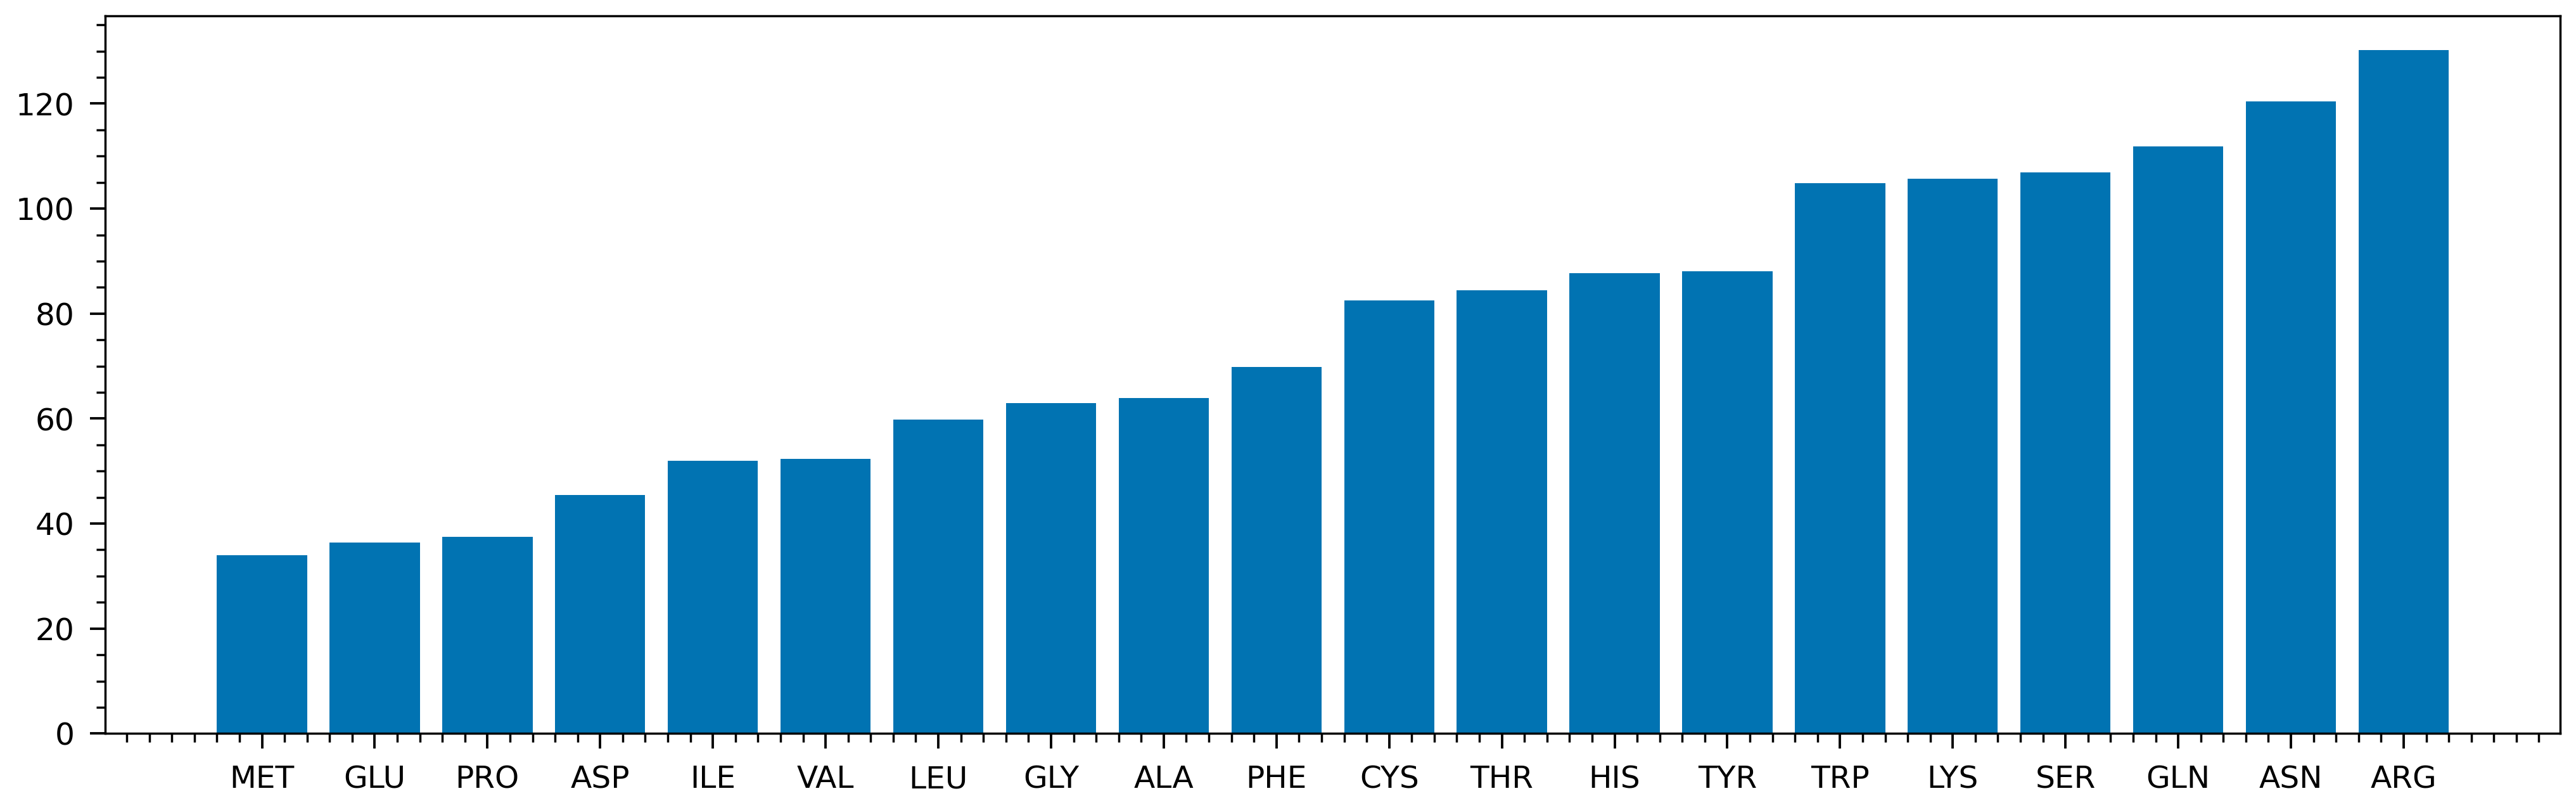

In [127]:
import matplotlib.pyplot as plt

# Sort indices based on x_rna_pro
sorted_indices = sorted(range(len(x_rna_pro)), key=lambda i: x_rna_pro[i])

# Rearrange x_residue and x_rna_pro based on sorted indices
sorted_x_residue = [x_residue[i] for i in sorted_indices]
sorted_x_rna_pro = [x_rna_pro[i] for i in sorted_indices]

plt.figure(figsize=(10, 3))
plt.bar(sorted_x_residue, sorted_x_rna_pro)
plt.show()

# interaction on a cluster

In [1]:
x_resid = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']

In [3]:
### Uploading RNA-protein 
import pandas as pd

rna_pro_inter = {}

for i in x_resid:
    
    rna_pro_inter[i] = pd.read_csv(f'../simulationData_sample/rp_new_{i}.csv')

In [4]:
rna_pro_inter

{'ALA':      Anionic  HBAcceptor   HBDonor  Hydrophobic  VdWContact  PiCation
 0   0.700000    0.516667  0.316667     0.300000    2.466667       NaN
 1   0.566667    0.650000  0.266667     0.400000    2.333333       NaN
 2   0.600000    0.450000  0.266667     0.300000    2.350000       NaN
 3   0.800000    0.466667  0.350000     0.283333    2.233333       NaN
 4   0.741379    0.637931  0.379310     0.431034    2.689655       NaN
 5   0.566667    0.750000  0.350000     0.333333    2.383333       NaN
 6   0.683333    0.633333  0.383333     0.400000    2.850000  0.016667
 7   0.733333    0.716667  0.450000     0.483333    2.750000       NaN
 8   0.783333    0.783333  0.350000     0.433333    2.833333       NaN
 9   0.750000    0.769231  0.384615     0.442308    3.057692       NaN
 10  0.942308    0.730769  0.365385     0.346154    3.307692       NaN
 11  0.846154    0.711538  0.365385     0.288462    2.865385       NaN
 12  0.692308    0.615385  0.250000     0.288462    2.500000  0.019231

In [5]:
for i in x_resid:
    
    if 'HBDonor' in rna_pro_inter[i].columns and 'HBAcceptor' in rna_pro_inter[i].columns : 
        rna_pro_inter[i]['Hbonds'] = rna_pro_inter[i]['HBDonor'] + rna_pro_inter[i]['HBAcceptor']
    elif 'HBDonor' in rna_pro_inter[i].columns: 
        rna_pro_inter[i]['Hbonds'] = rna_pro_inter[i]['HBDonor']
        
    elif 'HBAcceptor' in rna_pro_inter[i].columns:       
        rna_pro_inter[i]['Hbonds'] = rna_pro_inter[i]['HBDonor']
        
hbonds_rp = pd.DataFrame()
for i in x_resid:        
        hbonds_rp[i] = rna_pro_inter[i]['Hbonds']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRO'),
  Text(2, 0, 'LEU'),
  Text(3, 0, 'MET'),
  Text(4, 0, 'ILE'),
  Text(5, 0, 'GLU'),
  Text(6, 0, 'ALA'),
  Text(7, 0, 'PHE'),
  Text(8, 0, 'VAL'),
  Text(9, 0, 'TYR'),
  Text(10, 0, 'THR'),
  Text(11, 0, 'ASP'),
  Text(12, 0, 'HIS'),
  Text(13, 0, 'GLY'),
  Text(14, 0, 'SER'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'GLN'),
  Text(17, 0, 'CYS'),
  Text(18, 0, 'LYS'),
  Text(19, 0, 'ASN'),
  Text(20, 0, 'ARG')])

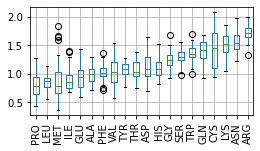

In [9]:
plt.figure(figsize=(4,2))
index_sort = hbonds_rp.mean().sort_values().index
hbonds_rp = hbonds_rp[index_sort]
hbonds_rp.boxplot()
plt.xticks(rotation=90)

In [10]:
### extracting hydrogen bonds

x_rna_pro = []

for i in x_resid:
    
    if 'HBDonor' in rna_pro_inter[i].columns: 
        value1 = rna_pro_inter[i]['HBDonor'].mean()
        
    else: 
        
        value1 = 0
    if 'HBAcceptor' in rna_pro_inter[i].columns:
        value2 = rna_pro_inter[i]['HBAcceptor'].mean()
        
    else: 
        
        value2 = 0

    x_rna_pro.append(value1+value2)

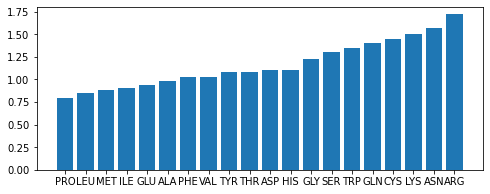

In [11]:
import matplotlib.pyplot as plt

# Sort indices based on x_rna_pro
sorted_indices = sorted(range(len(x_rna_pro)), key=lambda i: x_rna_pro[i])

# Rearrange x_residue and x_rna_pro based on sorted indices
sorted_x_resid = [x_resid[i] for i in sorted_indices]
sorted_x_rna_pro = [x_rna_pro[i] for i in sorted_indices]

plt.figure(figsize=(8, 3))
plt.bar(sorted_x_resid, sorted_x_rna_pro)
plt.show()

In [12]:
### Pi stacking b/w RNA-protein
x_stack = []
for i in x_resid:
    
    if 'PiStacking' in rna_pro_inter[i].columns: 
        s1 = rna_pro_inter[i]['PiStacking'].mean()
        
    else: 
        
        s1 = 0
        
    x_stack.append(s1)

In [13]:
x_hp = []
for i in x_resid:
    
    if 'Hydrophobic' in rna_pro_inter[i].columns: 
        s1 = rna_pro_inter[i]['Hydrophobic'].mean()
        
    else: 
        
        s1 = 0
        
    x_hp.append(s1)

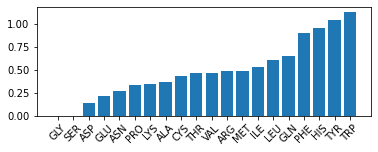

In [14]:
import matplotlib.pyplot as plt

sorted_indices = sorted(range(len(x_hp)), key=lambda i: x_hp[i])

# Rearrange x_residue and x_rna_pro based on sorted indices
sorted_x_resid = [x_resid[i] for i in sorted_indices]
sorted_x_hp = [x_hp[i] for i in sorted_indices]

plt.figure(figsize=(6, 2))
plt.bar(sorted_x_resid, sorted_x_hp)
plt.xticks(rotation = 45)
plt.show()

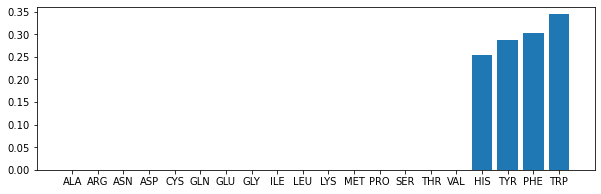

In [15]:
import matplotlib.pyplot as plt

# Sort indices based on x_rna_pro
sorted_indices = sorted(range(len(x_stack)), key=lambda i: x_stack[i])

# Rearrange x_residue and x_rna_pro based on sorted indices
sorted_x_resid = [x_resid[i] for i in sorted_indices]
sorted_x_stack = [x_stack[i] for i in sorted_indices]

plt.figure(figsize=(10, 3))
plt.bar(sorted_x_resid, sorted_x_stack)
plt.show()

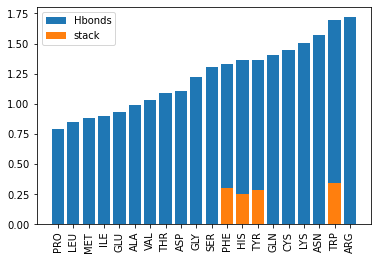

In [16]:
### Combining stacking interaction and hydorgen bond

# Combine x_resid, x_rna, and x_rna_pro into a list of tuples
data = list(zip(x_resid, x_rna_pro, x_stack))

# Sort the data based on the sum of x_rna and x_rna_pro
sorted_data = sorted(data, key=lambda x: sum(x[1:]))

# Unpack the sorted data
sorted_x_resid, sorted_x_rna_pro, sorted_x_stack = zip(*sorted_data)

# Plot the sorted data
fig, ax = plt.subplots()

ax.bar(sorted_x_resid, sorted_x_rna_pro, label='Hbonds', bottom=sorted_x_stack)
ax.bar(sorted_x_resid, sorted_x_stack, label='stack')
ax.legend()
plt.xticks(rotation=90)
plt.show()

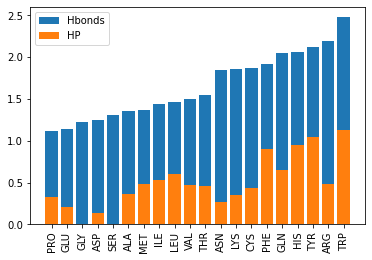

In [17]:
### Combining hydrophobic interaction and hydorgen bond

# Combine x_resid, x_rna, and x_rna_pro into a list of tuples
data = list(zip(x_resid, x_rna_pro, x_hp))

# Sort the data based on the sum of x_rna and x_rna_pro
sorted_data = sorted(data, key=lambda x: sum(x[1:]))

# Unpack the sorted data
sorted_x_resid, sorted_x_rna_pro, sorted_x_hp = zip(*sorted_data)

# Plot the sorted data
fig, ax = plt.subplots()

ax.bar(sorted_x_resid, sorted_x_rna_pro, label='Hbonds', bottom=sorted_x_hp)
ax.bar(sorted_x_resid, sorted_x_hp, label='HP')
ax.legend()
plt.xticks(rotation=90)
plt.show()

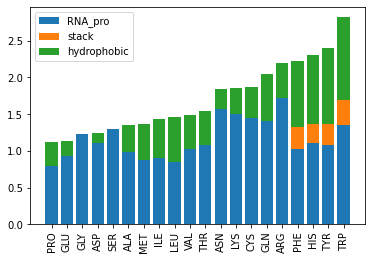

In [18]:
### hydroegn bond , stacking interaction and hydrophobic interactions

import matplotlib.pyplot as plt

# Assuming x_resid, x_rna, and x_rna_pro are your data arrays

# Combine x_resid, x_rna, and x_rna_pro into a list of tuples
data = list(zip(x_resid, x_hp, x_rna_pro,x_stack))

# Sort the data based on the sum of x_rna and x_rna_pro
sorted_data = sorted(data, key=lambda x: sum(x[1:]))

# Unpack the sorted data
sorted_x_resid, sorted_x_hp, sorted_x_rna_pro, sorted_x_stack= zip(*sorted_data)

# Plot the sorted data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(sorted_x_resid, sorted_x_rna_pro, label='RNA_pro')

ax.bar(sorted_x_resid, sorted_x_stack, label='stack', bottom=sorted_x_rna_pro)

# Calculate cumulative values for the 'stack' and 'RNA' bars

cumulative_stack = [sum(x) for x in zip(sorted_x_rna_pro, sorted_x_stack)]
cumulative_rna = [sum(x) for x in zip(cumulative_stack, sorted_x_hp)]

ax.bar(sorted_x_resid, sorted_x_hp, label='hydrophobic', bottom=cumulative_stack)
plt.xticks(rotation=90)

plt.legend()
plt.show()

In [19]:
### RNA -RNA interaction

rna_inter = {}

for i in x_resid:
    
    all_f = pd.read_csv(f'../simulationData_sample/rr_new_{i}.csv')
    
    rna_inter[i] = all_f 

In [20]:
rna_inter

{'ALA':     HBAcceptor   HBDonor  Hydrophobic  PiStacking  VdWContact
 0     0.783333  0.783333     2.100000    0.416667    3.266667
 1     0.700000  0.700000     2.000000    0.366667    3.100000
 2     0.733333  0.733333     1.966667    0.233333    3.300000
 3     0.683333  0.683333     2.066667    0.233333    2.966667
 4     0.655172  0.655172     2.034483    0.275862    3.000000
 5     0.900000  0.900000     2.300000    0.500000    3.733333
 6     0.816667  0.816667     2.133333    0.366667    3.566667
 7     0.866667  0.866667     2.100000    0.416667    3.633333
 8     0.883333  0.883333     2.100000    0.483333    3.466667
 9     0.788462  0.788462     2.192308    0.403846    3.653846
 10    0.750000  0.750000     2.038462    0.423077    3.230769
 11    0.730769  0.730769     1.884615    0.326923    3.076923
 12    0.865385  0.865385     2.076923    0.269231    3.538462
 13    0.923077  0.923077     2.269231    0.269231    3.500000
 14    0.807692  0.807692     1.961538    0.3846

In [21]:
x_rna = []

for i in x_resid:
    
    if 'HBDonor' in rna_inter[i].columns: 
        value1 = rna_inter[i]['HBDonor'].mean()
        
    else: 
        
        value1 = 0
    if 'HBAcceptor' in rna_inter[i].columns:
        value2 = rna_inter[i]['HBAcceptor'].mean()
        
    else: 
        
        value2 = 0

    x_rna.append(value1+value2)

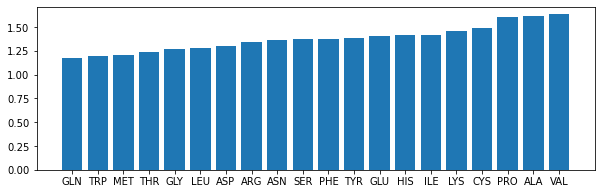

In [22]:
import matplotlib.pyplot as plt

# Sort indices based on x_rna_pro
sorted_indices = sorted(range(len(x_rna)), key=lambda i: x_rna[i])

# Rearrange x_residue and x_rna_pro based on sorted indices
sorted_x_resid = [x_resid[i] for i in sorted_indices]
sorted_x_rna = [x_rna[i] for i in sorted_indices]

plt.figure(figsize=(10, 3))
plt.bar(sorted_x_resid, sorted_x_rna)
plt.show()

In [23]:
### Pi stacking RNA-RNA interactions

x_stack_rna= []

for i in x_resid:
    
    if 'PiStacking' in rna_inter[i].columns: 
        s1 = rna_inter[i]['PiStacking'].mean()
        
    else: 
        
        s1 = 0
        
    x_stack_rna.append(s1)

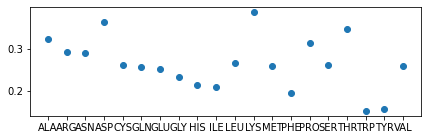

In [24]:
plt.figure(figsize=(7,2))
plt.plot(x_resid,x_stack_rna,'o')

In [25]:
x = [x_rna[i] + x_rna_pro[i] for i in range(len(x_rna_pro))]

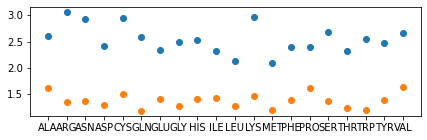

In [26]:
plt.figure(figsize=(7,2))
plt.plot(x_resid,x,'o')

plt.plot(x_resid,x_rna,'o')

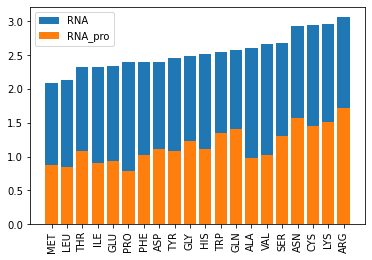

In [27]:
### Hydrogen bonds bar combining RNA itself and RNA -protein

import matplotlib.pyplot as plt

# Assuming x_resid, x_rna, and x_rna_pro are your data arrays

# Combine x_resid, x_rna, and x_rna_pro into a list of tuples
data = list(zip(x_resid, x_rna, x_rna_pro))

# Sort the data based on the sum of x_rna and x_rna_pro
sorted_data = sorted(data, key=lambda x: sum(x[1:]))

# Unpack the sorted data
sorted_x_resid, sorted_x_rna, sorted_x_rna_pro = zip(*sorted_data)

# Plot the sorted data
fig, ax = plt.subplots()

ax.bar(sorted_x_resid, sorted_x_rna, label='RNA', bottom=sorted_x_rna_pro)
ax.bar(sorted_x_resid, sorted_x_rna_pro, label='RNA_pro')
ax.legend()
plt.xticks(rotation=90)
plt.show()

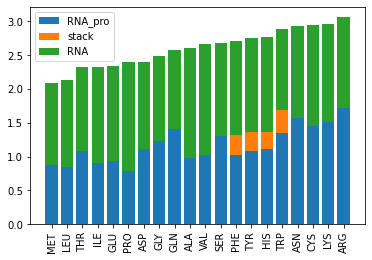

In [28]:
### hydroegn bond and stacking interaction

import matplotlib.pyplot as plt

# Assuming x_resid, x_rna, and x_rna_pro are your data arrays

# Combine x_resid, x_rna, and x_rna_pro into a list of tuples
data = list(zip(x_resid, x_rna, x_rna_pro,x_stack))

# Sort the data based on the sum of x_rna and x_rna_pro
sorted_data = sorted(data, key=lambda x: sum(x[1:]))

# Unpack the sorted data
sorted_x_resid, sorted_x_rna, sorted_x_rna_pro, sorted_x_stack= zip(*sorted_data)

# Plot the sorted data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(sorted_x_resid, sorted_x_rna_pro, label='RNA_pro')

ax.bar(sorted_x_resid, sorted_x_stack, label='stack', bottom=sorted_x_rna_pro)

# Calculate cumulative values for the 'stack' and 'RNA' bars
cumulative_stack = [sum(x) for x in zip(sorted_x_rna_pro, sorted_x_stack)]
cumulative_rna = [sum(x) for x in zip(cumulative_stack, sorted_x_rna)]

ax.bar(sorted_x_resid, sorted_x_rna, label='RNA', bottom=cumulative_stack)
plt.xticks(rotation=90)

plt.legend()
plt.show()

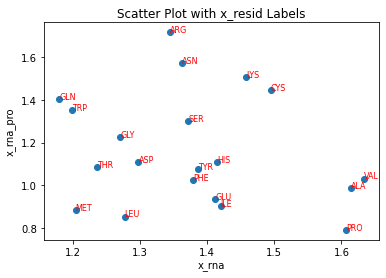

In [29]:
import matplotlib.pyplot as plt

# Assuming x_resid, x_rna, and x_rna_pro are your data arrays

# Plot x_rna_pro against x_rna
plt.plot(x_rna, x_rna_pro, 'o')

# Label each point with x_resid
for i in range(len(x_resid)):
    plt.text(x_rna[i], x_rna_pro[i], str(x_resid[i]), fontsize=8, color='red')

# Set labels and title
plt.xlabel('x_rna')
plt.ylabel('x_rna_pro')
plt.title('Scatter Plot with x_resid Labels')

plt.show()


In [33]:
#### hbonds
for i in x_residue:
    
    if 'HBDonor' in rna_inter[i].columns and 'HBAcceptor' in rna_inter[i].columns: 
        rna_inter[i]['Hbonds']= rna_inter[i]['HBDonor'] + rna_inter[i]['HBAcceptor']
        
    elif 'HBDonor' in rna_inter[i].columns and 'HBAcceptor' not in rna_inter[i].columns:
        rna_inter[i]['Hbonds']= rna_inter[i]['HBDonor']
        
    elif 'HBDonor' not in rna_inter[i].columns and 'HBAcceptor' in rna_inter[i].columns:
        rna_inter[i]['Hbonds']= rna_inter[i]['HBAcceptor']


hbonds_rna_all = pd.DataFrame()

for i in x_residue:
    hbonds_rna_all[i]=rna_inter[i]['Hbonds']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20]),
 [Text(1, 0, 'PRO'),
  Text(2, 0, 'LEU'),
  Text(3, 0, 'MET'),
  Text(4, 0, 'ILE'),
  Text(5, 0, 'GLU'),
  Text(6, 0, 'ALA'),
  Text(7, 0, 'PHE'),
  Text(8, 0, 'VAL'),
  Text(9, 0, 'TYR'),
  Text(10, 0, 'THR'),
  Text(11, 0, 'ASP'),
  Text(12, 0, 'HIS'),
  Text(13, 0, 'GLY'),
  Text(14, 0, 'SER'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'GLN'),
  Text(17, 0, 'CYS'),
  Text(18, 0, 'LYS'),
  Text(19, 0, 'ASN'),
  Text(20, 0, 'ARG'),
  Text(1, 0, 'PRO'),
  Text(2, 0, 'LEU'),
  Text(3, 0, 'MET'),
  Text(4, 0, 'ILE'),
  Text(5, 0, 'GLU'),
  Text(6, 0, 'ALA'),
  Text(7, 0, 'PHE'),
  Text(8, 0, 'VAL'),
  Text(9, 0, 'TYR'),
  Text(10, 0, 'THR'),
  Text(11, 0, 'ASP'),
  Text(12, 0, 'HIS'),
  Text(13, 0, 'GLY'),
  Text(14, 0, 'SER'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'GLN'),
  Text(17, 0, 'CYS'),
  Text(18, 0, 'LYS

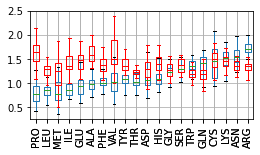

In [34]:
plt.figure(figsize=(4,2))

index_sort = hbonds_rp.mean().sort_values().index
hbonds_rp = hbonds_rp[index_sort]
hbonds_rna_all = hbonds_rna_all[index_sort]
hbonds_rp.boxplot(showfliers=False)
hbonds_rna_all.boxplot(showfliers=False,color='red')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRO'),
  Text(2, 0, 'LEU'),
  Text(3, 0, 'MET'),
  Text(4, 0, 'ILE'),
  Text(5, 0, 'GLU'),
  Text(6, 0, 'ALA'),
  Text(7, 0, 'PHE'),
  Text(8, 0, 'VAL'),
  Text(9, 0, 'TYR'),
  Text(10, 0, 'THR'),
  Text(11, 0, 'ASP'),
  Text(12, 0, 'HIS'),
  Text(13, 0, 'GLY'),
  Text(14, 0, 'SER'),
  Text(15, 0, 'TRP'),
  Text(16, 0, 'GLN'),
  Text(17, 0, 'CYS'),
  Text(18, 0, 'LYS'),
  Text(19, 0, 'ASN'),
  Text(20, 0, 'ARG')])

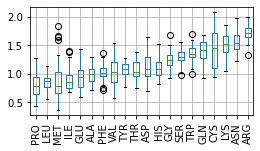

In [35]:
plt.figure(figsize=(4,2))
index_sort = hbonds_rp.mean().sort_values().index
hbonds_rp = hbonds_rp[index_sort]
hbonds_rp.boxplot()
plt.xticks(rotation=90)

In [37]:
### peptide - peptide interaction

pp_inter = {}

for i in x_resid:    
    all_f = pd.read_csv(f'../simulationData_sample/pp_new_{i}.csv')    
    pp_inter[i] = all_f 

In [38]:
for i in x_resid:
    
    if 'HBDonor' in pp_inter[i].columns and 'HBAcceptor' in pp_inter[i].columns : 
        pp_inter[i]['Hbonds'] = pp_inter[i]['HBDonor'] + pp_inter[i]['HBAcceptor']
    elif 'HBDonor' in pp_inter[i].columns: 
        pp_inter[i]['Hbonds'] = pp_inter[i]['HBDonor']
        
    elif 'HBAcceptor' in pp_inter[i].columns:       
        pp_inter[i]['Hbonds'] = pp_inter[i]['HBDonor']
        
hbonds_pp = pd.DataFrame()
for i in x_resid:        
        hbonds_pp[i] = pp_inter[i]['Hbonds']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRO'),
  Text(2, 0, 'ALA'),
  Text(3, 0, 'LEU'),
  Text(4, 0, 'MET'),
  Text(5, 0, 'PHE'),
  Text(6, 0, 'VAL'),
  Text(7, 0, 'GLY'),
  Text(8, 0, 'TYR'),
  Text(9, 0, 'TRP'),
  Text(10, 0, 'GLU'),
  Text(11, 0, 'ILE'),
  Text(12, 0, 'CYS'),
  Text(13, 0, 'HIS'),
  Text(14, 0, 'THR'),
  Text(15, 0, 'LYS'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'GLN'),
  Text(18, 0, 'ASN'),
  Text(19, 0, 'ASP'),
  Text(20, 0, 'ARG')])

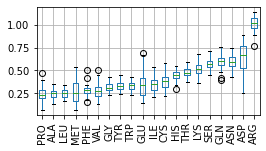

In [39]:
plt.figure(figsize=(4,2))
index_sort = hbonds_pp.mean().sort_values().index
hbonds_pp = hbonds_pp[index_sort]
hbonds_pp.boxplot()
plt.xticks(rotation=90)

### water bridge analysis

In [43]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']

In [44]:
get_inter = {}

for i in x_residue:
    get_inter[i] = pd.read_csv(f'../get_data/contact_all_{i}.csv')

/var/folders/k1/66xwfl7d03318yrgvk3gkzkw0000gq/T/ipykernel_75774/3633927240.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  get_inter[i] = pd.read_csv(f'../get_data/contact_all_{i}.csv')
/var/folders/k1/66xwfl7d03318yrgvk3gkzkw0000gq/T/ipykernel_75774/3633927240.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  get_inter[i] = pd.read_csv(f'../get_data/contact_all_{i}.csv')
/var/folders/k1/66xwfl7d03318yrgvk3gkzkw0000gq/T/ipykernel_75774/3633927240.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  get_inter[i] = pd.read_csv(f'../get_data/contact_all_{i}.csv')


In [45]:
def calculate_no_wb(conatcs_510,type_inter='wb'):
    
    filtered_frame_numbers = conatcs_510.loc[conatcs_510['interaction_type'] == type_inter,
                                         'frame_no'].tolist()

    frame_no = np.array(filtered_frame_numbers)

    unique_values, counts = np.unique(frame_no, return_counts=True)

    return counts

In [46]:
wb_counts = {}

for i in x_residue:
    
    wb_counts[i]  = calculate_no_wb(conatcs_510=get_inter[i],type_inter='wb')

In [47]:
df_wb = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in wb_counts.items()]))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ALA'),
  Text(2, 0, 'ARG'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'GLN'),
  Text(7, 0, 'GLU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'HIS'),
  Text(10, 0, 'ILE'),
  Text(11, 0, 'LEU'),
  Text(12, 0, 'LYS'),
  Text(13, 0, 'MET'),
  Text(14, 0, 'PHE'),
  Text(15, 0, 'PRO'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'THR'),
  Text(18, 0, 'TRP'),
  Text(19, 0, 'TYR'),
  Text(20, 0, 'VAL')])

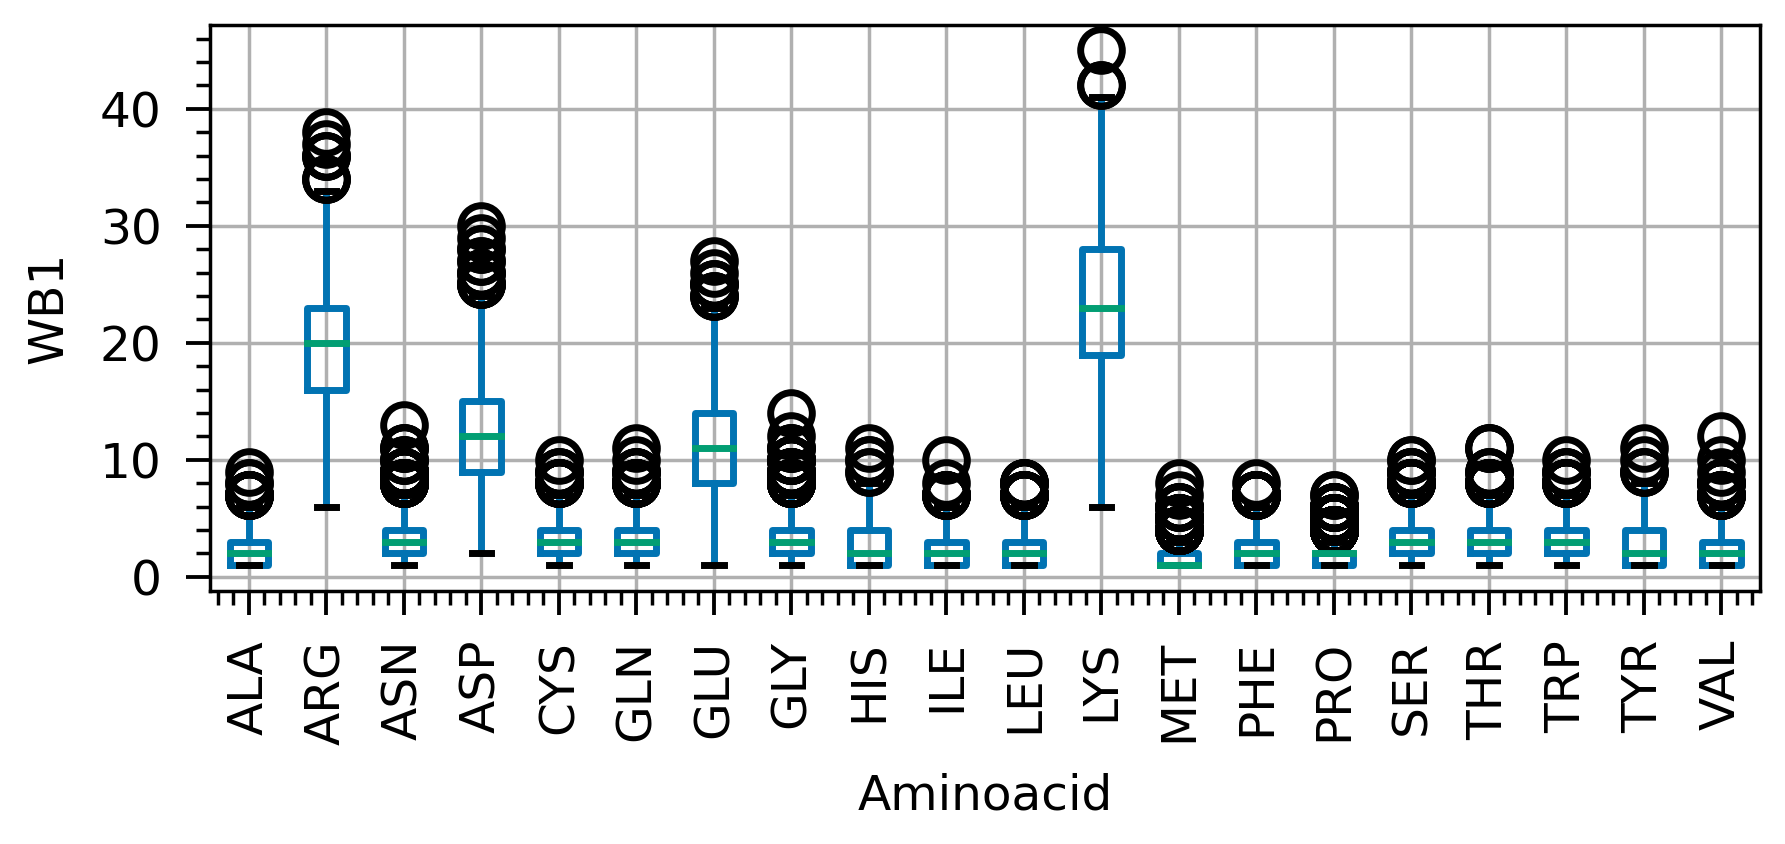

In [49]:
plt.figure(figsize=(4,1.5))
df_wb.boxplot()

plt.ylabel('WB1')
plt.xlabel('Aminoacid')
plt.xticks(rotation=90)

In [50]:
wb2_counts = {}

for i in x_residue:
    
    wb2_counts[i]  = calculate_no_wb(conatcs_510=get_inter[i],type_inter='wb2')

In [51]:
df_wb2 = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in wb2_counts.items()]))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ALA'),
  Text(2, 0, 'ARG'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'GLN'),
  Text(7, 0, 'GLU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'HIS'),
  Text(10, 0, 'ILE'),
  Text(11, 0, 'LEU'),
  Text(12, 0, 'LYS'),
  Text(13, 0, 'MET'),
  Text(14, 0, 'PHE'),
  Text(15, 0, 'PRO'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'THR'),
  Text(18, 0, 'TRP'),
  Text(19, 0, 'TYR'),
  Text(20, 0, 'VAL')])

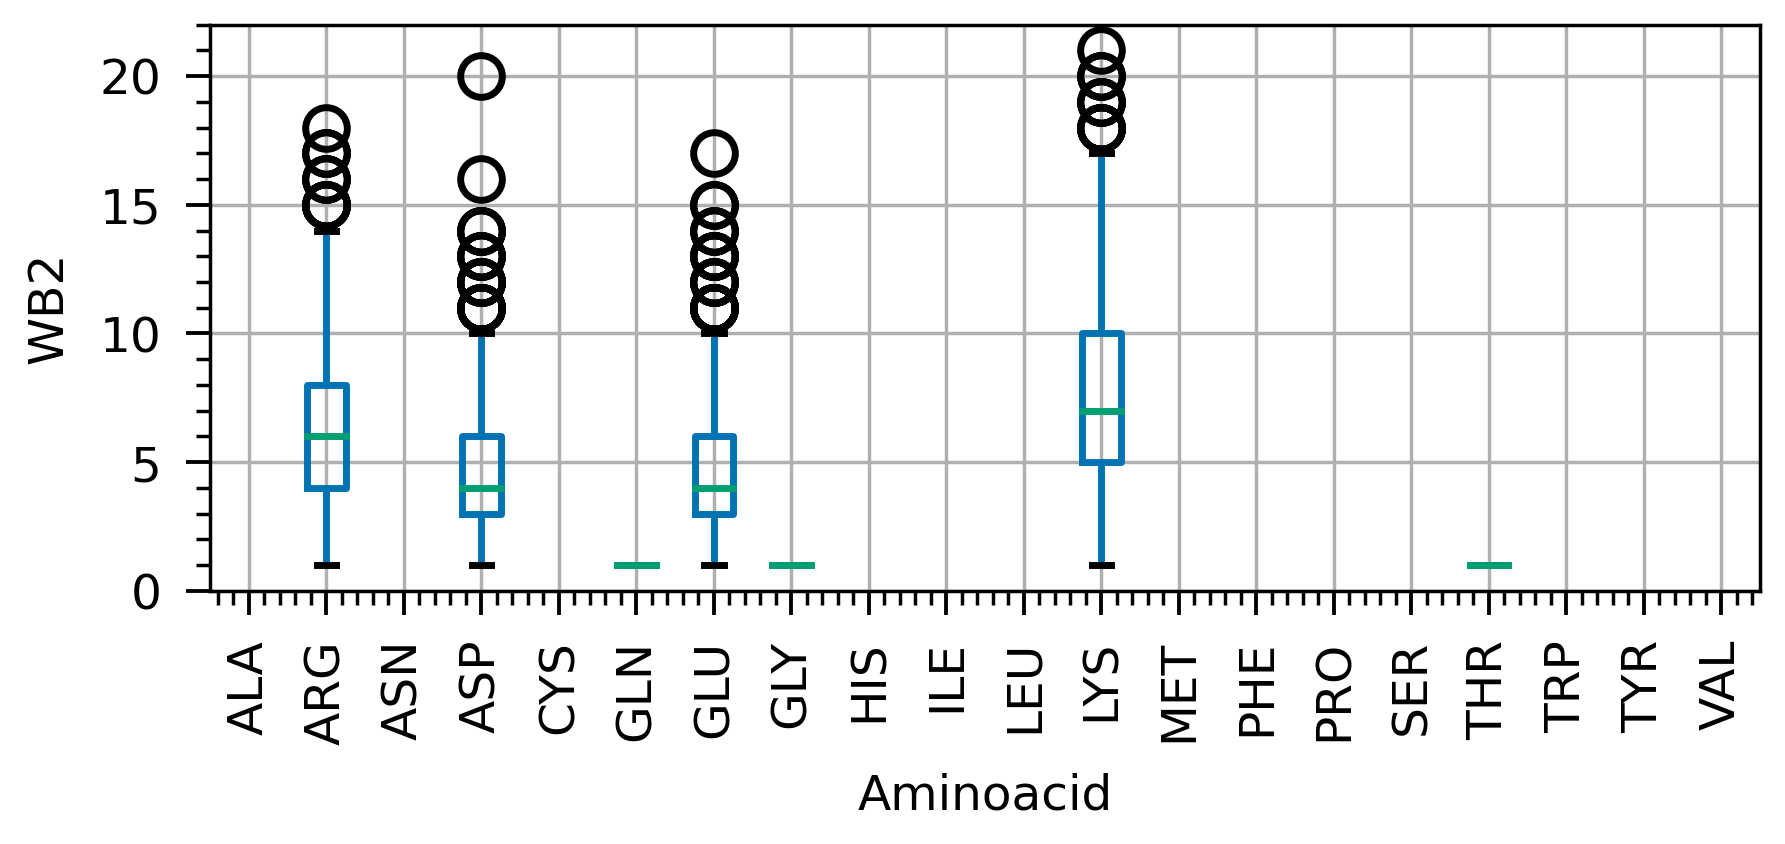

In [52]:
plt.figure(figsize=(4,1.5))


df_wb2.boxplot()

plt.ylabel('WB2')
plt.xlabel('Aminoacid')
plt.xticks(rotation=90)

In [119]:
hbbb_counts = {}

for i in x_residue:
    
    hbbb_counts[i]  = calculate_no_wb(conatcs_510=get_inter[i],type_inter='hbbb')

In [120]:
df_bb = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in hbbb_counts.items()]))

<AxesSubplot: >

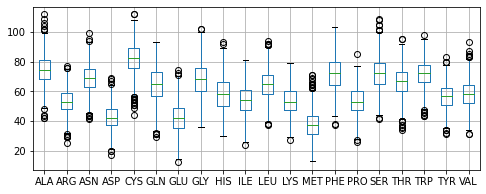

In [121]:
plt.figure(figsize=(8,3))
df_bb.boxplot()

# water count

In [14]:
fd_w = pd.read_csv('../water.csv')
fd_w.head()

ALA  ARG  ASN  ASP  CYS  GLN  GLU  GLY  HIS  ILE  LEU  LYS  MET  PHE  PRO  \
0  758  742  820  899  776  820  933  855  815  906  869  781  807  817  917   
1  787  717  843  902  777  863  929  817  806  880  828  760  824  811  897   
2  808  728  849  878  763  842  944  822  791  882  811  765  862  829  923   
3  782  738  816  905  783  867  915  835  820  903  851  769  841  797  969   
4  797  727  824  893  811  815  937  848  814  912  828  794  862  806  938   

   SER    THR  TRP  TYR  VAL  
0  829  771.0  819  815  959  
1  815  776.0  808  789  955  
2  841  774.0  837  809  947  
3  822  759.0  804  805  964  
4  814  794.0  843  800  948

<AxesSubplot: >

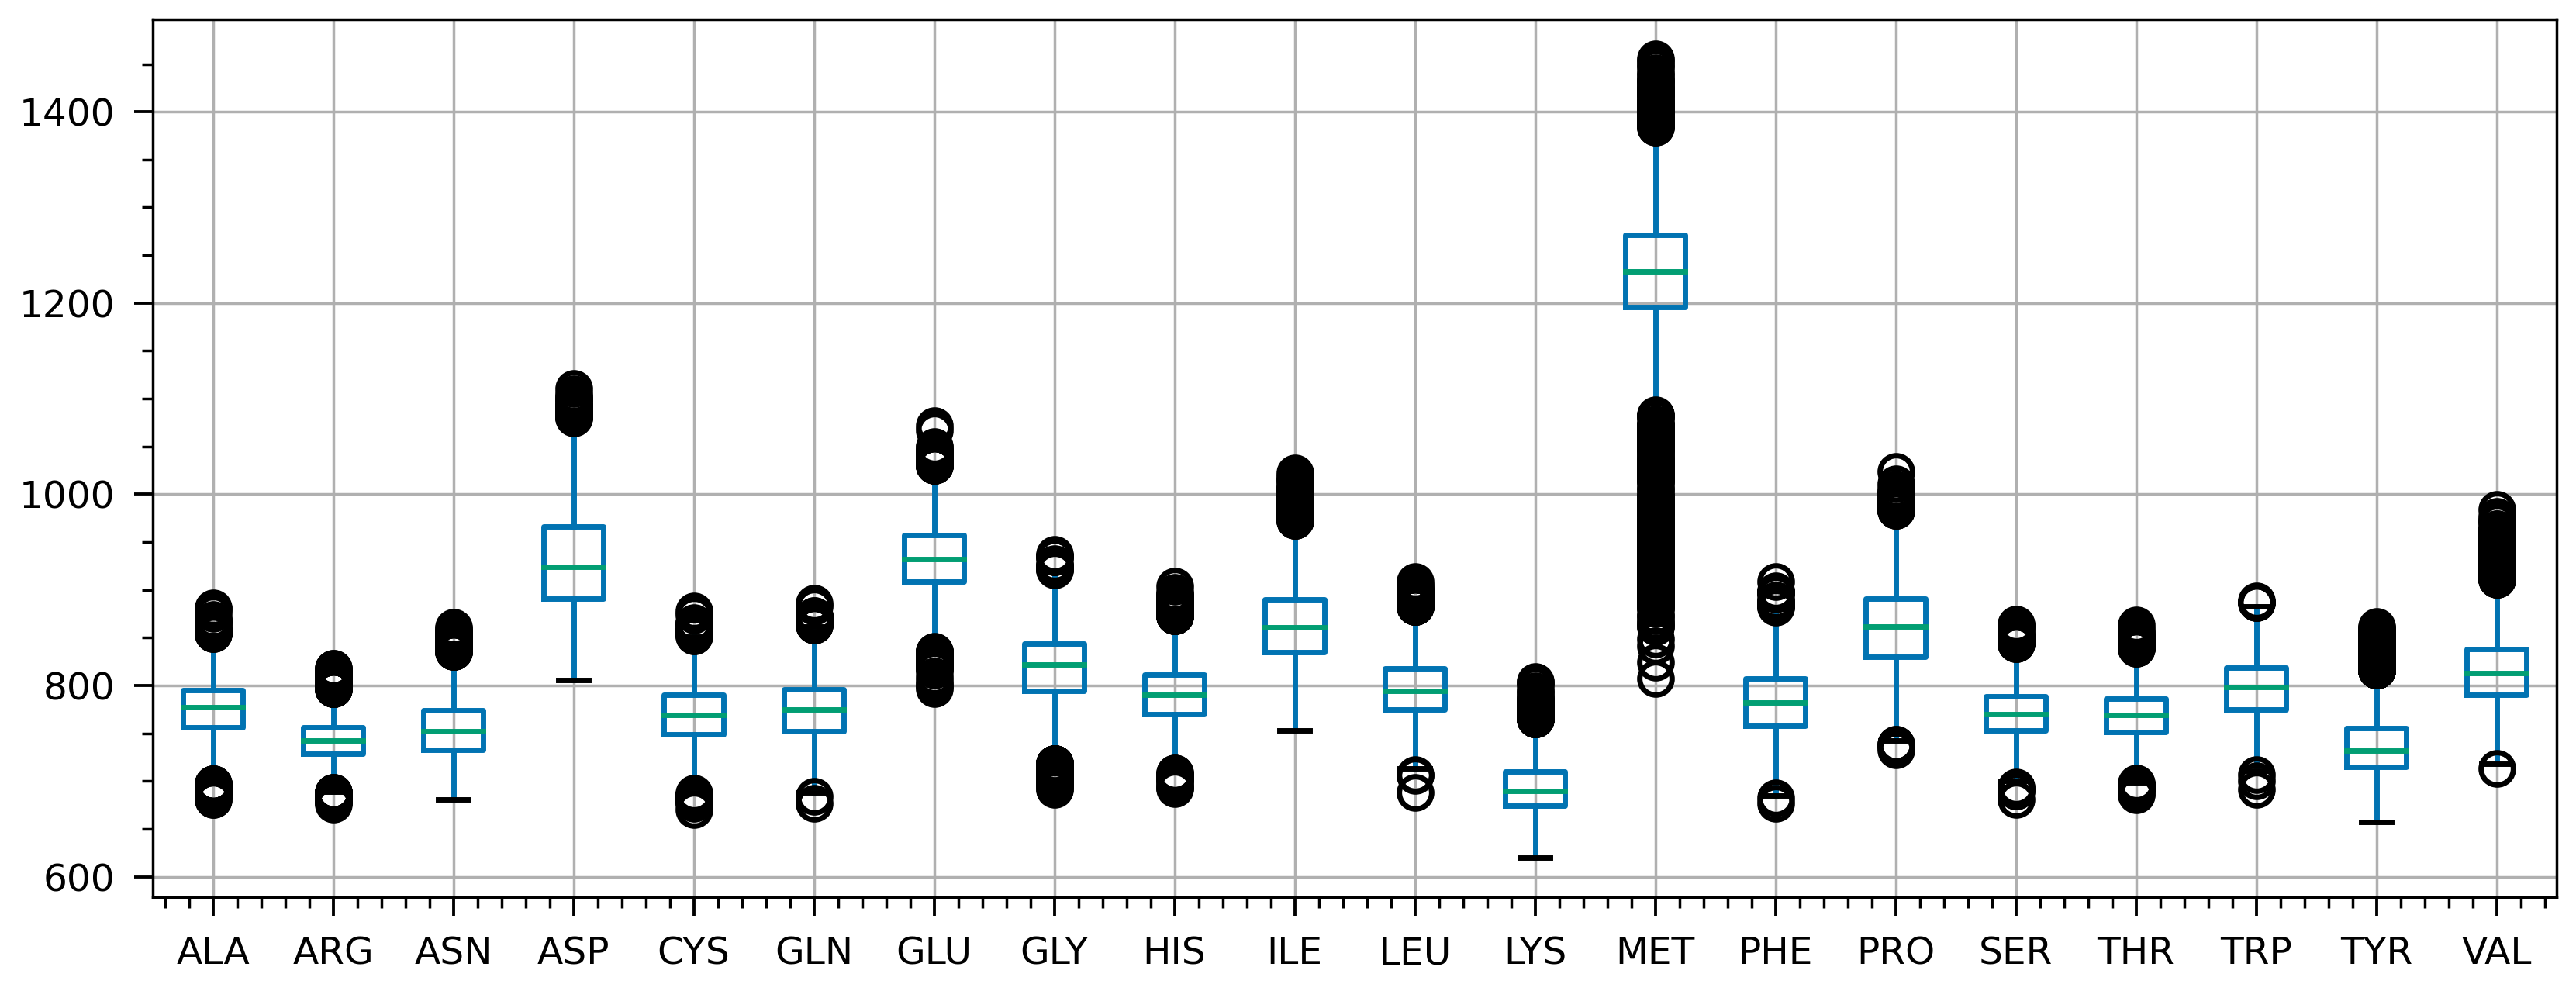

In [15]:
plt.figure(figsize=(8,3))

fd_w.boxplot()

In [17]:
# now applying the sorted 
# indices to the data
fd_w_sorted = fd_w[index_sort]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'LYS'),
  Text(1, 0, 'TYR'),
  Text(2, 0, 'ARG'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'THR'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'SER'),
  Text(7, 0, 'GLN'),
  Text(8, 0, 'ALA'),
  Text(9, 0, 'PHE'),
  Text(10, 0, 'HIS'),
  Text(11, 0, 'LEU'),
  Text(12, 0, 'TRP'),
  Text(13, 0, 'VAL'),
  Text(14, 0, 'GLY'),
  Text(15, 0, 'PRO'),
  Text(16, 0, 'ILE'),
  Text(17, 0, 'ASP'),
  Text(18, 0, 'GLU'),
  Text(19, 0, 'MET')])

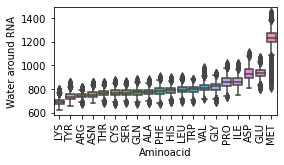

In [18]:
plt.figure(figsize=(4,2))
sns.boxplot(data = fd_w_sorted)

plt.ylabel('Water around RNA')
plt.xlabel('Aminoacid')
plt.xticks(rotation=90)


In [16]:
fd_w_p = pd.read_csv('../water_p.csv')
fd_w_p.head()

ALA   ARG   ASN   ASP   CYS   GLN   GLU   GLY   HIS   ILE   LEU   LYS  \
0  1674  1673  1465  2062  1596  1523  2503  1697  1653  1935  2058  2271   
1  1684  1659  1473  2156  1587  1507  2579  1731  1596  1974  2035  2248   
2  1704  1641  1458  2121  1623  1503  2541  1731  1638  1973  2090  2193   
3  1659  1705  1433  2175  1578  1529  2550  1739  1640  1942  2066  2235   
4  1660  1647  1452  2175  1577  1530  2536  1730  1642  1964  1990  2274   

    MET   PHE   PRO   SER     THR   TRP   TYR   VAL  
0  1681  1825  1967  1228  1503.0  1542  1593  2102  
1  1737  1826  1995  1255  1500.0  1540  1638  2062  
2  1741  1855  2018  1254  1456.0  1571  1665  2106  
3  1741  1746  2062  1177  1490.0  1527  1664  2058  
4  1766  1853  1967  1225  1511.0  1570  1664  2166

<AxesSubplot: >

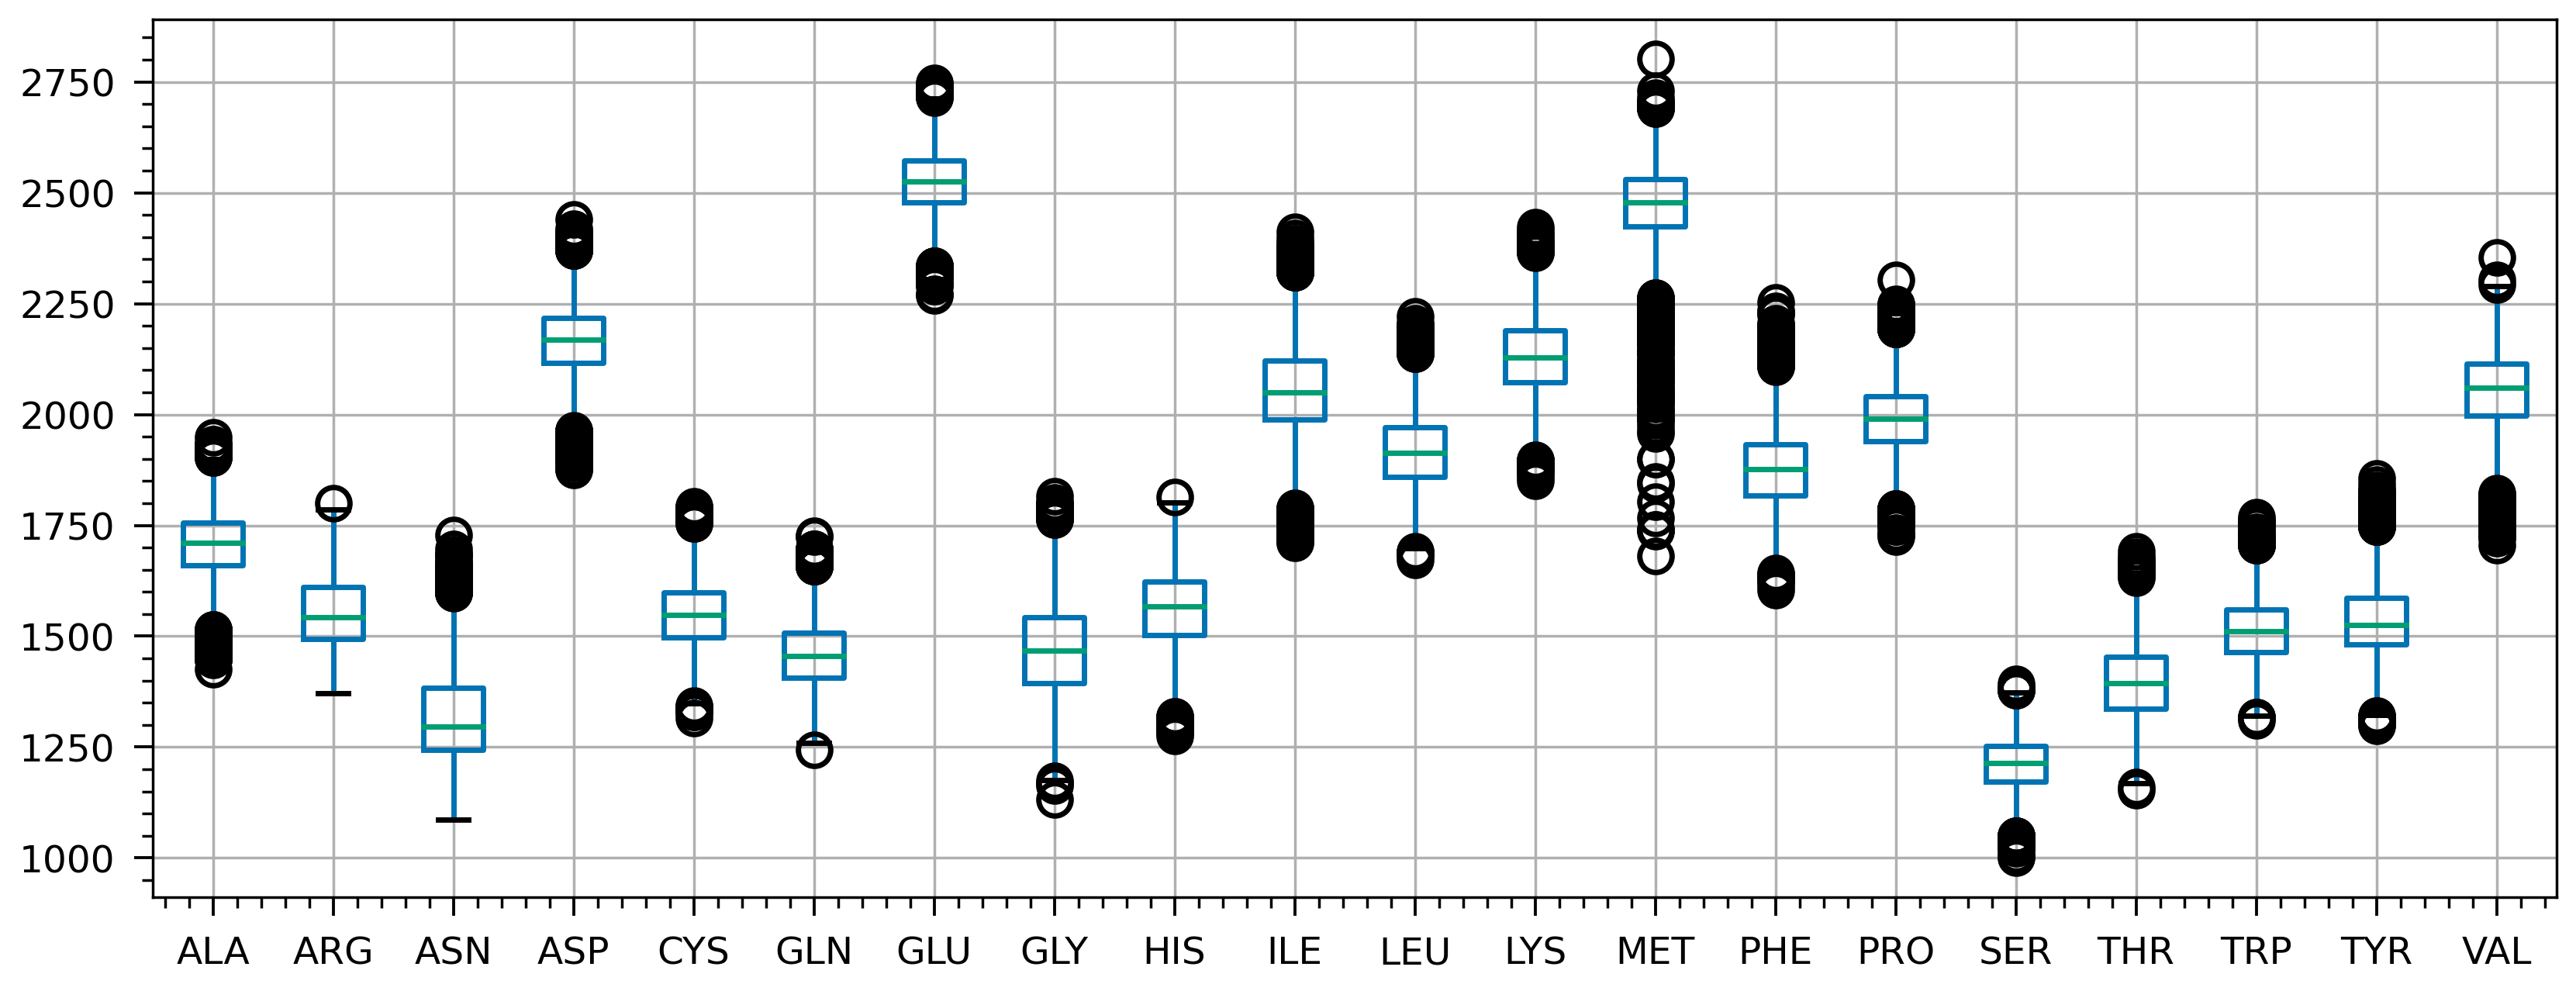

In [17]:
plt.figure(figsize=(8,3))

fd_w_p.boxplot()

Index(['SER', 'ASN', 'THR', 'GLN', 'GLY', 'TRP', 'TYR', 'CYS', 'ARG', 'HIS',
       'ALA', 'PHE', 'LEU', 'PRO', 'VAL', 'ILE', 'LYS', 'ASP', 'MET', 'GLU'],
      dtype='object')

In [31]:

index_sort = fd_w_p.mean().sort_values().index
index_sort
# now applying the sorted 
# indices to the data
fd_w_p_sorted = fd_w_p[index_sort]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'SER'),
  Text(1, 0, 'ASN'),
  Text(2, 0, 'THR'),
  Text(3, 0, 'GLN'),
  Text(4, 0, 'GLY'),
  Text(5, 0, 'TRP'),
  Text(6, 0, 'TYR'),
  Text(7, 0, 'CYS'),
  Text(8, 0, 'ARG'),
  Text(9, 0, 'HIS'),
  Text(10, 0, 'ALA'),
  Text(11, 0, 'PHE'),
  Text(12, 0, 'LEU'),
  Text(13, 0, 'PRO'),
  Text(14, 0, 'VAL'),
  Text(15, 0, 'ILE'),
  Text(16, 0, 'LYS'),
  Text(17, 0, 'ASP'),
  Text(18, 0, 'MET'),
  Text(19, 0, 'GLU')])

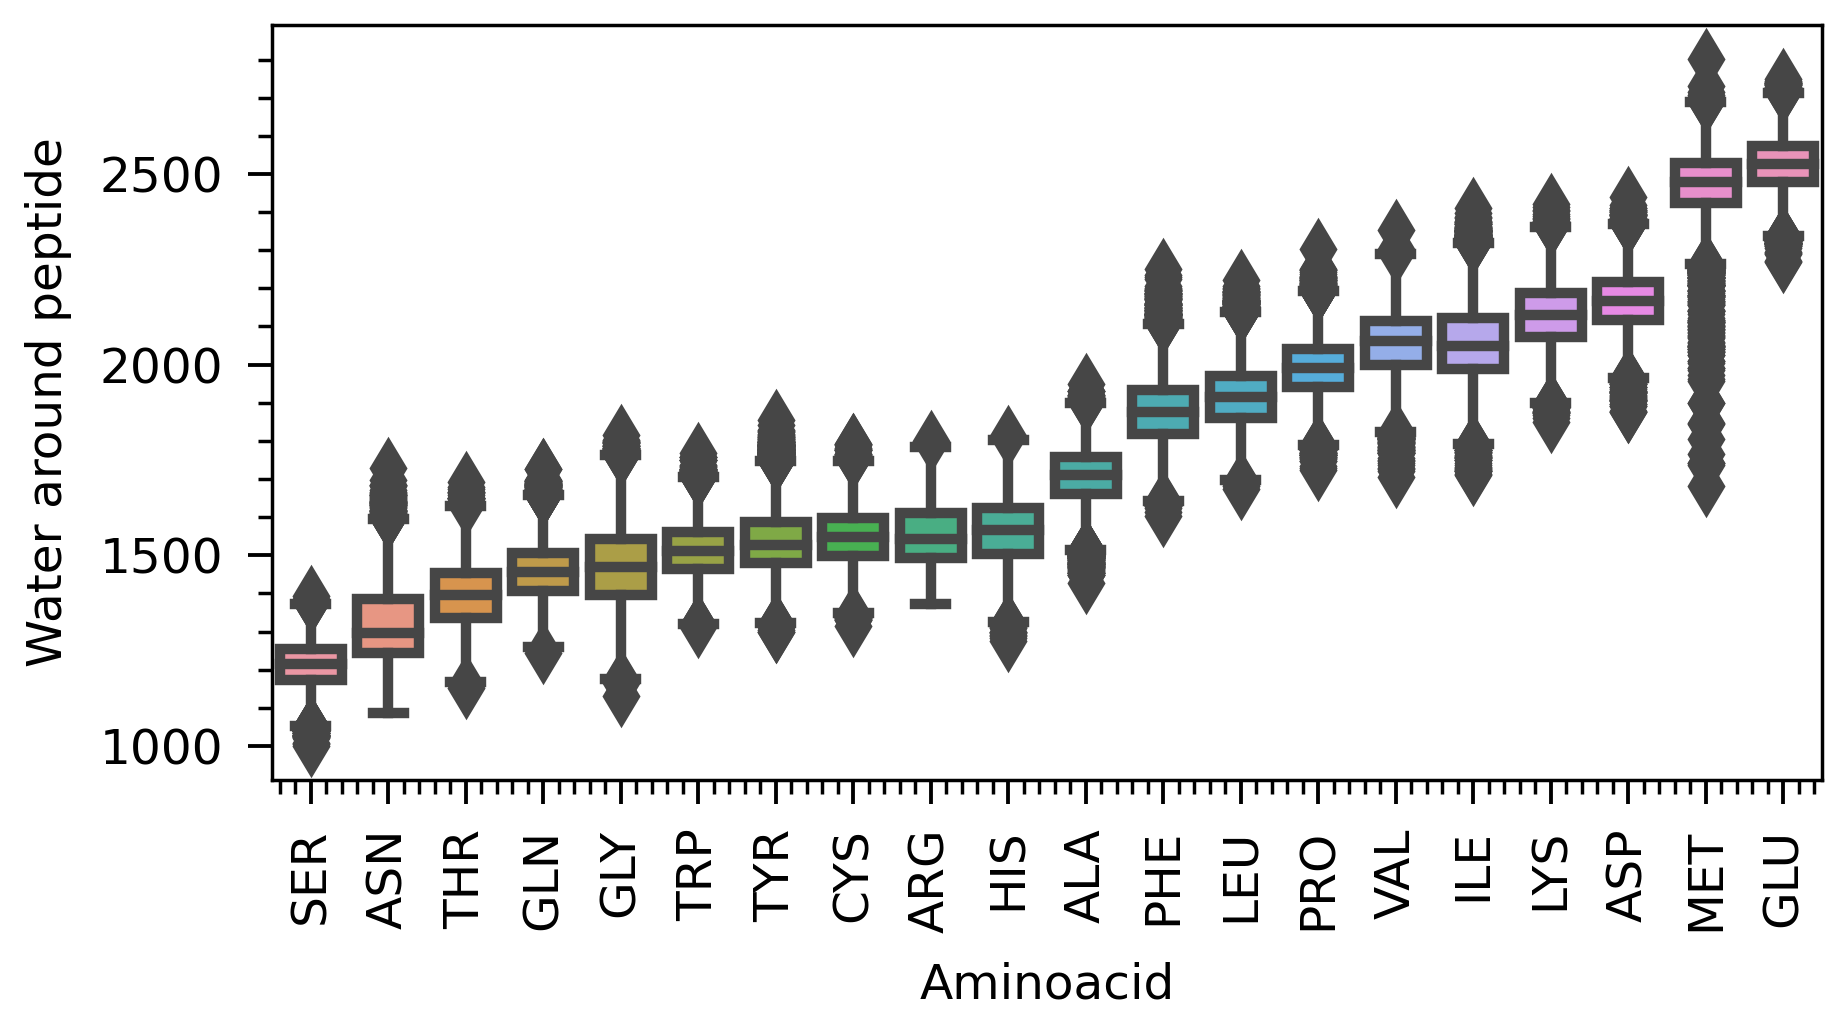

In [32]:
plt.figure(figsize=(4,2))
sns.boxplot(data = fd_w_p_sorted)

plt.ylabel('Water around peptide')
plt.xlabel('Aminoacid')
plt.xticks(rotation=90)

In [13]:
fd_w_sorted = fd_w[index_sort]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'LYS'),
  Text(1, 0, 'TYR'),
  Text(2, 0, 'ARG'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'THR'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'SER'),
  Text(7, 0, 'GLN'),
  Text(8, 0, 'ALA'),
  Text(9, 0, 'PHE'),
  Text(10, 0, 'HIS'),
  Text(11, 0, 'LEU'),
  Text(12, 0, 'TRP'),
  Text(13, 0, 'VAL'),
  Text(14, 0, 'GLY'),
  Text(15, 0, 'PRO'),
  Text(16, 0, 'ILE'),
  Text(17, 0, 'ASP'),
  Text(18, 0, 'GLU'),
  Text(19, 0, 'MET')])

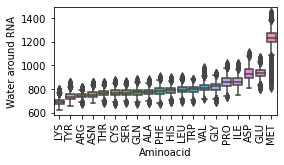

In [14]:
plt.figure(figsize=(4,2))
sns.boxplot(data = fd_w_sorted)

plt.ylabel('Water around RNA')
plt.xlabel('Aminoacid')
plt.xticks(rotation=90)

# RDF analysis

In [183]:
rdf_na_p = pd.read_csv('../rdf_na_ca.csv')

In [184]:
rdf_na_p.head()

ALA_r  ALA_rdf     ARG_r  ARG_rdf     ASN_r  ASN_rdf     ASP_r  ASP_rdf  \
0  0.005333      0.0  0.005333      0.0  0.005333      0.0  0.005333      0.0   
1  0.016000      0.0  0.016000      0.0  0.016000      0.0  0.016000      0.0   
2  0.026667      0.0  0.026667      0.0  0.026667      0.0  0.026667      0.0   
3  0.037333      0.0  0.037333      0.0  0.037333      0.0  0.037333      0.0   
4  0.048000      0.0  0.048000      0.0  0.048000      0.0  0.048000      0.0   

      CYS_r  CYS_rdf  ...     SER_r  SER_rdf     THR_r  THR_rdf     TRP_r  \
0  0.005333      0.0  ...  0.005333      0.0  0.005333      0.0  0.005333   
1  0.016000      0.0  ...  0.016000      0.0  0.016000      0.0  0.016000   
2  0.026667      0.0  ...  0.026667      0.0  0.026667      0.0  0.026667   
3  0.037333      0.0  ...  0.037333      0.0  0.037333      0.0  0.037333   
4  0.048000      0.0  ...  0.048000      0.0  0.048000      0.0  0.048000   

   TRP_rdf     TYR_r  TYR_rdf     VAL_r  VAL_rdf  
0      0.0  0.005333      0.0  0.005333      0.0  
1      0.0  0.016000      0.0  0.016000      0.0  
2      0.0  0.026667      0.0  0.026667      0.0  
3      0.0  0.037333      0.0  0.037333      0.0  
4      0.0  0.048000      0.0  0.048000      0.0  

[5 rows x 40 columns]

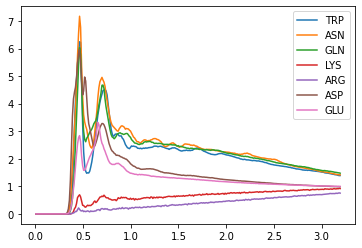

In [185]:

# plt.plot(rdf_na_p['ALA_r'],rdf_na_p['ALA_rdf'],label='ALA')
# plt.plot(rdf_na_p['VAL_r'],rdf_na_p['VAL_rdf'],label='VAL')

plt.plot(rdf_na_p['TRP_r'],rdf_na_p['TRP_rdf'],label='TRP')
plt.plot(rdf_na_p['ASN_r'],rdf_na_p['ASN_rdf'],label='ASN')
plt.plot(rdf_na_p['GLN_r'],rdf_na_p['GLN_rdf'],label='GLN')


plt.plot(rdf_na_p['LYS_r'],rdf_na_p['LYS_rdf'],label='LYS')
plt.plot(rdf_na_p['ARG_r'],rdf_na_p['ARG_rdf'],label='ARG')

plt.plot(rdf_na_p['ASP_r'],rdf_na_p['ASP_rdf'],label='ASP')
plt.plot(rdf_na_p['GLU_r'],rdf_na_p['GLU_rdf'],label='GLU')

#plt.ylim(0,13)

plt.legend()

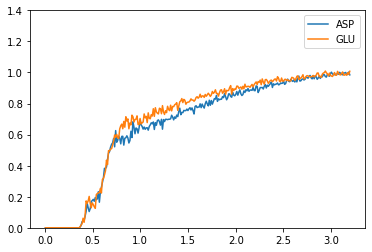

In [181]:
plt.plot(rdf_na_p['ASP_r'],rdf_na_p['ASP_rdf'],label='ASP')
plt.plot(rdf_na_p['GLU_r'],rdf_na_p['GLU_rdf'],label='GLU')
plt.ylim(0,1.4)

plt.legend()

In [174]:
rdf_na_ca = pd.read_csv('../rdf_na_ca.csv')

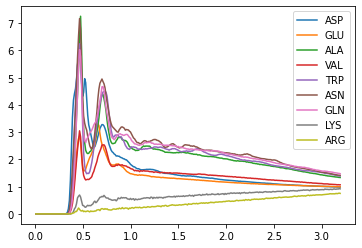

In [175]:

plt.plot(rdf_na_ca['ASP_r'],rdf_na_ca['ASP_rdf'],label='ASP')
plt.plot(rdf_na_ca['GLU_r'],rdf_na_ca['GLU_rdf'],label='GLU')
plt.plot(rdf_na_ca['ALA_r'],rdf_na_ca['ALA_rdf'],label='ALA')
plt.plot(rdf_na_ca['VAL_r'],rdf_na_ca['VAL_rdf'],label='VAL')

plt.plot(rdf_na_ca['TRP_r'],rdf_na_ca['TRP_rdf'],label='TRP')
plt.plot(rdf_na_ca['ASN_r'],rdf_na_ca['ASN_rdf'],label='ASN')
plt.plot(rdf_na_ca['GLN_r'],rdf_na_ca['GLN_rdf'],label='GLN')

plt.plot(rdf_na_ca['LYS_r'],rdf_na_ca['LYS_rdf'],label='LYS')
plt.plot(rdf_na_ca['ARG_r'],rdf_na_ca['ARG_rdf'],label='ARG')


plt.legend()

# RDF to show the intractions

In [69]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
nonpolar_residue = ['ALA', 'GLY', 'ILE', 'LEU', 'MET', 'PHE', 'PRO', 'TRP', 'VAL']
polar_residue = ['ASN', 'CYS', 'GLN', 'SER', 'THR', 'TYR']
acid_residue = ['ASP', 'GLU']
base_residue = ['ARG', 'HIS', 'LYS']
sample_residue = ['ALA', 'ARG', 'ASN', 'SER', 'TRP', 'TYR', 'GLY'] #Contains an interesting mix of residues
figure_index = 0
rdf_methods = ['all_all', 'ca_all', 'ca_base', 'ca_po4', 'ca_sugar', 'side_all', 'side-end_all', 'side-end_base', 'side-end_po4', 'side-end_sugar']
rdf_ca_methods = ['ca_all', 'ca_base', 'ca_po4', 'ca_sugar']
rdf_side_end_methods = ['side-end_all', 'side-end_base', 'side-end_po4', 'side-end_sugar']


In [70]:
def show_simulation(residue, no_HOH=True):
    if(no_HOH):
        top_file = "../" + residue + "/output_no_HOH.pdb"
        traj_file = "../" + residue + "/traj_no_HOH.dcd"
    else:
        top_file = "../" + residue + "/gromacs/output.gro"
        traj_file = "../" + residue + "/trajectory.dcd"
    univ = mda.Universe(top_file, traj_file)
    view = nv.show_mdanalysis(univ)
    view.clear_representations()
    view.add_representation('ball+stick', selection='protein')
    view.add_representation('ball+stick', selection='nucleic')
    return view

# Plots the potential energy for a simulation for one residue
def plot_PE(residue):
    log = pd.read_csv("../" + residue + "/log.txt", sep='\t')
    global figure_index
    plt.figure(figure_index)
    figure_index+=1
    log.plot(kind='line', x="Step", y='Potential Energy (kJ/mole)')
    plt.show()

# Makes a dictionary using the output from one rdf method for every residue
def make_dict(filename, residue_list):
    data_list = list()
    for x in residue_list:
        file_name = x + "/" + filename
        data_df = pd.read_csv(file_name)
        data_list.append(data_df)
    data_dict = {}
    for i, x in enumerate(residue_list):
        data_dict[x] = data_list[i]
    return data_dict

# Makes a dictionary using output from each rdf method for a single residue
def make_res_dict(method_list, residue):
    data_list = list()
    for method in method_list:
        file_name = residue + "/rdf_" + method + ".csv"
        data_df = pd.read_csv(file_name)
        column_name = "RDF_" + residue
        data_df.rename(columns={column_name: "RDF_" + method}, inplace=True)
        data_list.append(data_df)
    data_dict = {}
    for i, x in enumerate(method_list):
        data_dict[x] = data_list[i]
    return data_dict

In [78]:
def rdf_stack_graph(rdf_dict, residue_list, height=10, width=10, 
                    x_range = [0,25], y_range = [0,10], save_path = False):
    for i, x in enumerate(residue_list):
        if(i==0):
            temp_df = rdf_dict[x].rename(columns={'RDF_' + x:x})
        else:
            temp_df[x] = rdf_dict[x]['RDF_' + x]
    global figure_index
    plt.figure(figure_index)
    figure_index+=1
    temp_df.plot(x="Radius", figsize=(width ,height))
    axes = plt.gca()
    axes.set_ylim(y_range)
    axes.set_xlim(x_range)
    if(save_path):
        plt.savefig(save_path)

def rdf_split_graph(rdf_dict, residue_list, n_cols=2, height=20, width=10, 
                    x_range = [0,25], y_range = [0,10], save_path = False, compare = False):
    global figure_index
    plt.figure(figure_index)
    figure_index+=1
    fig, axes = plt.subplots(nrows = math.ceil(len(residue_list)/n_cols), ncols=n_cols)
    fig.set_size_inches(width,height)
    for i, x in enumerate(residue_list):
        temp_df = rdf_dict[x].rename(columns={'RDF_' + x:x})
        if(compare):
            temp_df[compare] = rdf_dict[compare]['RDF_' + compare]
        temp_df.plot(ax=axes[int(i/2),(i)%2], x="Radius")
        axes[int(i/2),(i)%2].set_ylim(y_range)
        axes[int(i/2),(i)%2].set_xlim(x_range)
    if(save_path):
        plt.savefig(save_path)
        
def rdf_max(xdf_dict):
    df = pd.DataFrame(columns=['Residue', 'Radius', 'RDF'])
    for x in xdf_dict:
        rdfidxmax = xdf_dict[x].iloc[:,1].idxmax()
        rdfradiusmax = xdf_dict[x].iloc[rdfidxmax,0]
        rdfmax = xdf_dict[x].iloc[:,1].max()
        row = [x, rdfradiusmax, rdfmax]
        df.loc[len(df)] = row
    return df

def rdf_index(xdf_dict, index):
    df = pd.DataFrame(columns=['Residue', 'RDF'])
    for x in xdf_dict:
        row = [x, xdf_dict[x].iloc[index,1]]
        df.loc[len(df)] = row
    return df


def g_pmf(rdf):
    return -np.log(rdf)*(300)*(0.0083144621)

def rdf_to_PMF(rdf, radius, box_length):
    return rdf*(4/3*math.pi*(radius**3))/(box_length**3)

def display_results(rdf_dict, verbose=False):
    rdf_split_graph(rdf_dict, x_residue, compare = "ARG")
    if(verbose):
        rdf_stack_graph(rdf_dict, nonpolar_residue)
        rdf_stack_graph(rdf_dict, polar_residue)
        rdf_stack_graph(rdf_dict, acid_residue)
        rdf_stack_graph(rdf_dict, base_residue)
        rdf_stack_graph(rdf_dict, sample_residue)
        rdf_stack_graph(rdf_dict, sample_residue, x_range=[0,3])
    
def display_res_results(rdf_dict, verbose=False):
    rdf_stack_graph(rdf_dict, rdf_ca_methods, height = 5)
    rdf_stack_graph(rdf_dict, rdf_side_end_methods, height = 5)

<Figure size 1750x1312.5 with 0 Axes>

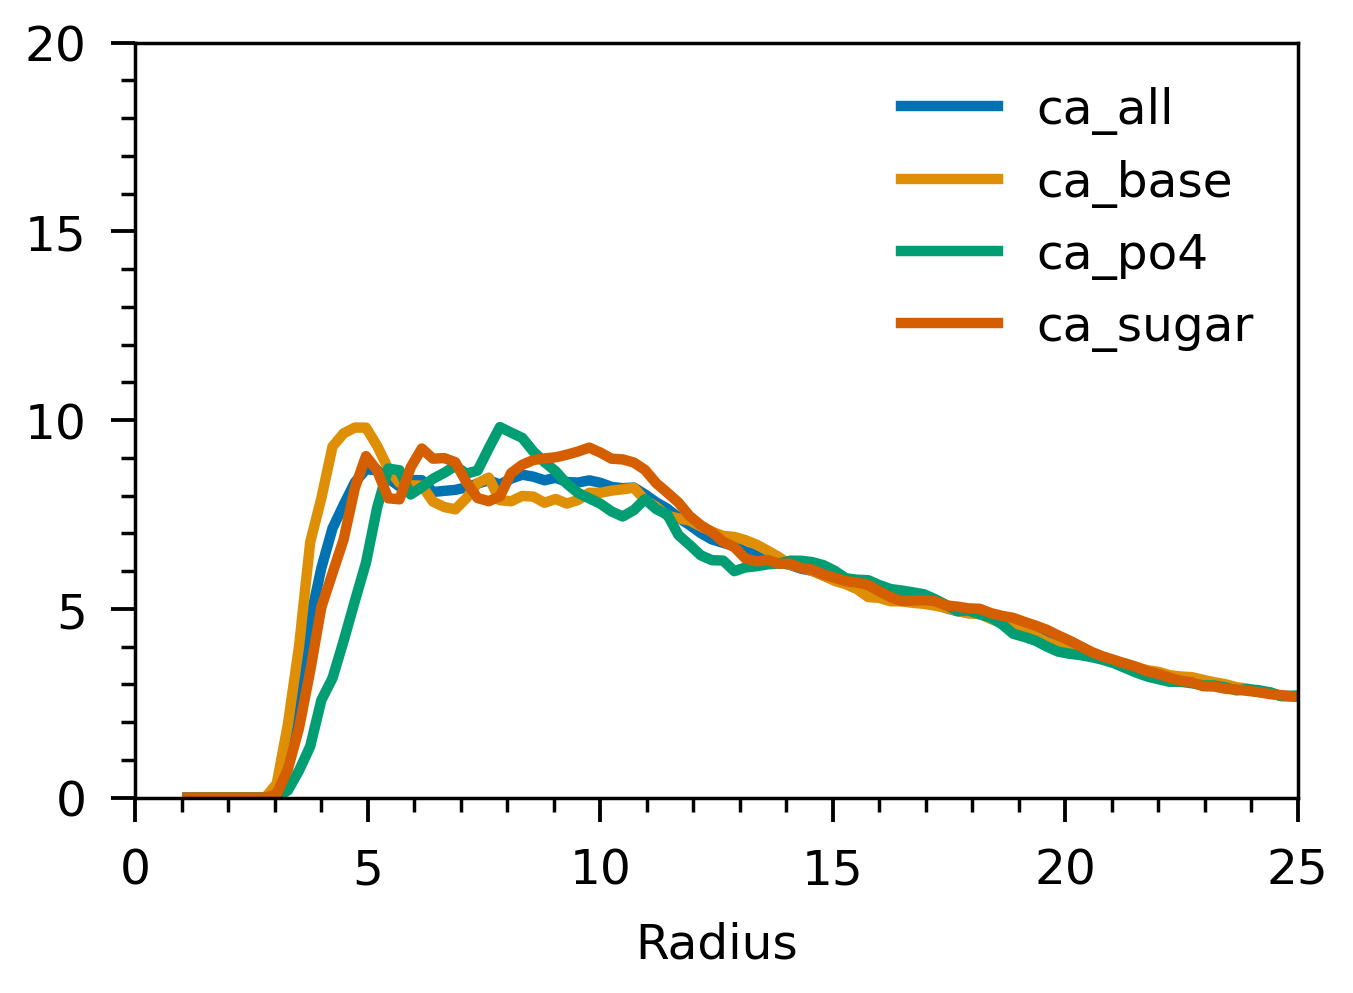

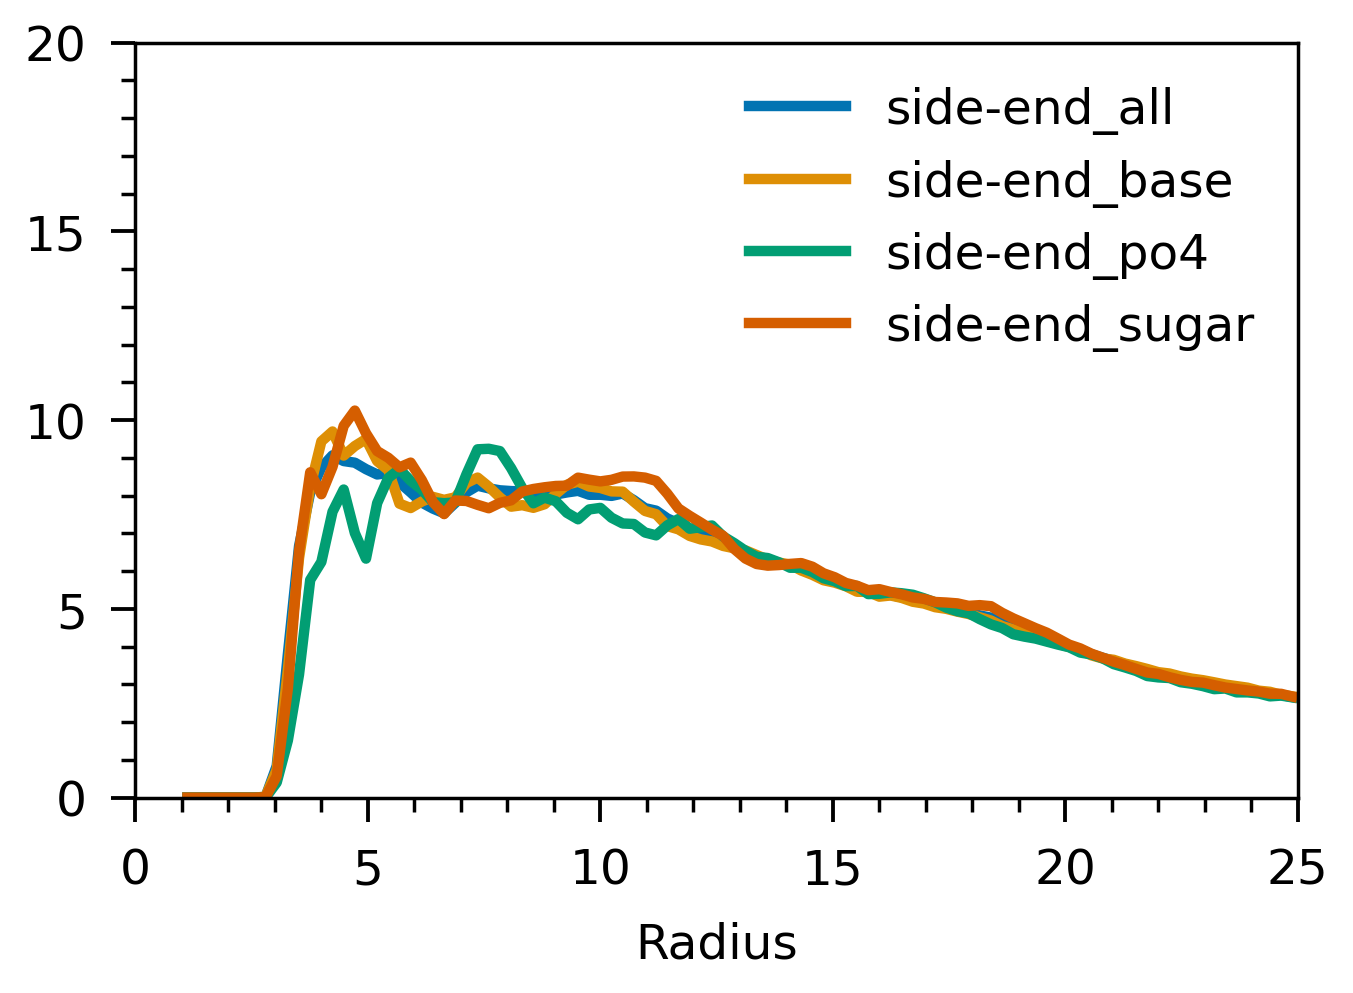

In [101]:

rdf_dict = make_res_dict(rdf_methods, "SER")
rdf_stack_graph(rdf_dict, rdf_ca_methods, height=2, width=3, y_range=[0,20])
rdf_stack_graph(rdf_dict, rdf_side_end_methods, height=2, width=3, y_range=[0,20])

### SASA calculation

In [71]:
sasa = pd.read_csv('../sasa.csv', header=None)
sasa.head()

0            1            2            3            4   \
0          ALA          ARG          ASN          ASP          CYS   
1  [243.20619]  [362.94217]  [241.37347]   [211.5492]  [213.41013]   
2  [252.16177]  [363.78497]  [235.88776]  [232.48785]  [210.68701]   
3  [258.60135]  [339.38568]  [251.05965]  [211.93857]  [200.44171]   
4  [249.09267]   [341.8275]  [254.08144]  [224.67657]  [201.63893]   

            5             6            7            8            9   \
0          GLN           GLU          GLY          HIS          ILE   
1   [278.2807]    [96.87466]   [177.3602]  [327.78314]  [222.05093]   
2   [298.0151]   [110.13097]  [197.00075]  [324.52573]  [223.91092]   
3  [291.08835]   [122.26582]   [187.5166]  [341.85498]  [211.53232]   
4   [284.1662]  [111.399826]  [181.28152]  [330.07404]  [286.23373]   

            10           11           12           13           14  \
0          LEU          LYS          MET          PHE          PRO   
1   [247.3594]  [252.37415]  [260.27185]  [298.10947]   [149.1384]   
2   [267.9567]    [257.276]  [249.57013]  [300.32516]  [150.25986]   
3  [276.03705]  [249.28232]  [241.52295]  [302.48846]  [202.66006]   
4  [277.22025]  [259.72296]  [203.80351]  [305.10657]   [166.2314]   

            15           16           17           18           19  
0          SER          THR          TRP          TYR          VAL  
1  [238.48093]   [274.6695]   [311.3923]  [179.89384]  [173.58182]  
2  [238.21129]  [269.21332]   [327.9757]  [180.84502]   [190.2003]  
3  [241.33841]  [274.45807]  [341.53928]  [179.68396]  [186.98395]  
4  [247.56297]  [284.24124]  [321.42578]  [181.35455]  [157.84988]

In [75]:
sasa = sasa.iloc[1:,:]
sasa = sasa.applymap(lambda x: float(str(x).strip('[]')))
sasa.columns = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
sasa

ALA        ARG        ASN         ASP        CYS        GLN  \
2     252.16177  363.78497  235.88776  232.487850  210.68701  298.01510   
3     258.60135  339.38568  251.05965  211.938570  200.44171  291.08835   
4     249.09267  341.82750  254.08144  224.676570  201.63893  284.16620   
5     257.83730  346.43552  249.20105  201.611770  196.93118  277.82944   
6     242.40652  340.76410  244.14137  195.913960  200.82707  277.57135   
...         ...        ...        ...         ...        ...        ...   
3996  265.87310  317.95770  254.70972  119.904785  296.90802  294.92645   
3997  258.85535  306.33243  257.45834  138.012540  300.69860  273.83246   
3998  269.36218  304.84842  264.78894  135.654110  298.56506  291.97345   
3999  263.17984  315.81060  264.71585  236.819290  299.57245  288.94897   
4000  278.29540  321.90424  275.24250  263.909500  314.40887  302.53714   

             GLU        GLY        HIS        ILE        LEU        LYS  \
2     110.130970  197.00075  324.52573  223.91092  267.95670  257.27600   
3     122.265820  187.51660  341.85498  211.53232  276.03705  249.28232   
4     111.399826  181.28152  330.07404  286.23373  277.22025  259.72296   
5     116.941895  179.56584  337.40924  225.89359  258.34848  258.09680   
6     107.112470  173.20462  326.05280  228.08646  279.52325  249.50970   
...          ...        ...        ...        ...        ...        ...   
3996  163.926120  260.58734  266.12863  308.57130  287.15326  259.23590   
3997  139.474840  265.38715  270.30320  265.00610  289.24597  241.47390   
3998  150.746250  270.62466  270.52283  290.81220  292.65040  247.24298   
3999  179.826840  290.66570  267.21550  299.82037  285.61430  259.98070   
4000  155.839570  255.27682  283.20610  290.43090  289.46112  247.89404   

             MET        PHE        PRO        SER        THR        TRP  \
2     249.570130  300.32516  150.25986  238.21129  269.21332  327.97570   
3     241.522950  302.48846  202.66006  241.33841  274.45807  341.53928   
4     203.803510  305.10657  166.23140  247.56297  284.24124  321.42578   
5     208.695430  304.45862  183.83194  252.78094  269.07635  336.38330   
6     208.312640  295.15356  191.41121  237.29417  274.78370  328.14410   
...          ...        ...        ...        ...        ...        ...   
3996   64.775530  377.76343  165.54994  238.41162        NaN  300.64194   
3997  101.131790  380.29840  150.52007  234.01392        NaN  294.18942   
3998  134.773910  346.09120  154.98653  235.13254        NaN  280.14536   
3999   55.290653  348.44760  302.47550  238.23875        NaN  282.36980   
4000   73.971115  354.08514  168.91017  228.35585        NaN  283.72885   

            TYR        VAL  
2     180.84502  190.20030  
3     179.68396  186.98395  
4     181.35455  157.84988  
5     185.90176  212.69075  
6     192.28815  317.46810  
...         ...        ...  
3996  274.65280  127.80585  
3997  276.44012  123.92123  
3998  265.43973  128.69177  
3999  263.64337  122.69234  
4000  268.09525  135.27124  

[3999 rows x 20 columns]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ALA'),
  Text(2, 0, 'ARG'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'GLN'),
  Text(7, 0, 'GLU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'HIS'),
  Text(10, 0, 'ILE'),
  Text(11, 0, 'LEU'),
  Text(12, 0, 'LYS'),
  Text(13, 0, 'MET'),
  Text(14, 0, 'PHE'),
  Text(15, 0, 'PRO'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'THR'),
  Text(18, 0, 'TRP'),
  Text(19, 0, 'TYR'),
  Text(20, 0, 'VAL')])

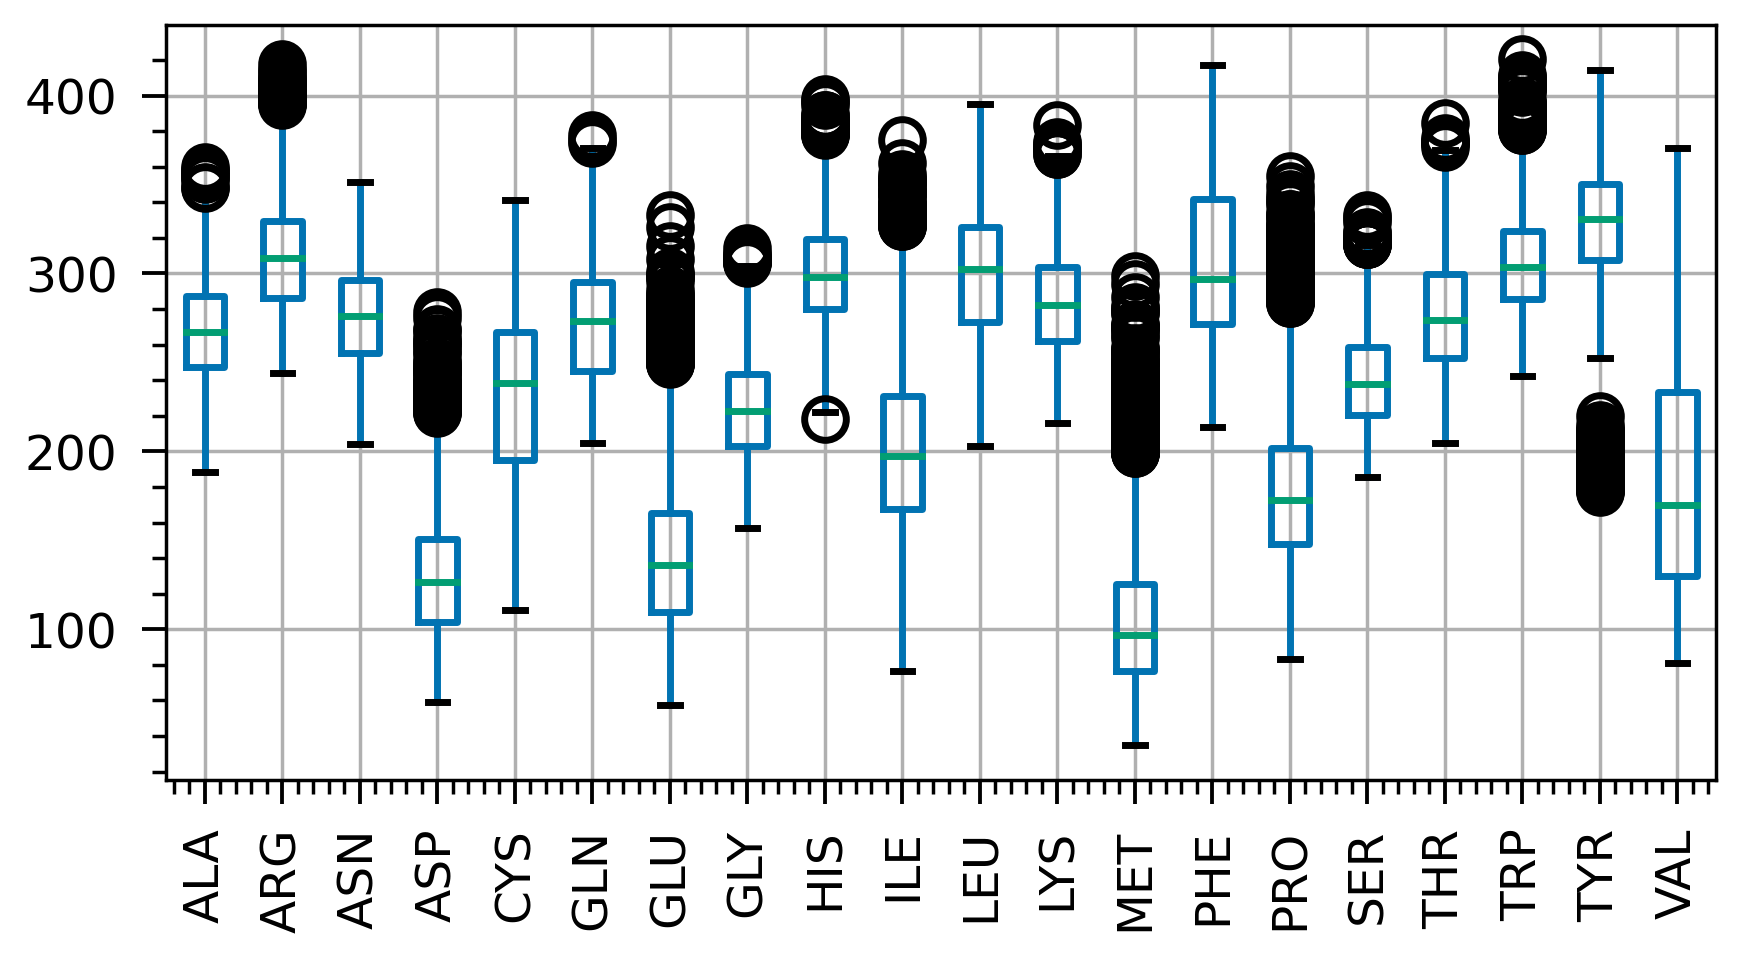

In [76]:
plt.figure(figsize=(4,2))
sasa.boxplot()
plt.xticks(rotation=90)

Text(0, 0.5, 'sasa of the cluster')

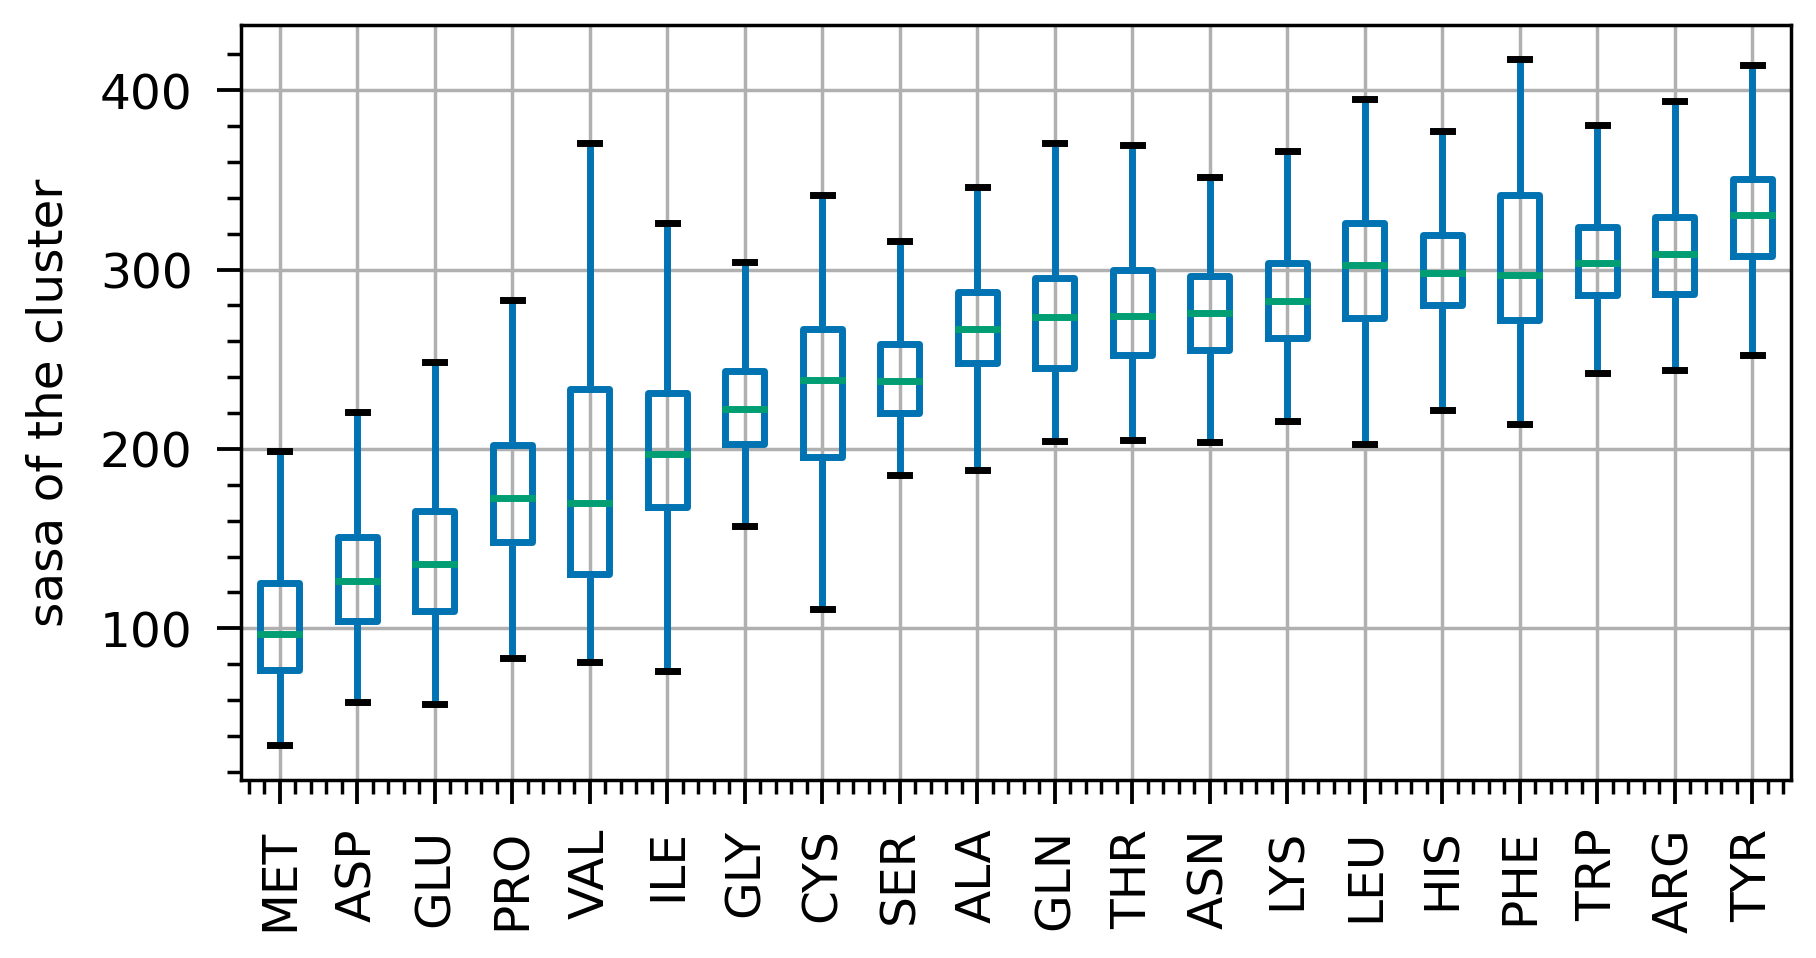

In [80]:
plt.figure(figsize=(4,2))
index_sort = sasa.mean().sort_values().index
sasa_sorted = sasa[index_sort]
sasa_sorted.boxplot(showfliers=False)

plt.xticks(rotation=90)
plt.ylabel('sasa of the cluster')
# plt.ylim(0.6,0.85)

In [42]:
sasa_patom = pd.read_csv('../sasa_patom.csv')
sasa_patom.head()

ALA       ARG       ASN       ASP       CYS       GLN       GLU  \
0  0.074950  0.049484  0.053232  0.082264  0.060057  0.061472  0.080223   
1  0.074180  0.048879  0.055767  0.080762  0.063015  0.058295  0.083184   
2  0.072524  0.048835  0.059843  0.087104  0.062938  0.058264  0.075755   
3  0.070419  0.047303  0.057861  0.082040  0.058484  0.061215  0.081363   
4  0.073635  0.048032  0.057236  0.082889  0.061533  0.057846  0.078955   

        GLY       HIS       ILE       LEU       LYS       MET       PHE  \
0  0.060730  0.074312  0.067514  0.063389  0.062790  0.078279  0.058998   
1  0.059994  0.072197  0.067956  0.066472  0.058387  0.092010  0.060659   
2  0.067416  0.073520  0.067857  0.073455  0.061124  0.088357  0.062100   
3  0.063772  0.075148  0.072147  0.069222  0.060229  0.085945  0.061396   
4  0.062545  0.073701  0.074058  0.065950  0.061924  0.088216  0.056639   

        PRO       SER       THR       TRP       TYR       VAL  
0  0.072905  0.052739  0.057867  0.055859  0.061887  0.061031  
1  0.070502  0.054350  0.054416  0.056677  0.060045  0.075867  
2  0.072468  0.053888  0.053763  0.057768  0.060571  0.073504  
3  0.071819  0.049710  0.055910  0.056023  0.059717  0.070692  
4  0.070590  0.051093  0.053703  0.054657  0.060691  0.075151

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ALA'),
  Text(2, 0, 'ARG'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'ASP'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'GLN'),
  Text(7, 0, 'GLU'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'HIS'),
  Text(10, 0, 'ILE'),
  Text(11, 0, 'LEU'),
  Text(12, 0, 'LYS'),
  Text(13, 0, 'MET'),
  Text(14, 0, 'PHE'),
  Text(15, 0, 'PRO'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'THR'),
  Text(18, 0, 'TRP'),
  Text(19, 0, 'TYR'),
  Text(20, 0, 'VAL')])

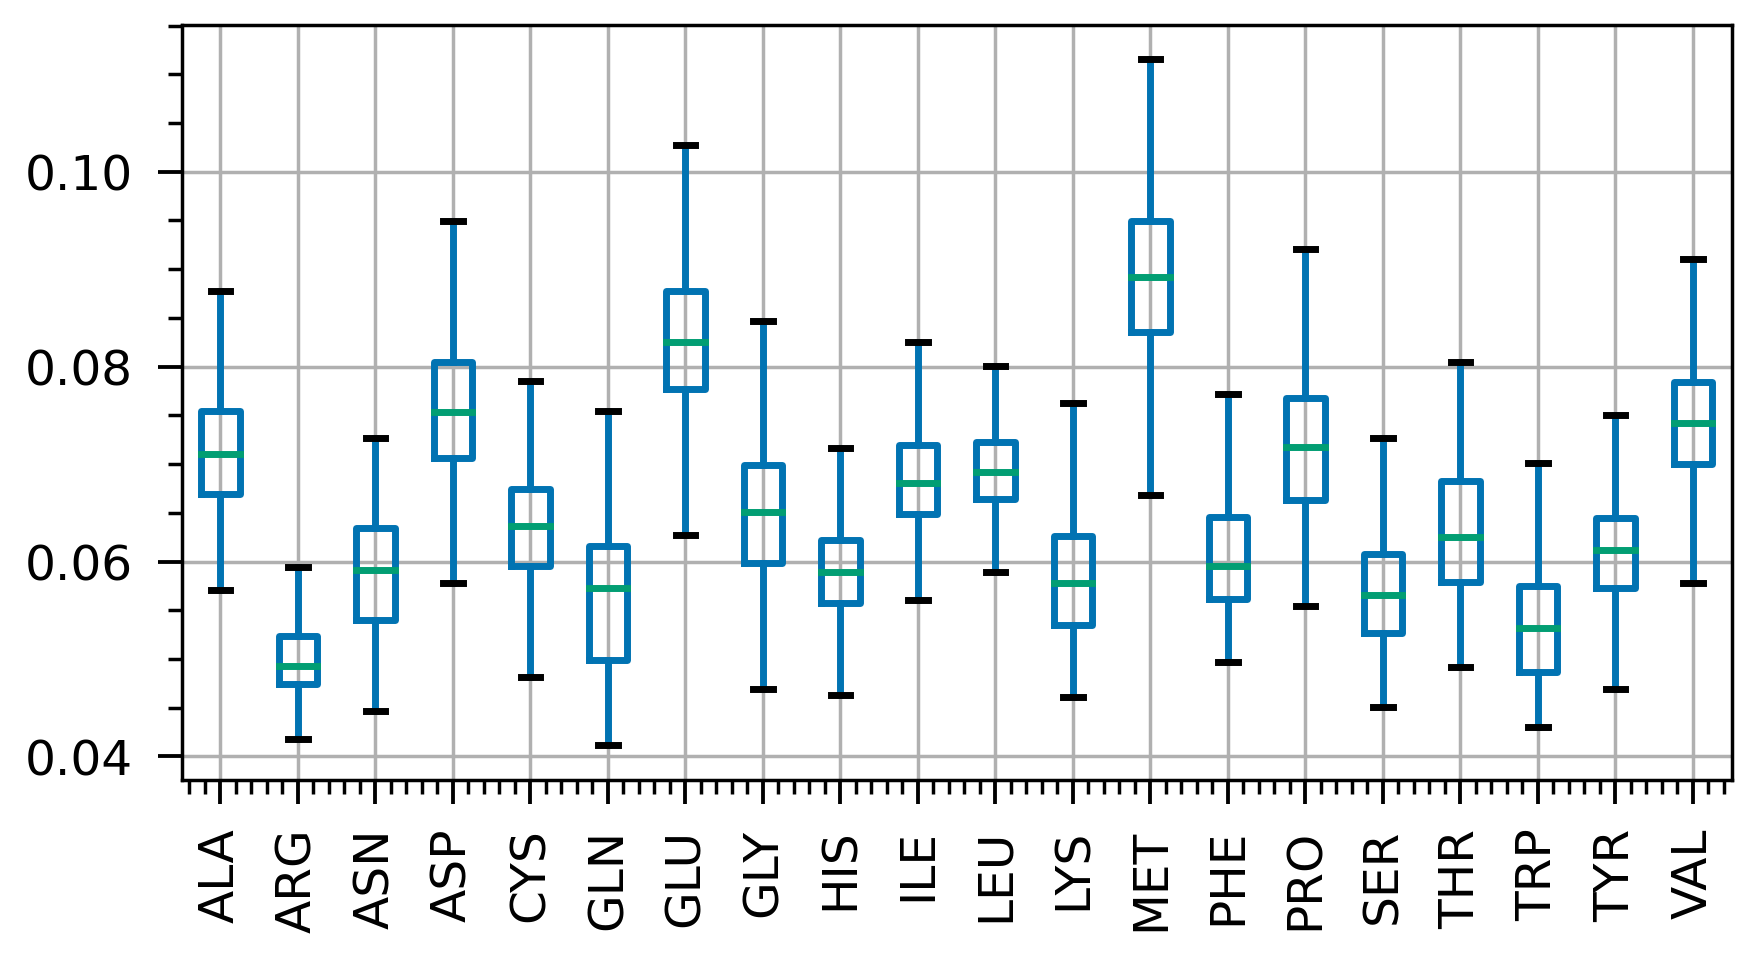

In [43]:
plt.figure(figsize=(4,2))

sasa_patom.boxplot(showfliers=False)

plt.xticks(rotation=90)

In [44]:
nonpolar_residue = ['ALA', 'GLY', 'ILE', 'LEU', 'MET', 'PHE', 'PRO', 'TRP', 'VAL']
polar_residue = ['ASN', 'CYS', 'GLN', 'SER', 'THR', 'TYR']
acid_residue = ['ASP', 'GLU']
base_residue = ['ARG', 'HIS', 'LYS']

residue_color_mapping = {
    'ARG': 'base', 'TRP': 'nonpolar', 'GLN': 'polar', 'SER': 'polar', 'LYS': 'base',
    'ASN': 'polar', 'HIS': 'base', 'PHE': 'nonpolar', 'TYR': 'polar', 'THR': 'polar',
    'CYS': 'polar', 'GLY': 'nonpolar', 'ILE': 'nonpolar', 'LEU': 'nonpolar',
    'ALA': 'nonpolar', 'PRO': 'nonpolar', 'VAL': 'nonpolar', 'ASP': 'acid',
    'GLU': 'acid', 'MET': 'nonpolar'
}



group_colors = {
    'nonpolar': 'blue',
    'polar': 'green',
    'acid': 'orange',
    'base': 'red'
}


# Replace the array elements with color group names
residue_names = ['ARG', 'TRP', 'GLN', 'SER', 'LYS', 'ASN', 'HIS', 'PHE', 'TYR', 'THR',
                 'CYS', 'GLY', 'ILE', 'LEU', 'ALA', 'PRO', 'VAL', 'ASP', 'GLU', 'MET']

color_group_names = [group_colors[residue_color_mapping[residue]] for residue in residue_names]


# Display the color group names
print(color_group_names)

['red', 'blue', 'green', 'green', 'red', 'green', 'red', 'blue', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'blue']


Text(0, 0.5, 'SASA per atom')

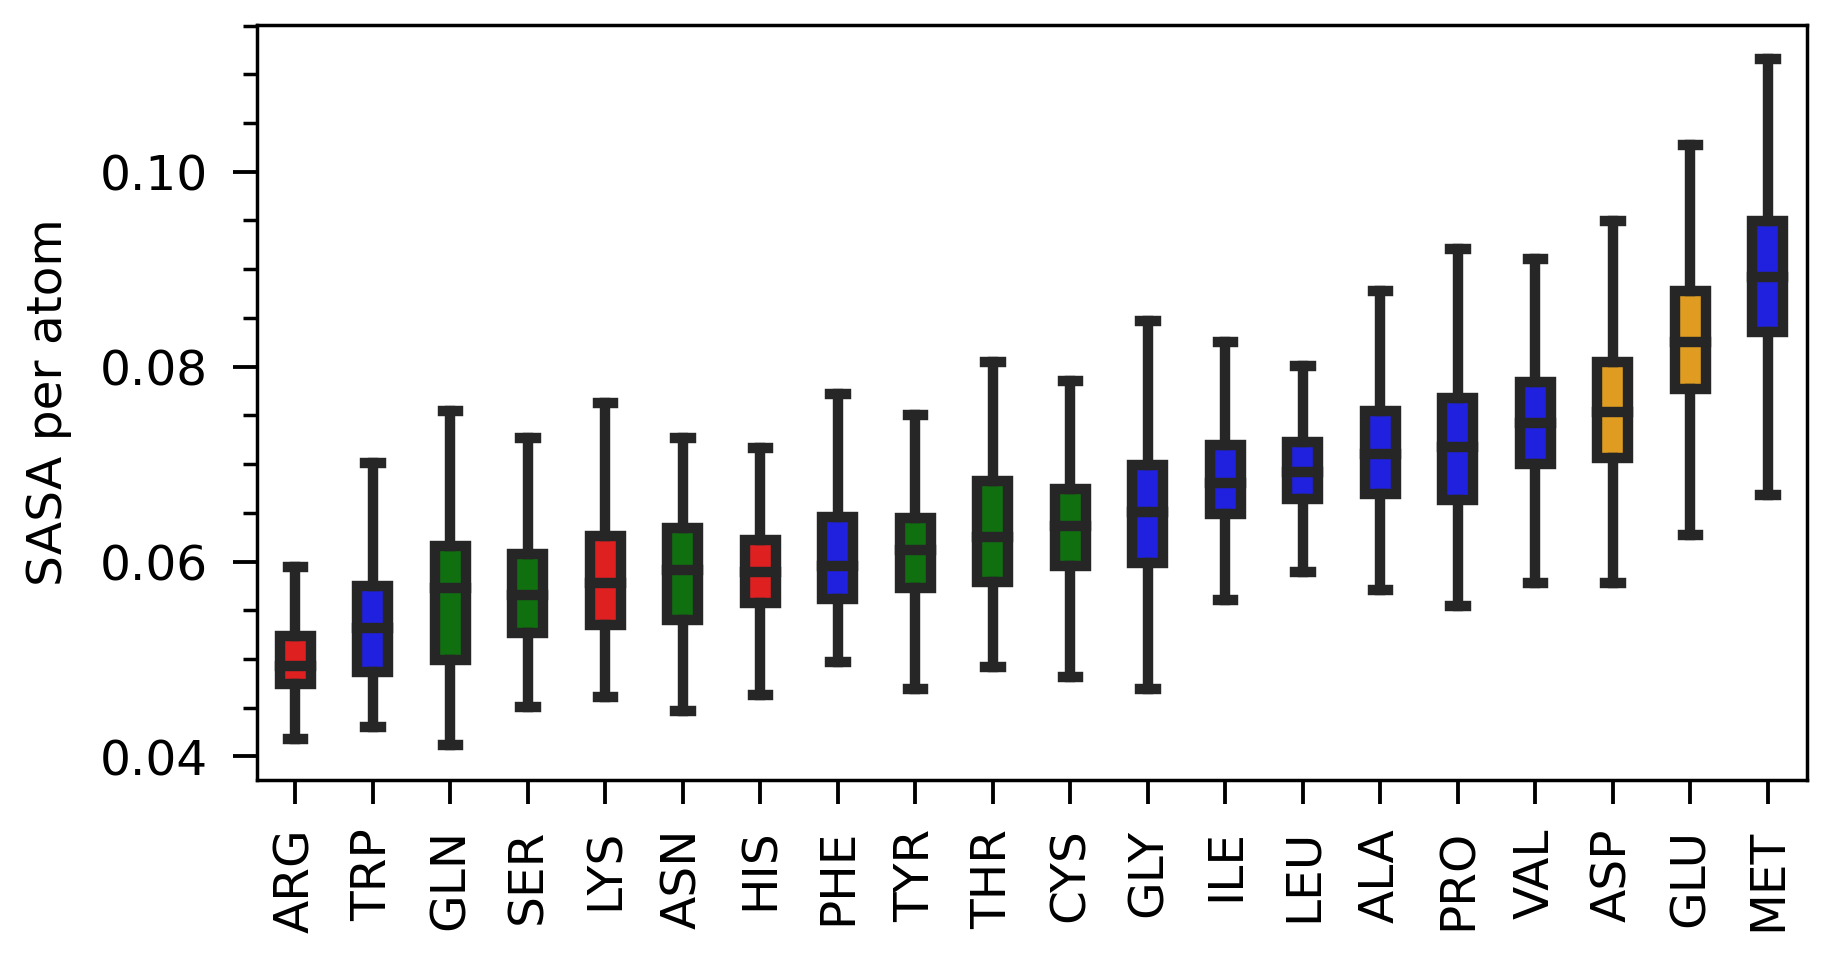

In [46]:
plt.figure(figsize=(4,2))
index_sort = sasa_patom.mean().sort_values().index
sasa_sorted = sasa_patom[index_sort]

box_colors = [group_colors[residue_color_mapping[residue]] for residue in index_sort]

sns.boxplot(data=sasa_sorted,showfliers=False,palette=box_colors,width=0.4)
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xticks(rotation=90)
plt.ylabel('SASA per atom')
# # plt.ylim(0.6,0.85)

In [6]:
### SASA per residue
sasa_pr = pd.read_csv('../sasa_persidue.csv')
sasa_pr.head()

ALA       ARG       ASN       ASP       CYS       GLN       GLU  \
0  0.987445  0.815112  0.740071  1.165773  0.775258  0.907072  1.380928   
1  0.985804  0.791201  0.803233  1.209424  0.792786  0.859025  1.297730   
2  0.923420  0.803978  0.833581  1.171326  0.741960  0.891976  1.340063   
3  1.018567  0.785113  0.843717  1.130499  0.825277  0.867432  1.374528   
4  1.049661  0.781563  0.807584  1.153399  0.781887  0.853800  1.390345   

        GLY       HIS       ILE       LEU       LYS       MET       PHE  \
0  0.731969  1.103548  1.075916  0.993606  1.057764  1.220570  0.920413   
1  0.766231  1.087531  1.161015  1.021601  1.033148  1.389970  0.896423   
2  0.729169  1.011000  1.097247  0.991487  1.032497  1.471494  0.928025   
3  0.751839  1.037104  1.090564  1.052062  1.054714  1.556507  0.921036   
4  0.741596  1.026698  1.106543  0.992587  1.061626  1.773414  0.932590   

        PRO       SER       THR       TRP       TYR       VAL  
0  1.066178  0.688076  0.791301  0.919675  0.969393  0.921889  
1  1.003194  0.668281  0.751849  0.897291  0.950661  1.117518  
2  1.123936  0.650697  0.791863  0.869038  0.915026  0.956911  
3  1.270639  0.665647  0.778868  0.911102  0.933837  1.003930  
4  1.258184  0.646951  0.808448  0.920475  0.904744  1.011911

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'SER'),
  Text(1, 0, 'GLY'),
  Text(2, 0, 'ASN'),
  Text(3, 0, 'ARG'),
  Text(4, 0, 'GLN'),
  Text(5, 0, 'CYS'),
  Text(6, 0, 'HIS'),
  Text(7, 0, 'THR'),
  Text(8, 0, 'TRP'),
  Text(9, 0, 'ALA'),
  Text(10, 0, 'PHE'),
  Text(11, 0, 'TYR'),
  Text(12, 0, 'LYS'),
  Text(13, 0, 'PRO'),
  Text(14, 0, 'ILE'),
  Text(15, 0, 'LEU'),
  Text(16, 0, 'VAL'),
  Text(17, 0, 'ASP'),
  Text(18, 0, 'MET'),
  Text(19, 0, 'GLU')])

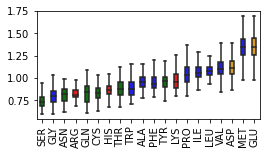

In [7]:
plt.figure(figsize=(4,2))
index_sort = sasa_pr.mean().sort_values().index
sasa_pr_sorted = sasa_pr[index_sort]

box_colors = [group_colors[residue_color_mapping[residue]] for residue in index_sort]

sns.boxplot(data=sasa_pr_sorted,showfliers=False,palette=box_colors,width=0.4)
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xticks(rotation=90)
# # plt.ylim(0.6,0.85)

In [28]:
### Contact calculation

con = pd.read_csv('../cluster_size.csv')
con.head()

ALA_p  ALA_r  ARG_p  ARG_r  ASN_p  ASN_r  ASP_p  ASP_r  CYS_p  CYS_r  ...  \
0    222     58    297     60    288     58     45     22    219     50  ...   
1    228     58    294     60    285     58     45     22    216     50  ...   
2    228     58    291     58    288     58     39     22    222     50  ...   
3    225     56    297     60    288     60     69     32    216     50  ...   
4    222     56    294     60    288     60     45     18    219     50  ...   

   SER_p  SER_r  THR_p  THR_r  TRP_p  TRP_r  TYR_p  TYR_r  VAL_p  VAL_r  
0    264     58  273.0   58.0    270     54    174     34    102     22  
1    267     58  255.0   54.0    270     54    189     36     96     30  
2    264     56  267.0   56.0    273     56    171     34    123     34  
3    270     56  267.0   58.0    279     56    183     36     87     28  
4    267     56  261.0   58.0    276     52    189     34    111     32  

[5 rows x 40 columns]

In [29]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']
rna = []
pro = []
for i in x_residue:
    rna.append(i+'_r')
    pro.append(i+'_p')


In [32]:
clus_r = con[rna]/60
clus_p = con[pro]/300
clus_p.columns = x_residue
clus_r.columns = x_residue

In [33]:
clus_p

ALA   ARG   ASN   ASP   CYS   GLN   GLU   GLY   HIS   ILE   LEU   LYS  \
0      0.74  0.99  0.96  0.15  0.73  0.96  0.11  0.72  0.89  0.54  0.64  0.71   
1      0.76  0.98  0.95  0.15  0.72  0.96  0.09  0.73  0.84  0.56  0.61  0.70   
2      0.76  0.97  0.96  0.13  0.74  0.96  0.18  0.76  0.89  0.57  0.62  0.69   
3      0.75  0.99  0.96  0.23  0.72  0.95  0.16  0.76  0.88  0.60  0.65  0.70   
4      0.74  0.98  0.96  0.15  0.73  0.95  0.11  0.75  0.89  0.60  0.64  0.71   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
19494  0.65  0.98  0.94  0.49  0.89  0.92  0.28  0.91  0.89  0.49  0.75  0.78   
19495  0.65  0.98  0.94  0.49  0.88  0.93  0.31  0.90  0.83  0.59  0.72  0.78   
19496  0.68  0.96  0.94  0.52  0.88  0.93  0.21  0.86  0.87  0.51  0.70  0.78   
19497  0.72  0.96  0.93  0.45  0.87  0.92  0.22  0.84  0.85  0.60  0.65  0.76   
19498  0.71  0.98  0.94  0.50  0.87  0.93  0.29  0.86  0.86  0.58  0.69  0.78   

        MET   PHE   PRO   SER   THR   TRP   TYR   VAL  
0      0.23  0.86  0.35  0.88  0.91  0.90  0.58  0.34  
1      0.17  0.84  0.34  0.89  0.85  0.90  0.63  0.32  
2      0.16  0.85  0.36  0.88  0.89  0.91  0.57  0.41  
3      0.13  0.83  0.34  0.90  0.89  0.93  0.61  0.29  
4      0.14  0.86  0.34  0.89  0.87  0.92  0.63  0.37  
...     ...   ...   ...   ...   ...   ...   ...   ...  
19494  0.14  0.84  0.41  0.98   NaN  0.97  0.89  0.30  
19495  0.13  0.82  0.43  0.97   NaN  0.97  0.89  0.31  
19496  0.15  0.83  0.44  0.95   NaN  0.98  0.89  0.32  
19497  0.13  0.84  0.39  0.98   NaN  0.97  0.89  0.29  
19498  0.11  0.87  0.42  0.98   NaN  0.98  0.88  0.30  

[19499 rows x 20 columns]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'ASP'),
  Text(4, 0, 'VAL'),
  Text(5, 0, 'PRO'),
  Text(6, 0, 'ILE'),
  Text(7, 0, 'CYS'),
  Text(8, 0, 'ALA'),
  Text(9, 0, 'LEU'),
  Text(10, 0, 'GLY'),
  Text(11, 0, 'LYS'),
  Text(12, 0, 'PHE'),
  Text(13, 0, 'THR'),
  Text(14, 0, 'HIS'),
  Text(15, 0, 'GLN'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'TYR'),
  Text(18, 0, 'ASN'),
  Text(19, 0, 'TRP'),
  Text(20, 0, 'ARG')])

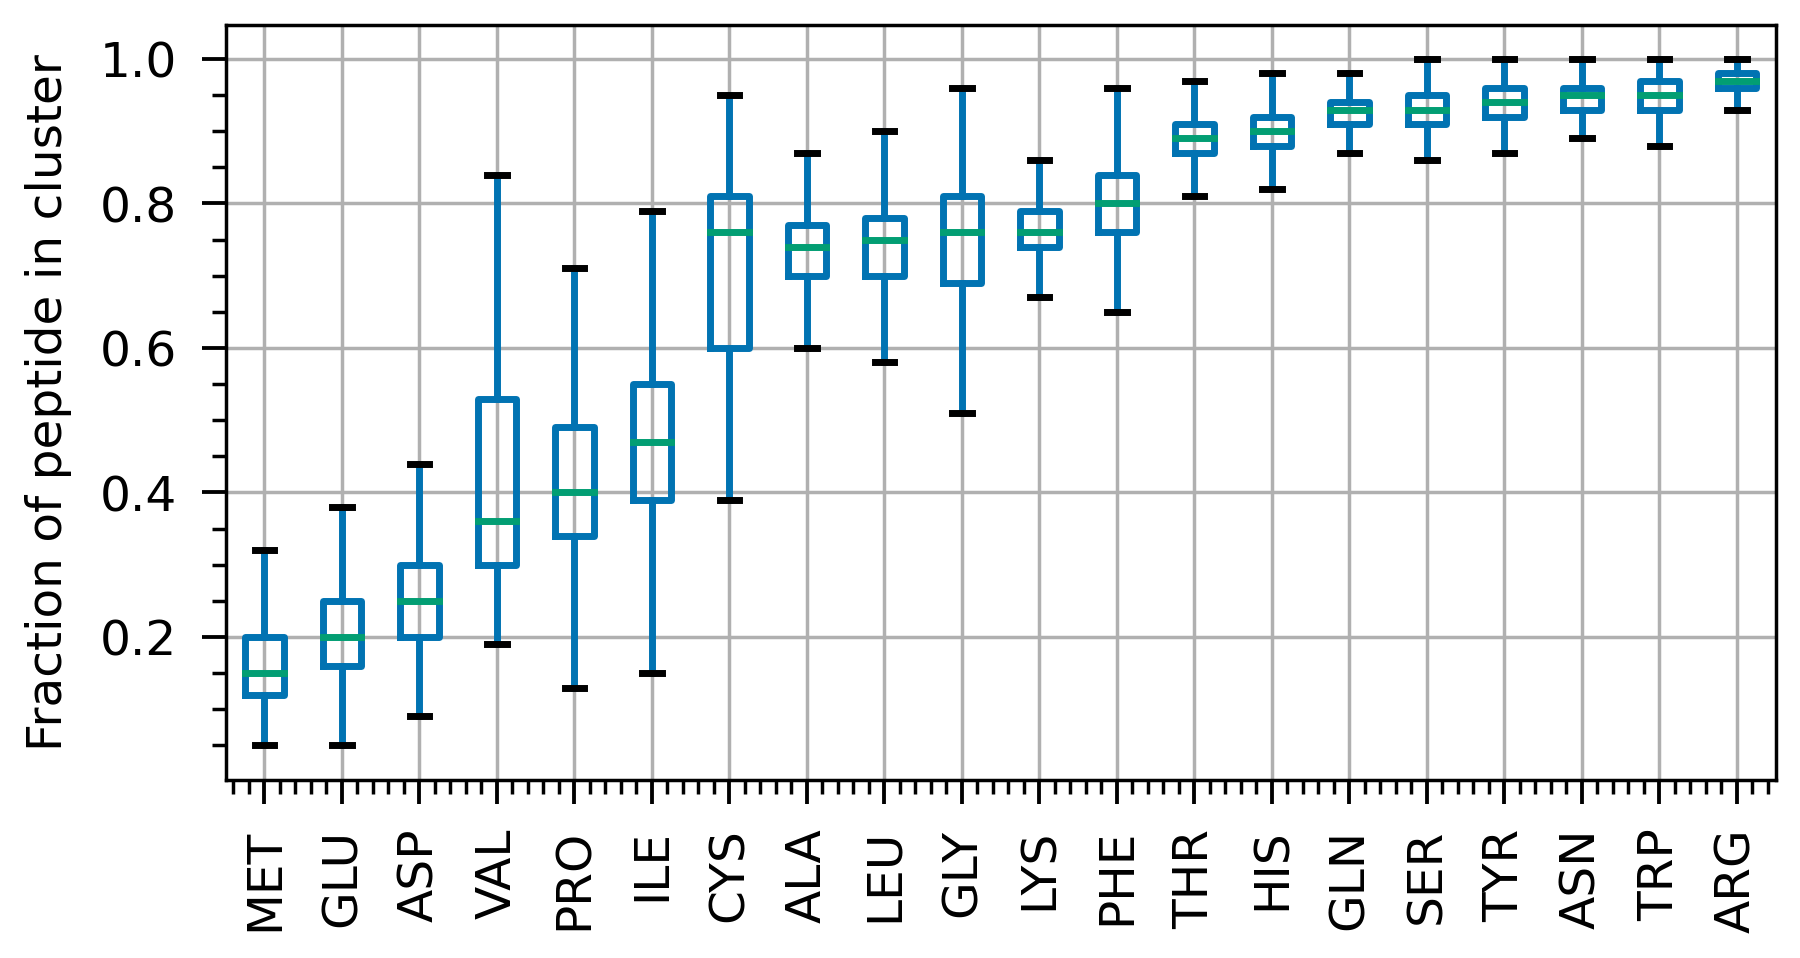

In [34]:
plt.figure(figsize=(4,2))
index_sort = clus_p.mean().sort_values().index
clus_p = clus_p[index_sort]
clus_p.boxplot(showfliers=False)
plt.ylabel('Fraction of peptide in cluster')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'ASP'),
  Text(4, 0, 'VAL'),
  Text(5, 0, 'ILE'),
  Text(6, 0, 'PRO'),
  Text(7, 0, 'CYS'),
  Text(8, 0, 'GLY'),
  Text(9, 0, 'LEU'),
  Text(10, 0, 'PHE'),
  Text(11, 0, 'ALA'),
  Text(12, 0, 'TRP'),
  Text(13, 0, 'TYR'),
  Text(14, 0, 'THR'),
  Text(15, 0, 'HIS'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'GLN'),
  Text(18, 0, 'ASN'),
  Text(19, 0, 'LYS'),
  Text(20, 0, 'ARG')])

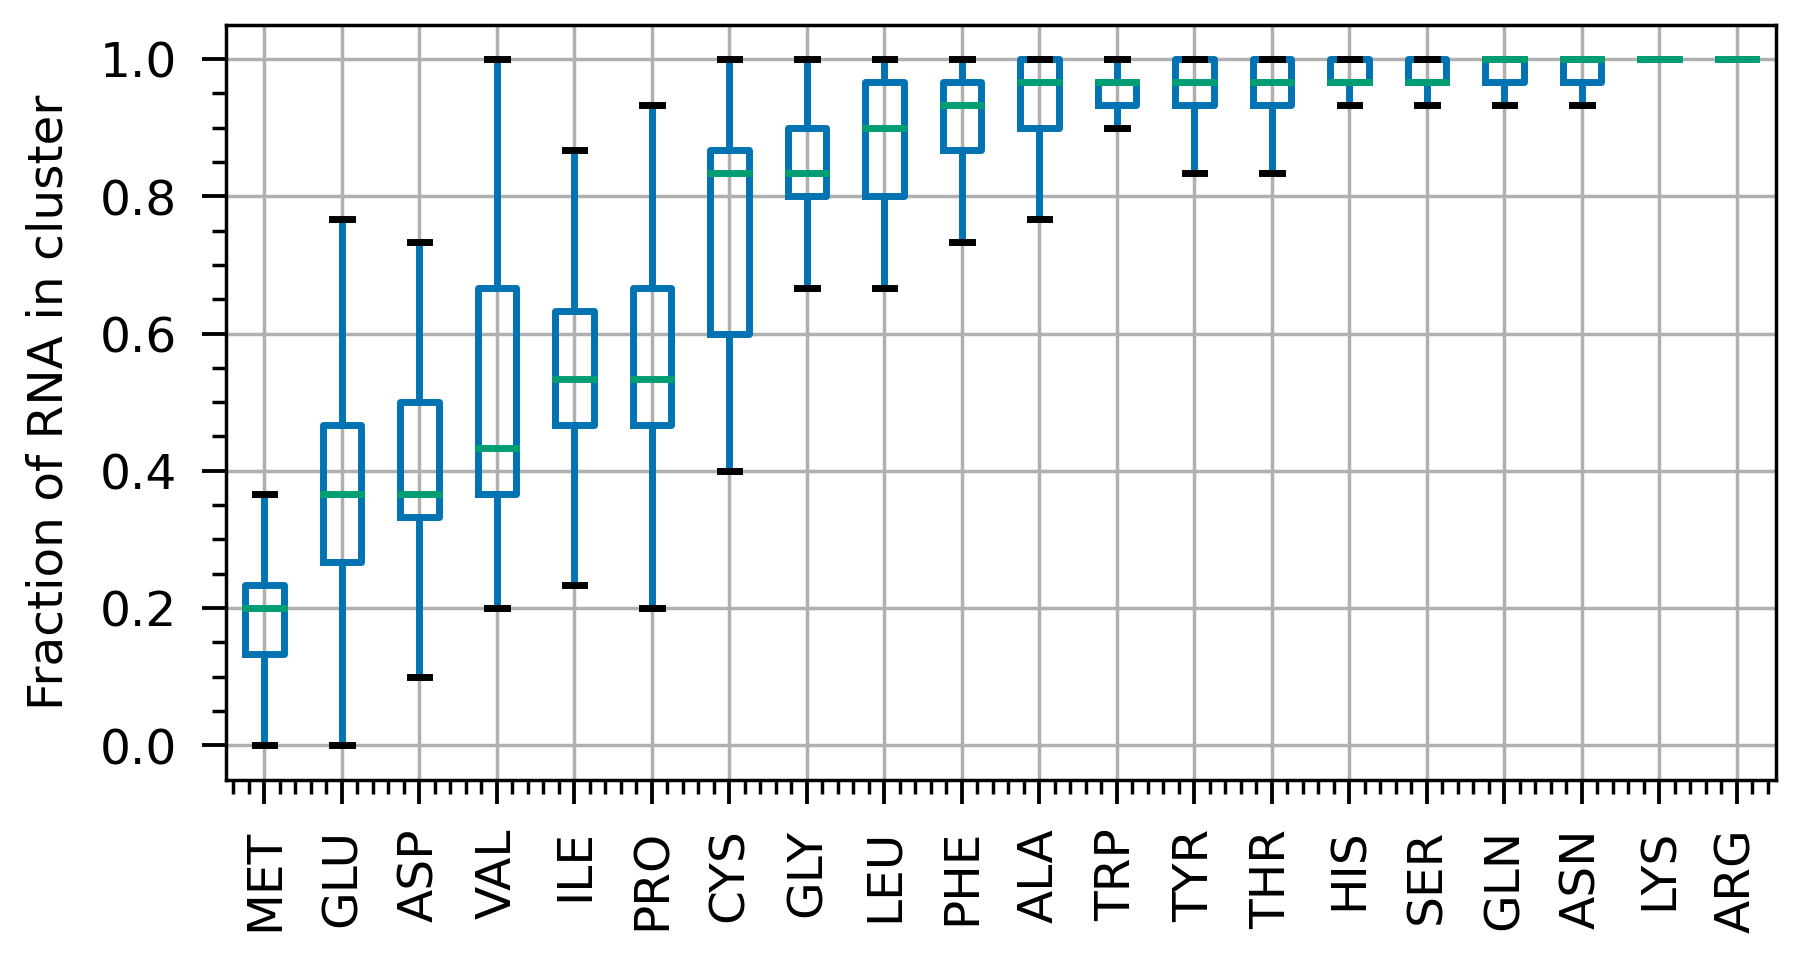

In [35]:
plt.figure(figsize=(4,2))
index_sort = clus_r.mean().sort_values().index
clus_r = clus_r[index_sort]
clus_r.boxplot(showfliers=False)
plt.ylabel('Fraction of RNA in cluster')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20]),
 [Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'ASP'),
  Text(4, 0, 'VAL'),
  Text(5, 0, 'PRO'),
  Text(6, 0, 'ILE'),
  Text(7, 0, 'CYS'),
  Text(8, 0, 'ALA'),
  Text(9, 0, 'LEU'),
  Text(10, 0, 'GLY'),
  Text(11, 0, 'LYS'),
  Text(12, 0, 'PHE'),
  Text(13, 0, 'THR'),
  Text(14, 0, 'HIS'),
  Text(15, 0, 'GLN'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'TYR'),
  Text(18, 0, 'ASN'),
  Text(19, 0, 'TRP'),
  Text(20, 0, 'ARG'),
  Text(1, 0, 'MET'),
  Text(2, 0, 'GLU'),
  Text(3, 0, 'ASP'),
  Text(4, 0, 'VAL'),
  Text(5, 0, 'PRO'),
  Text(6, 0, 'ILE'),
  Text(7, 0, 'CYS'),
  Text(8, 0, 'ALA'),
  Text(9, 0, 'LEU'),
  Text(10, 0, 'GLY'),
  Text(11, 0, 'LYS'),
  Text(12, 0, 'PHE'),
  Text(13, 0, 'THR'),
  Text(14, 0, 'HIS'),
  Text(15, 0, 'GLN'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'TYR'),
  Text(18, 0, 'ASN

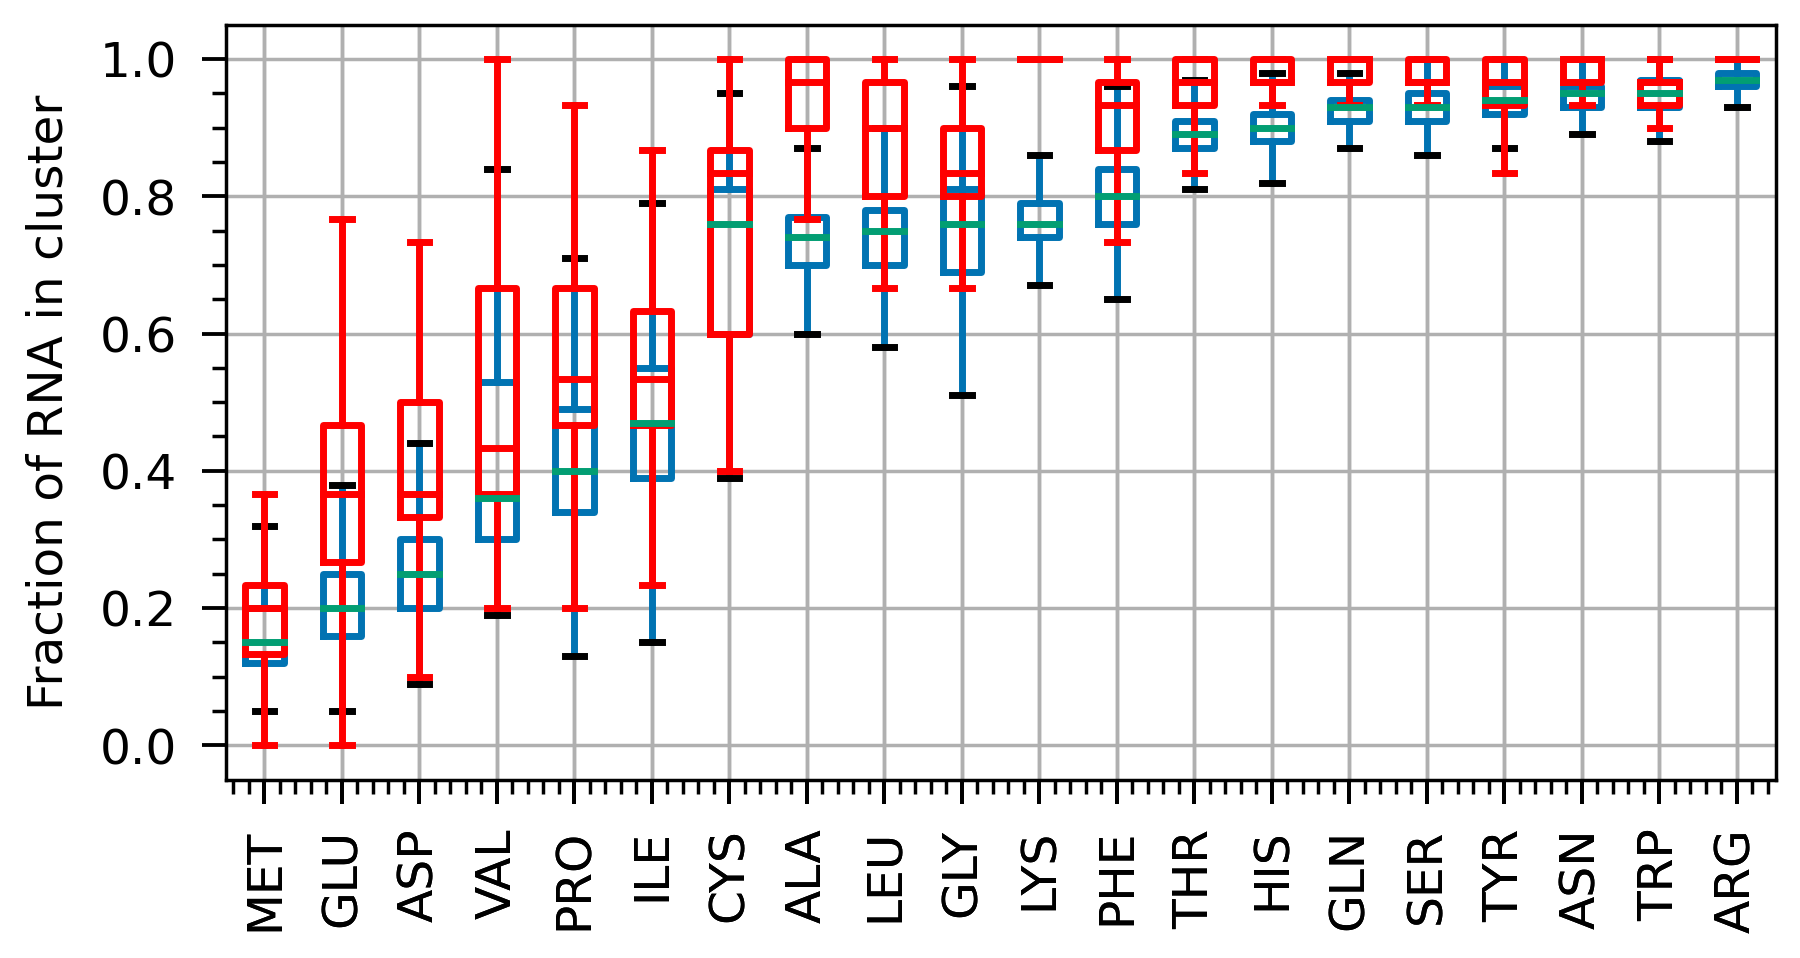

In [37]:
### plottting together

plt.figure(figsize=(4,2))
index_sort = clus_p.mean().sort_values().index
clus_p = clus_p[index_sort]
clus_p.boxplot(showfliers=False)


clus_r = clus_r[index_sort]
clus_r.boxplot(color='red',showfliers=False)
plt.ylabel('Fraction of RNA in cluster')
plt.xticks(rotation=90)

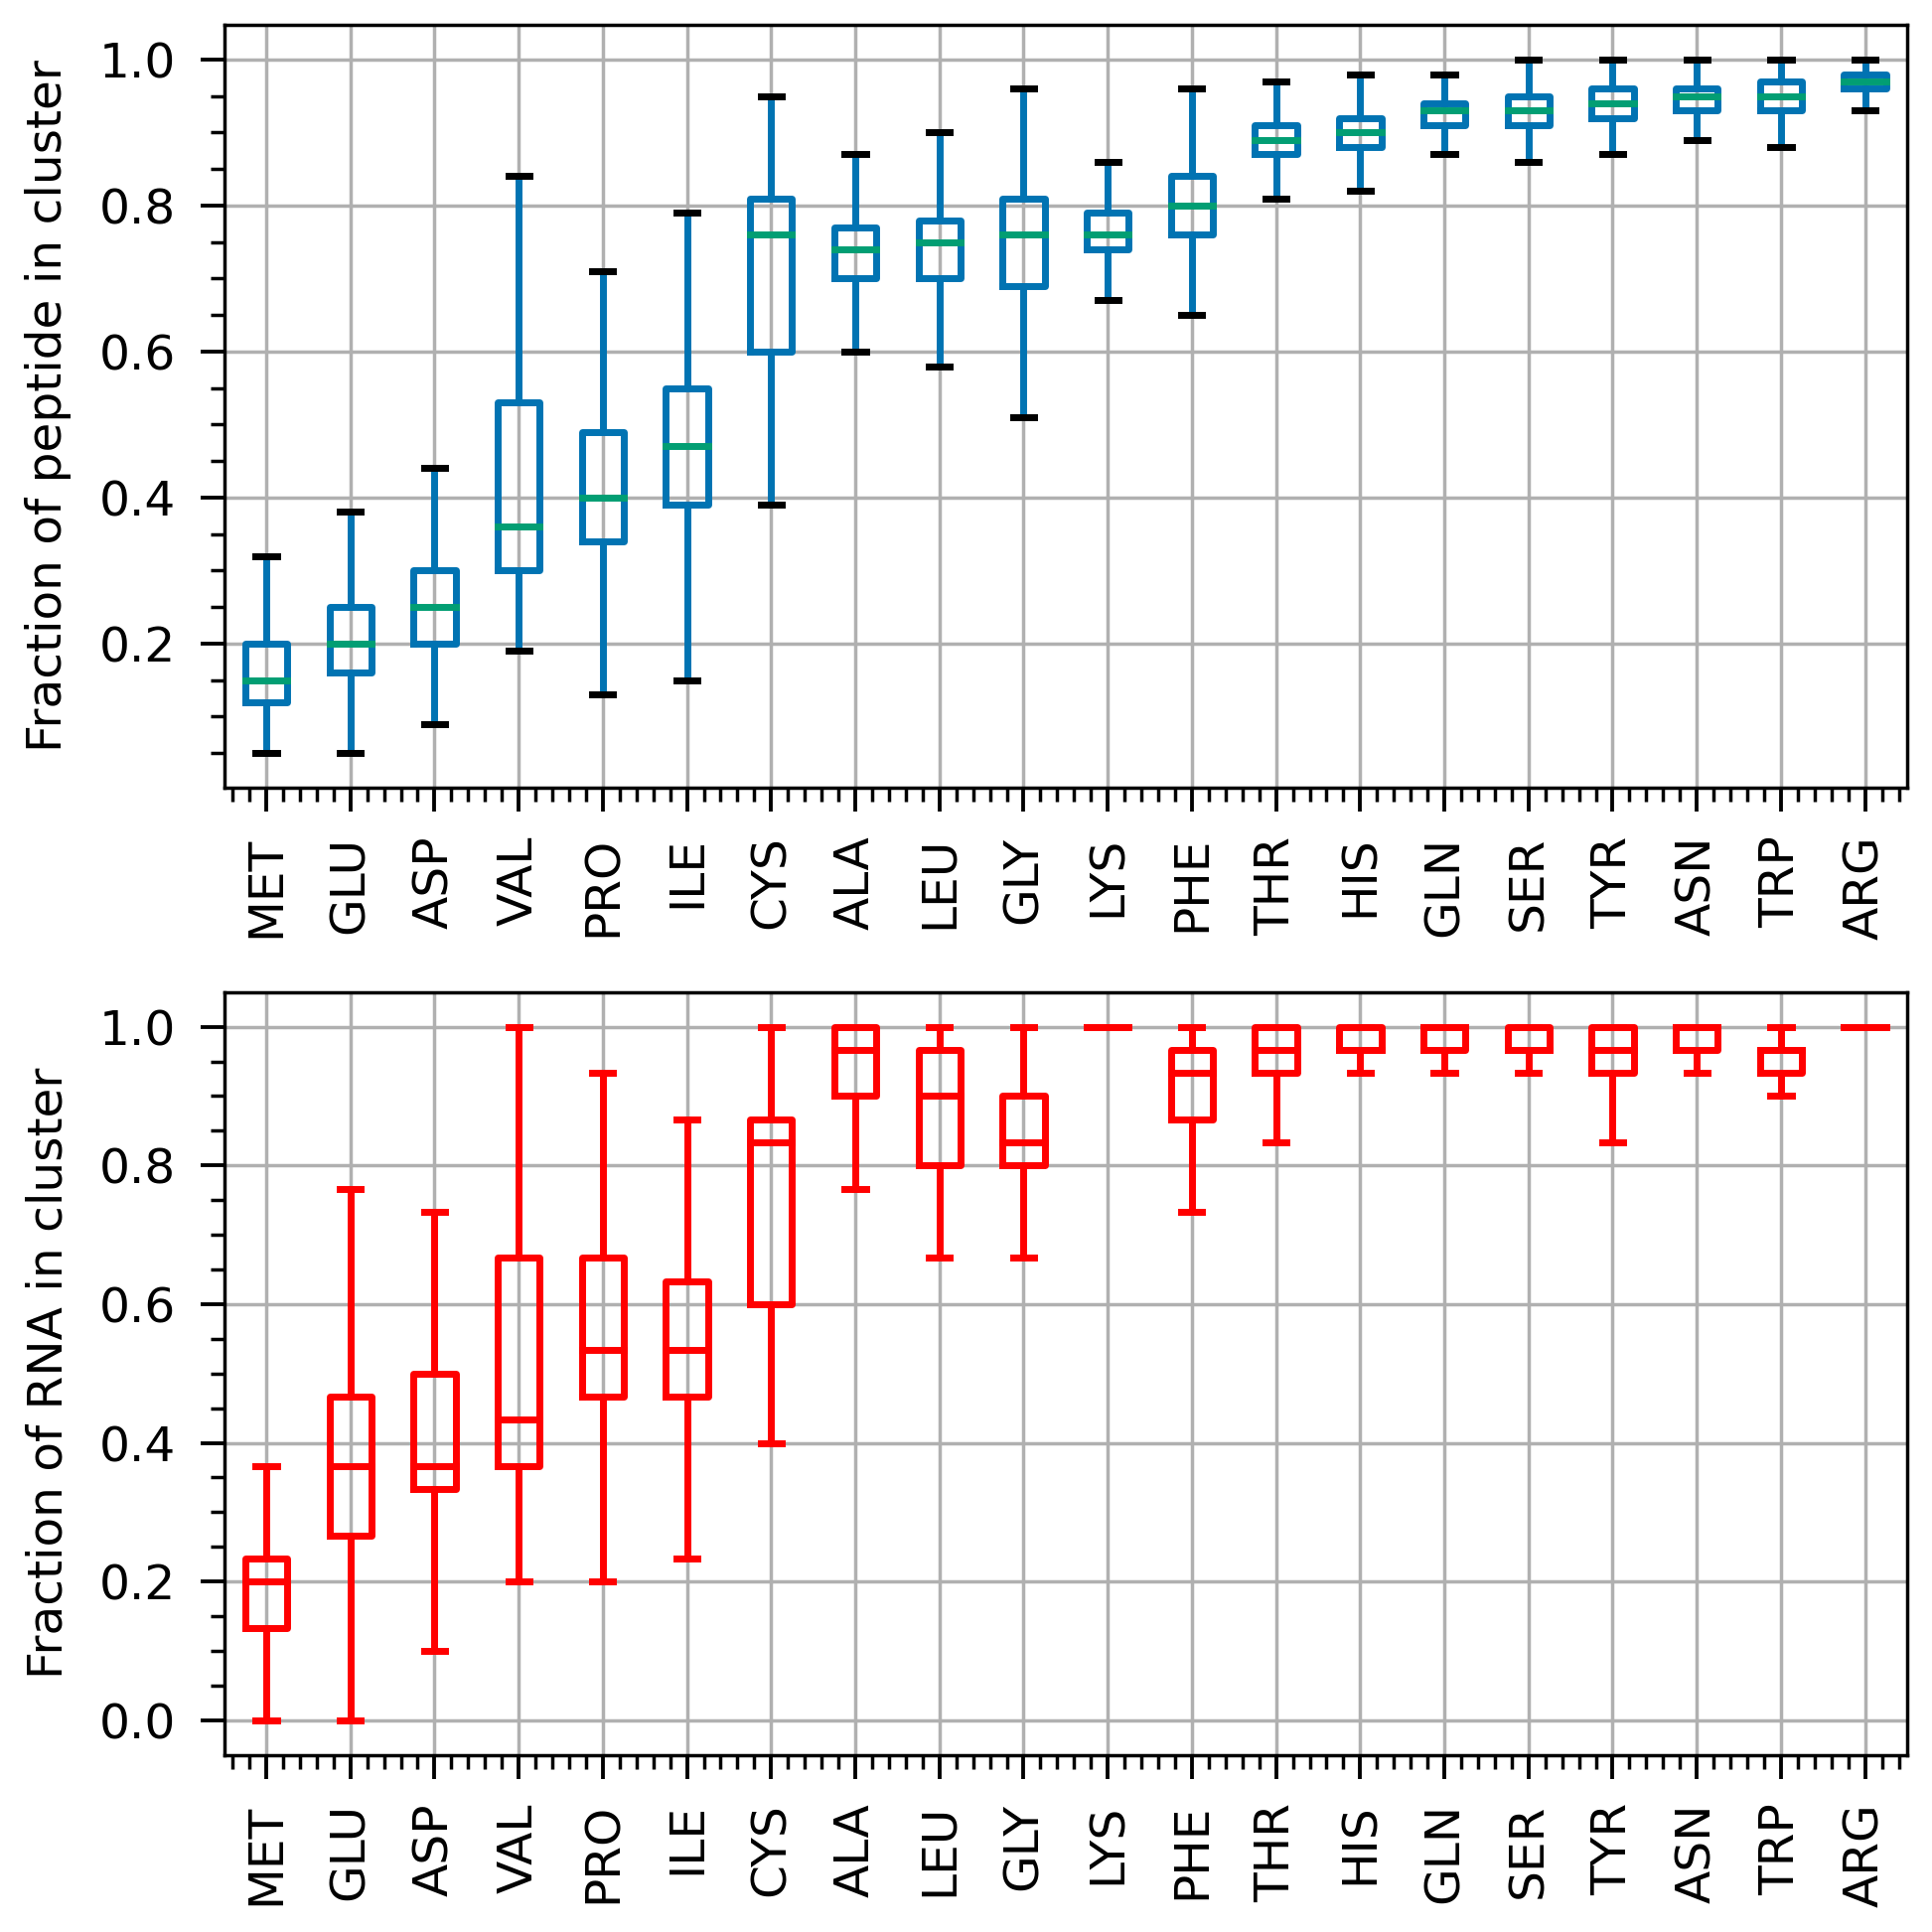

In [41]:
import matplotlib.pyplot as plt

# Assuming clus_p and clus_r are pandas DataFrame objects

# Sort the clusters by mean values
index_sort = clus_p.mean().sort_values().index
clus_p = clus_p[index_sort]
clus_r = clus_r[index_sort]

# Create the first plot for clus_p
plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
clus_p.boxplot(showfliers=False)
plt.ylabel('Fraction of peptide in cluster')
plt.xticks(rotation=90)

# Create the second plot for clus_r
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
clus_r.boxplot(color='red', showfliers=False)
plt.ylabel('Fraction of RNA in cluster')
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [3]:
### trying 
u = mda.Universe('../GLY/output_no_HOH.pdb',
                 top='../GLY/traj_nw_vysa.dcd')

In [8]:
protein = u.select_atoms('name P').resids

In [9]:
len(protein)

60

In [52]:
protein = u.select_atoms('resname ').resids

In [53]:
res_list = np.unique(protein)
res_list

array([ 91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127,
       130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166,
       169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202, 205,
       208, 211, 214, 217, 220, 223, 226, 229, 232, 235, 238, 241, 244,
       247, 250, 253, 256, 259, 262, 265, 268, 271, 274, 277, 280, 283,
       286, 289, 292, 295, 298, 301, 304, 307, 310, 313, 316, 319, 322,
       325, 328, 331, 334, 337, 340, 343, 346, 349, 352, 355, 358, 361,
       364, 367, 370, 373, 376, 379, 382, 385, 388])

In [54]:
new_u = rename_resIDs(u)

In [55]:
protein = new_u.select_atoms('resname ASN').resids

res_list = np.unique(protein)
res_list

array([ 92,  95,  98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128,
       131, 134, 137, 140, 143, 146, 149, 152, 155, 158, 161, 164, 167,
       170, 173, 176, 179, 182, 185, 188, 191, 194, 197, 200, 203, 206,
       209, 212, 215, 218, 221, 224, 227, 230, 233, 236, 239, 242, 245,
       248, 251, 254, 257, 260, 263, 266, 269, 272, 275, 278, 281, 284,
       287, 290, 293, 296, 299, 302, 305, 308, 311, 314, 317, 320, 323,
       326, 329, 332, 335, 338, 341, 344, 347, 350, 353, 356, 359, 362,
       365, 368, 371, 374, 377, 380, 383, 386, 389])

In [57]:
res_list = np.arange(92,390,3)
res_list

array([ 92,  95,  98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128,
       131, 134, 137, 140, 143, 146, 149, 152, 155, 158, 161, 164, 167,
       170, 173, 176, 179, 182, 185, 188, 191, 194, 197, 200, 203, 206,
       209, 212, 215, 218, 221, 224, 227, 230, 233, 236, 239, 242, 245,
       248, 251, 254, 257, 260, 263, 266, 269, 272, 275, 278, 281, 284,
       287, 290, 293, 296, 299, 302, 305, 308, 311, 314, 317, 320, 323,
       326, 329, 332, 335, 338, 341, 344, 347, 350, 353, 356, 359, 362,
       365, 368, 371, 374, 377, 380, 383, 386, 389])

In [30]:
k = "resid or "
x =' '
for i in number:
    x = k + str(i) +x

In [42]:
selection = 'resid '
for item in res_list:
        selection += str(item)+ ' or resid '
selection = selection[0:-10]
selection


'resid 91 or resid 94 or resid 97 or resid 100 or resid 103 or resid 106 or resid 109 or resid 112 or resid 115 or resid 118 or resid 121 or resid 124 or resid 127 or resid 130 or resid 133 or resid 136 or resid 139 or resid 142 or resid 145 or resid 148 or resid 151 or resid 154 or resid 157 or resid 160 or resid 163 or resid 166 or resid 169 or resid 172 or resid 175 or resid 178 or resid 181 or resid 184 or resid 187 or resid 190 or resid 193 or resid 196 or resid 199 or resid 202 or resid 205 or resid 208 or resid 211 or resid 214 or resid 217 or resid 220 or resid 223 or resid 226 or resid 229 or resid 232 or resid 235 or resid 238 or resid 241 or resid 244 or resid 247 or resid 250 or resid 253 or resid 256 or resid 259 or resid 262 or resid 265 or resid 268 or resid 271 or resid 274 or resid 277 or resid 280 or resid 283 or resid 286 or resid 289 or resid 292 or resid 295 or resid 298 or resid 301 or resid 304 or resid 307 or resid 310 or resid 313 or resid 316 or resid 319 or r

In [50]:
def rename_resIDs(univ):
    new_univ = univ.copy()
    for residue in new_univ.residues:
        #print(f"{residue.resid} -> {residue.resindex+1}")
        residue.resid = residue.resindex+1
        residue.resnum = residue.resindex+1
    return new_univ

In [75]:
## 


def visul(unive):
    
    #unive=mda.Universe(pdb,traj)
    view=nv.show_mdanalysis(unive)
    view.clear_representations()

    view.add_representation('ball+stick',sele='nucleic',opacity=1.5,aspectRatio=2)
    view.add_representation('ball+stick',sele="protein",opacity=1.5,aspectRatio=2)
    
    view.              ('ball+stick',sele='nucleic',opacity=0.4,color="silver")
    view.add_surface('ball+stick',sele="protein",opacity=0.1,color="green")
    
    view.add_surface('ball+stick',sele="LYS",opacity=0.1,color="red")
    
#     view.add_representation('licorice',sele='nucleic',opacity=0.8,color='blue')
    #view.add_representation('licorice',sele='protein',opacity=0.8,color='red')
    #view.add_representation('tube',sele='nucleic',opacity=1,color='blue')
    #view.add_representation('tube',sele="protein",opacity=1,color='red')
    
    #view.add_ball_and_stick('NA or CL',aspectRatio=9)
    #view.add_ball_and_stick('water',aspectRatio=1)
    
    #view.add_representation('licorice',sele="water")
   # view.add_unitcell(color='white')
    #view.add_representation('ball+stick',sele="water",opacity=0.8)
    view.add_unitcell(color='white')
    return view

In [63]:
import MDAnalysis as mda
u_met = mda.Universe('../MET/output_no_HOH.pdb','../MET/traj_nw_vysa.dcd')

In [64]:
visul(unive=u_met)

NGLWidget(max_frame=19999)

In [76]:
u_ala = mda.Universe('../CYS/output_no_HOH.pdb','../CYS/traj_nw_vysa.dcd')

In [77]:
visul(unive=u_ala)

NGLWidget(max_frame=19999)

### Hydrogen bond calculation

In [5]:
hbonds_w = pd.read_csv('../no_water_peptide.csv')
hbonds_w.head()

ALA  ARG  ASN   ASP  CYS  GLN   GLU  GLY  HIS  ILE  LEU  LYS  MET  PHE  \
0  543  420  566  1007  489  581  1082  472  536  539  529  639  624  505   
1  529  422  529   943  476  574  1083  496  468  520  500  650  602  514   
2  538  403  505   923  511  593  1089  480  504  556  538  602  609  520   
3  533  424  563   943  531  581  1093  472  498  547  514  628  556  514   
4  528  407  548   933  525  575  1047  469  506  541  523  598  607  512   

   PRO  SER    THR  TRP  TYR  VAL  
0  574  476  494.0  462  521  567  
1  537  496  522.0  458  501  573  
2  554  499  498.0  467  515  566  
3  565  506  521.0  466  532  555  
4  578  491  518.0  494  527  531

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ARG'),
  Text(2, 0, 'TRP'),
  Text(3, 0, 'GLY'),
  Text(4, 0, 'SER'),
  Text(5, 0, 'PHE'),
  Text(6, 0, 'CYS'),
  Text(7, 0, 'THR'),
  Text(8, 0, 'ASN'),
  Text(9, 0, 'HIS'),
  Text(10, 0, 'LEU'),
  Text(11, 0, 'TYR'),
  Text(12, 0, 'ALA'),
  Text(13, 0, 'ILE'),
  Text(14, 0, 'PRO'),
  Text(15, 0, 'VAL'),
  Text(16, 0, 'GLN'),
  Text(17, 0, 'MET'),
  Text(18, 0, 'LYS'),
  Text(19, 0, 'ASP'),
  Text(20, 0, 'GLU')])

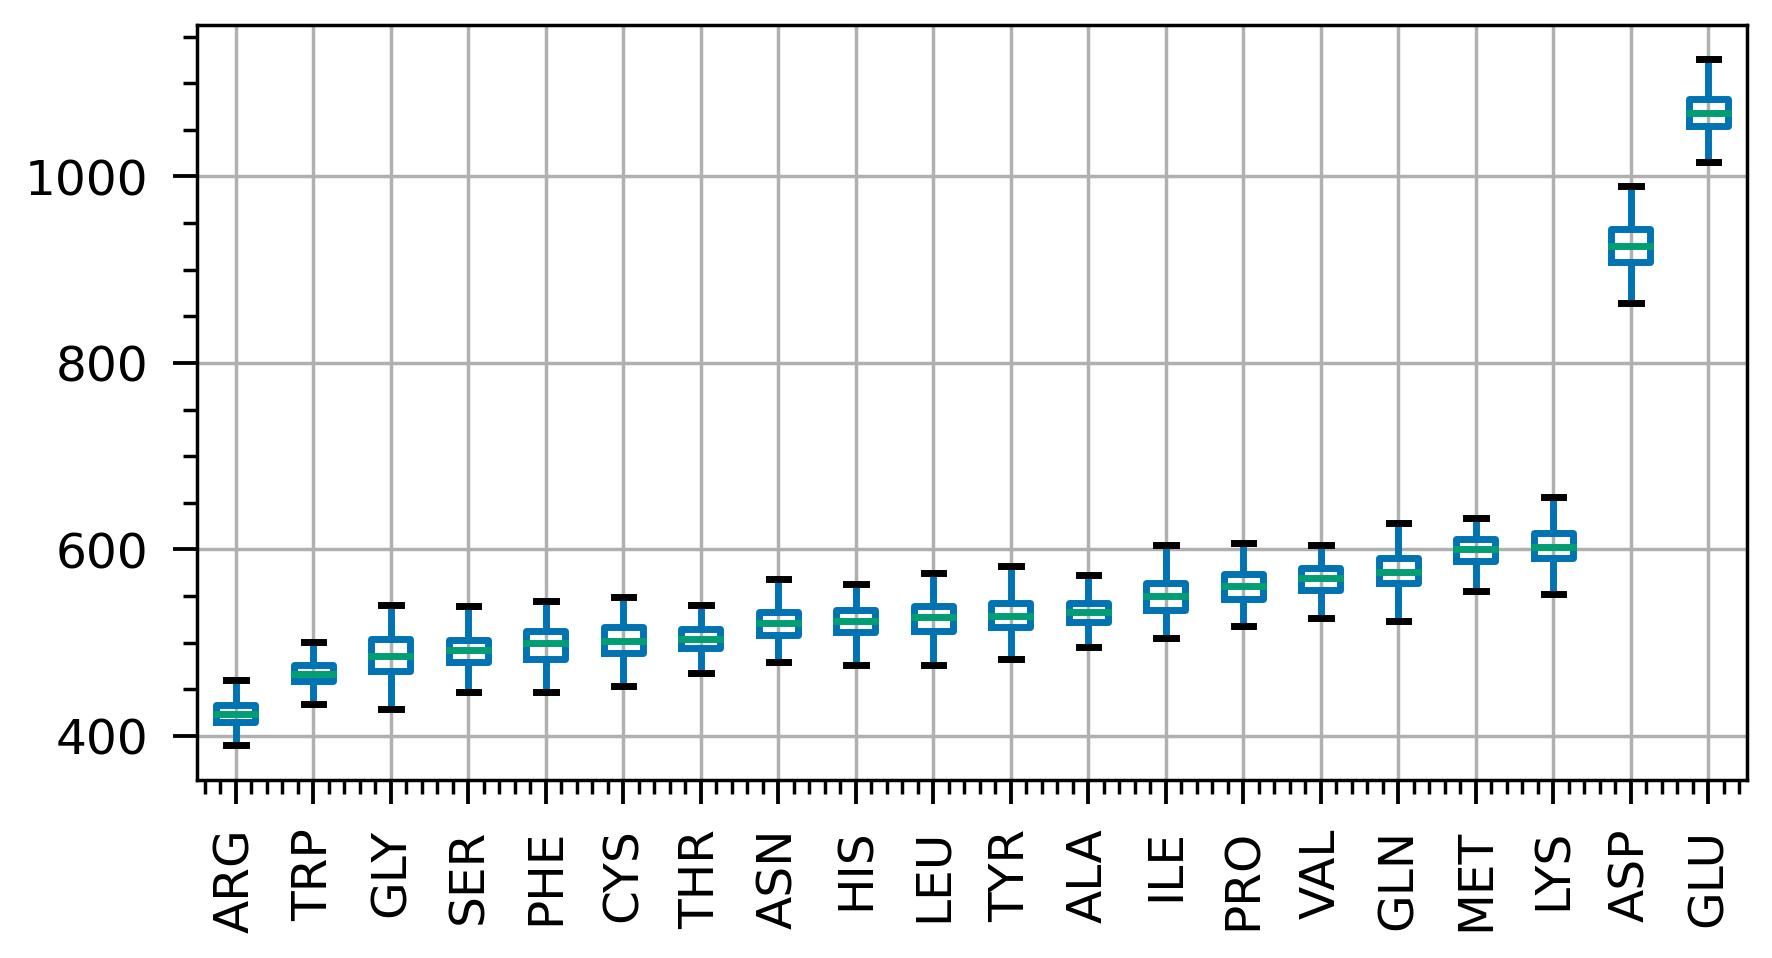

In [6]:
plt.figure(figsize=(4,2))
index_sort = hbonds_w.mean().sort_values().index
hbonds_w = hbonds_w[index_sort]
hbonds_w.boxplot(showfliers=False)

plt.xticks(rotation=90)

In [9]:
hbonds_w = pd.read_csv('../water_per_atom.csv')
hbonds_w.head()

ALA_r     ALA_p     ARG_r     ARG_p     ASN_r     ASN_p     ASP_r  \
0  0.321858  0.564034  0.320219  0.378049  0.336612  0.426292  0.408470   
1  0.321858  0.568376  0.322404  0.382683  0.348634  0.413193  0.408575   
2  0.327322  0.544834  0.321858  0.375216  0.336612  0.406314  0.441362   
3  0.330601  0.568056  0.310383  0.377679  0.337158  0.420363  0.415301   
4  0.315301  0.521368  0.314208  0.379897  0.323497  0.393145  0.423707   

      ASP_p     CYS_r     CYS_p  ...     SER_r     SER_p     THR_r     THR_p  \
0  0.605232  0.320656  0.459930  ...  0.333333  0.400456  0.351874  0.434798   
1  0.635468  0.316520  0.494601  ...  0.315847  0.413594  0.353552  0.412186   
2  0.649655  0.341110  0.495697  ...  0.319126  0.408602  0.363388  0.400600   
3  0.610837  0.335435  0.518327  ...  0.330601  0.416667  0.354645  0.399333   
4  0.654310  0.328499  0.474490  ...  0.324590  0.421805  0.348087  0.403601   

      TRP_r     TRP_p     TYR_r     TYR_p     VAL_r     VAL_p  
0  0.343697  0.374403  0.314754  0.362839  0.344262  0.564646  
1  0.347654  0.376201  0.320765  0.362839  0.383354  0.606061  
2  0.338044  0.366351  0.329508  0.372940  0.363178  0.565111  
3  0.349727  0.371080  0.331148  0.372986  0.364439  0.565657  
4  0.337705  0.375660  0.323497  0.362513  0.344262  0.531194  

[5 rows x 40 columns]

In [10]:
x_residue = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY',
             'HIS','ILE','LEU','LYS','MET','PHE','PRO','SER',
             'THR','TRP','TYR','VAL']


rna = []
pro = []
for i in x_residue:
    rna.append(i+'_r')
    pro.append(i+'_p')

    
hbonds_w_r = hbonds_w[rna]
hbonds_w_p = hbonds_w[pro]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'LYS_r'),
  Text(2, 0, 'ARG_r'),
  Text(3, 0, 'ASN_r'),
  Text(4, 0, 'TYR_r'),
  Text(5, 0, 'ALA_r'),
  Text(6, 0, 'CYS_r'),
  Text(7, 0, 'SER_r'),
  Text(8, 0, 'HIS_r'),
  Text(9, 0, 'GLN_r'),
  Text(10, 0, 'PHE_r'),
  Text(11, 0, 'VAL_r'),
  Text(12, 0, 'GLY_r'),
  Text(13, 0, 'THR_r'),
  Text(14, 0, 'TRP_r'),
  Text(15, 0, 'LEU_r'),
  Text(16, 0, 'PRO_r'),
  Text(17, 0, 'ILE_r'),
  Text(18, 0, 'ASP_r'),
  Text(19, 0, 'GLU_r'),
  Text(20, 0, 'MET_r')])

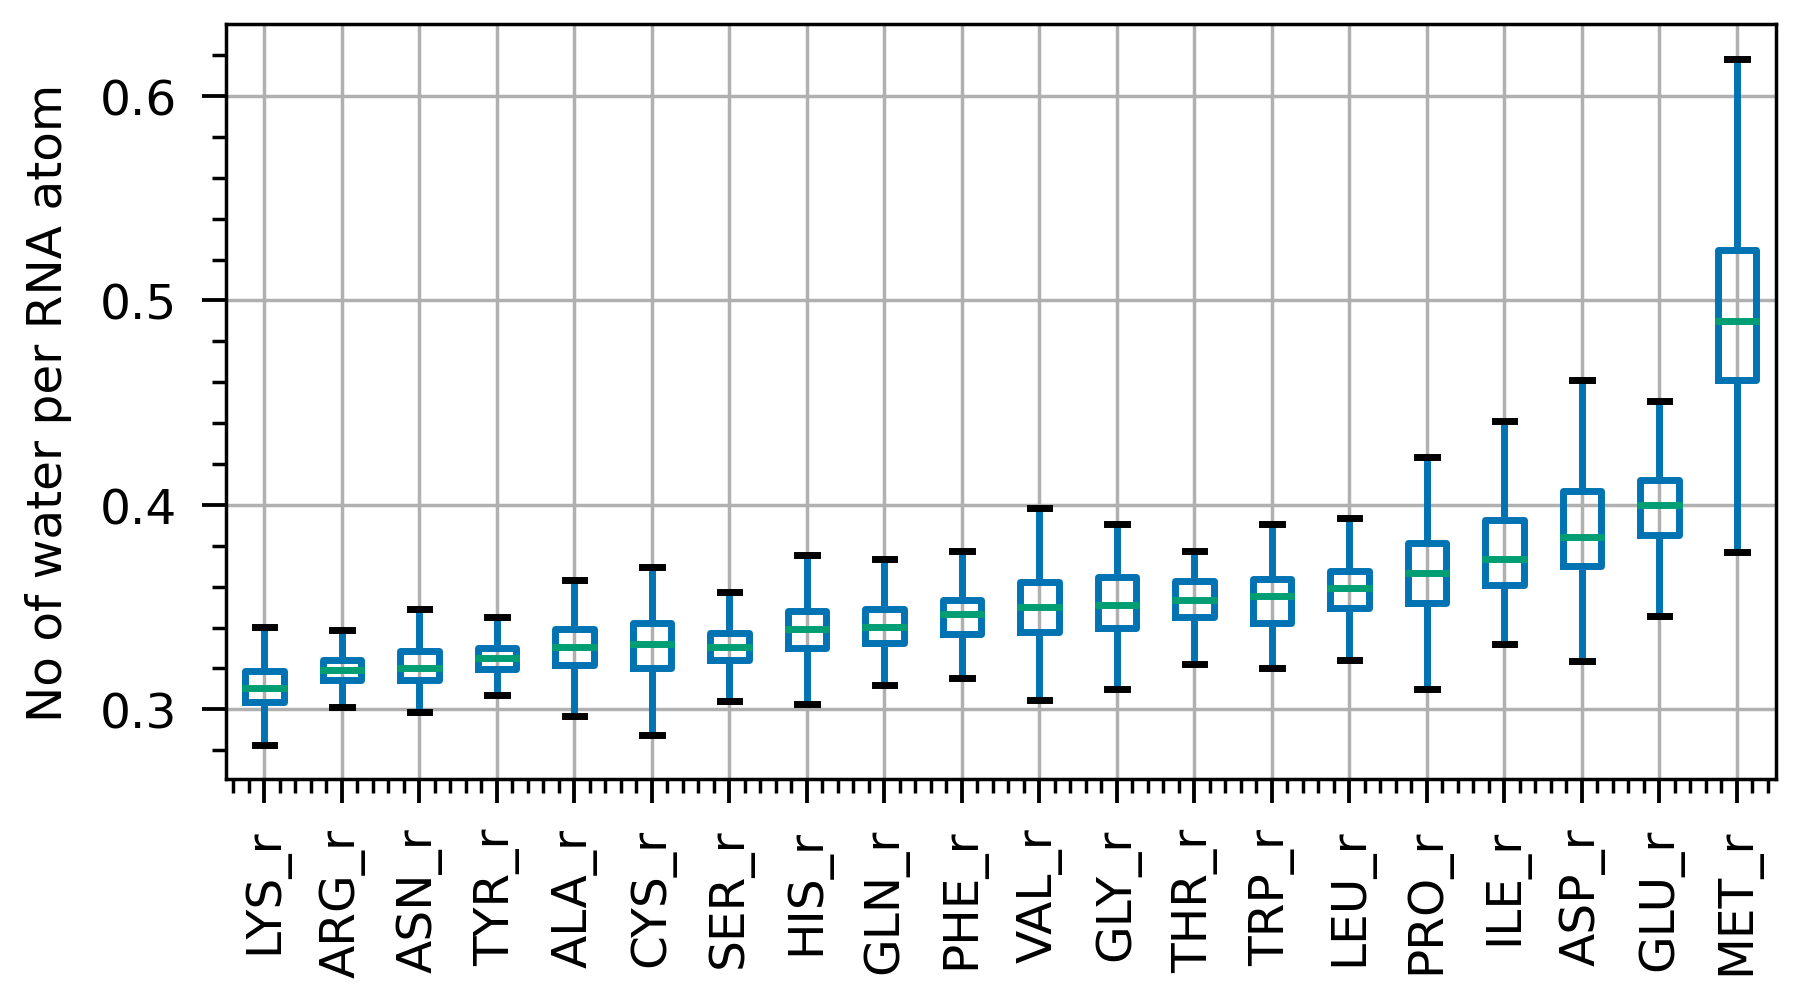

In [13]:
plt.figure(figsize=(4,2))
index_sort_r = hbonds_w_r.mean().sort_values().index
hbonds_w_r = hbonds_w_r[index_sort_r]
hbonds_w_r.boxplot(showfliers=False)
plt.ylabel('No of water per RNA atom')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'ARG_p'),
  Text(2, 0, 'TRP_p'),
  Text(3, 0, 'TYR_p'),
  Text(4, 0, 'ASN_p'),
  Text(5, 0, 'SER_p'),
  Text(6, 0, 'THR_p'),
  Text(7, 0, 'GLN_p'),
  Text(8, 0, 'HIS_p'),
  Text(9, 0, 'PHE_p'),
  Text(10, 0, 'LEU_p'),
  Text(11, 0, 'LYS_p'),
  Text(12, 0, 'CYS_p'),
  Text(13, 0, 'ILE_p'),
  Text(14, 0, 'GLY_p'),
  Text(15, 0, 'ALA_p'),
  Text(16, 0, 'VAL_p'),
  Text(17, 0, 'PRO_p'),
  Text(18, 0, 'ASP_p'),
  Text(19, 0, 'MET_p'),
  Text(20, 0, 'GLU_p')])

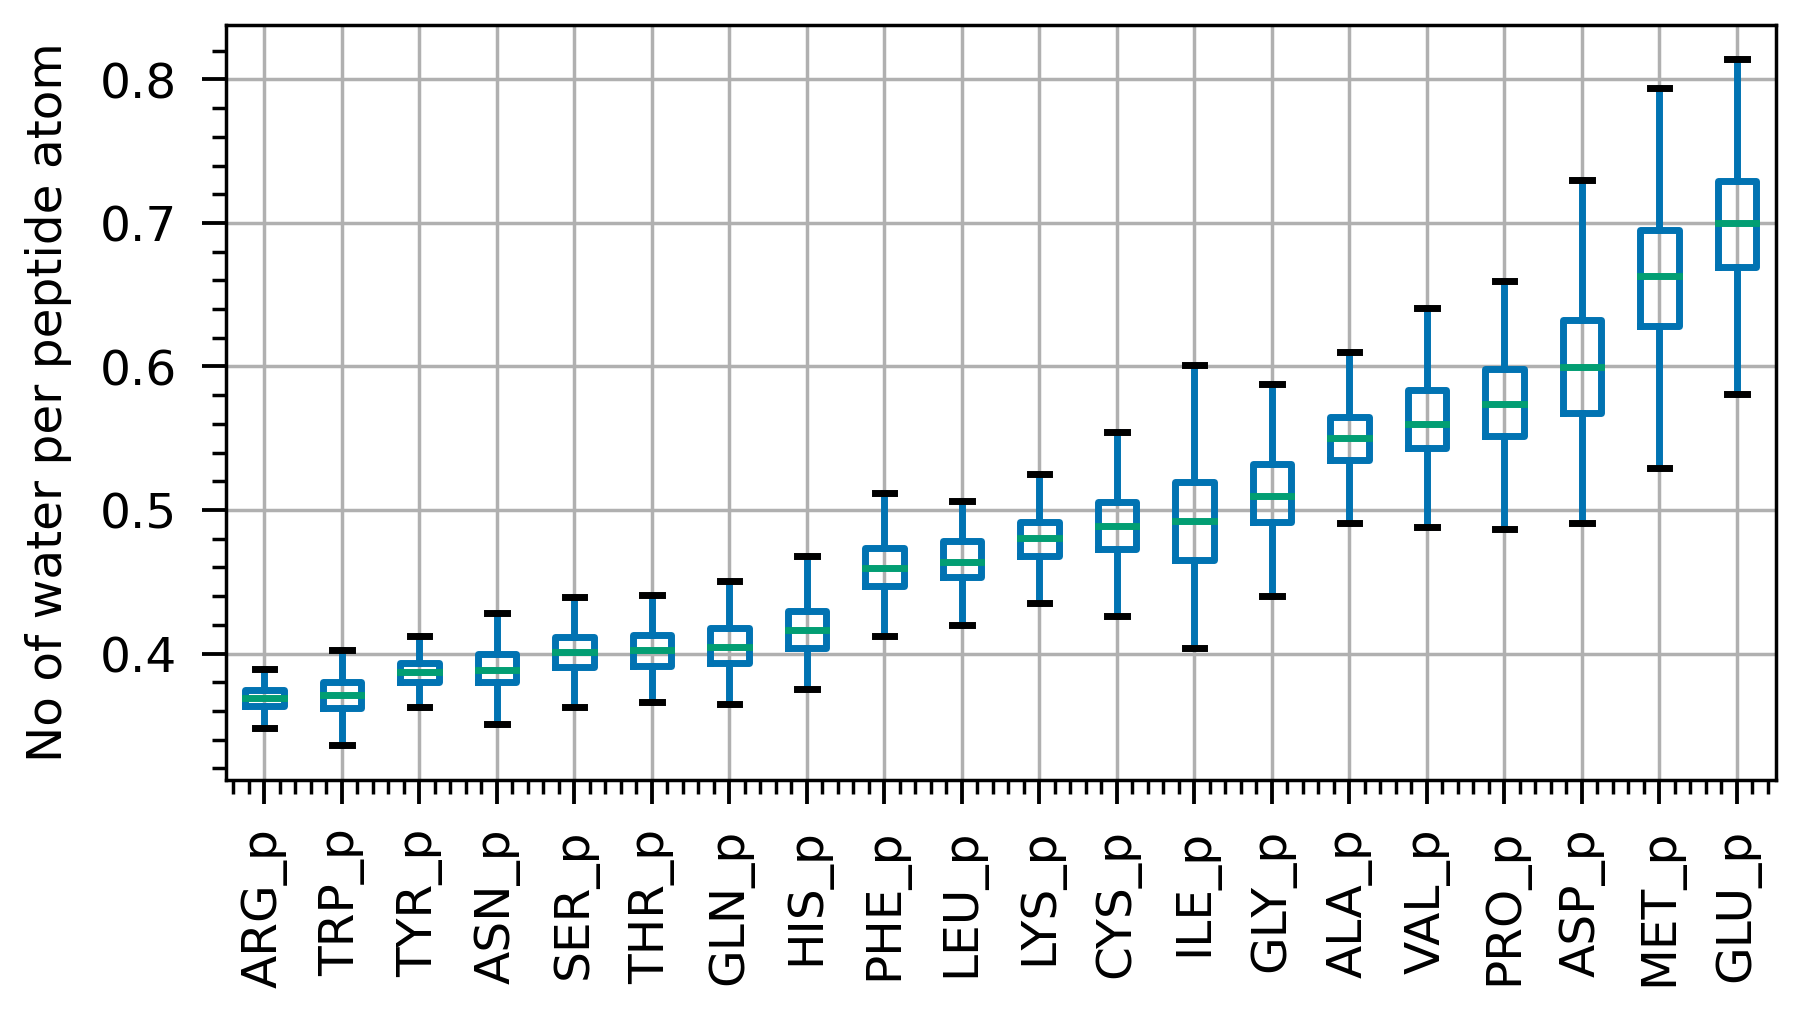

In [14]:
plt.figure(figsize=(4,2))
index_sort = hbonds_w_p.mean().sort_values().index
hbonds_w_p = hbonds_w_p[index_sort]
hbonds_w_p.boxplot(showfliers=False)
plt.ylabel('No of water per peptide atom')
plt.xticks(rotation=90)

In [25]:
index_sort_r = hbonds_w_r.mean().sort_values().index
index_sort_r

Index(['LYS_r', 'ARG_r', 'ASN_r', 'TYR_r', 'ALA_r', 'CYS_r', 'SER_r', 'HIS_r',
       'GLN_r', 'PHE_r', 'VAL_r', 'GLY_r', 'THR_r', 'TRP_r', 'LEU_r', 'PRO_r',
       'ILE_r', 'ASP_r', 'GLU_r', 'MET_r'],
      dtype='object')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20]),
 [Text(1, 0, 'ARG'),
  Text(2, 0, 'TRP'),
  Text(3, 0, 'TYR'),
  Text(4, 0, 'ASN'),
  Text(5, 0, 'SER'),
  Text(6, 0, 'THR'),
  Text(7, 0, 'GLN'),
  Text(8, 0, 'HIS'),
  Text(9, 0, 'PHE'),
  Text(10, 0, 'LEU'),
  Text(11, 0, 'LYS'),
  Text(12, 0, 'CYS'),
  Text(13, 0, 'ILE'),
  Text(14, 0, 'GLY'),
  Text(15, 0, 'ALA'),
  Text(16, 0, 'VAL'),
  Text(17, 0, 'PRO'),
  Text(18, 0, 'ASP'),
  Text(19, 0, 'MET'),
  Text(20, 0, 'GLU'),
  Text(1, 0, 'ARG'),
  Text(2, 0, 'TRP'),
  Text(3, 0, 'TYR'),
  Text(4, 0, 'ASN'),
  Text(5, 0, 'SER'),
  Text(6, 0, 'THR'),
  Text(7, 0, 'GLN'),
  Text(8, 0, 'HIS'),
  Text(9, 0, 'PHE'),
  Text(10, 0, 'LEU'),
  Text(11, 0, 'LYS'),
  Text(12, 0, 'CYS'),
  Text(13, 0, 'ILE'),
  Text(14, 0, 'GLY'),
  Text(15, 0, 'ALA'),
  Text(16, 0, 'VAL'),
  Text(17, 0, 'PRO'),
  Text(18, 0, 'ASP

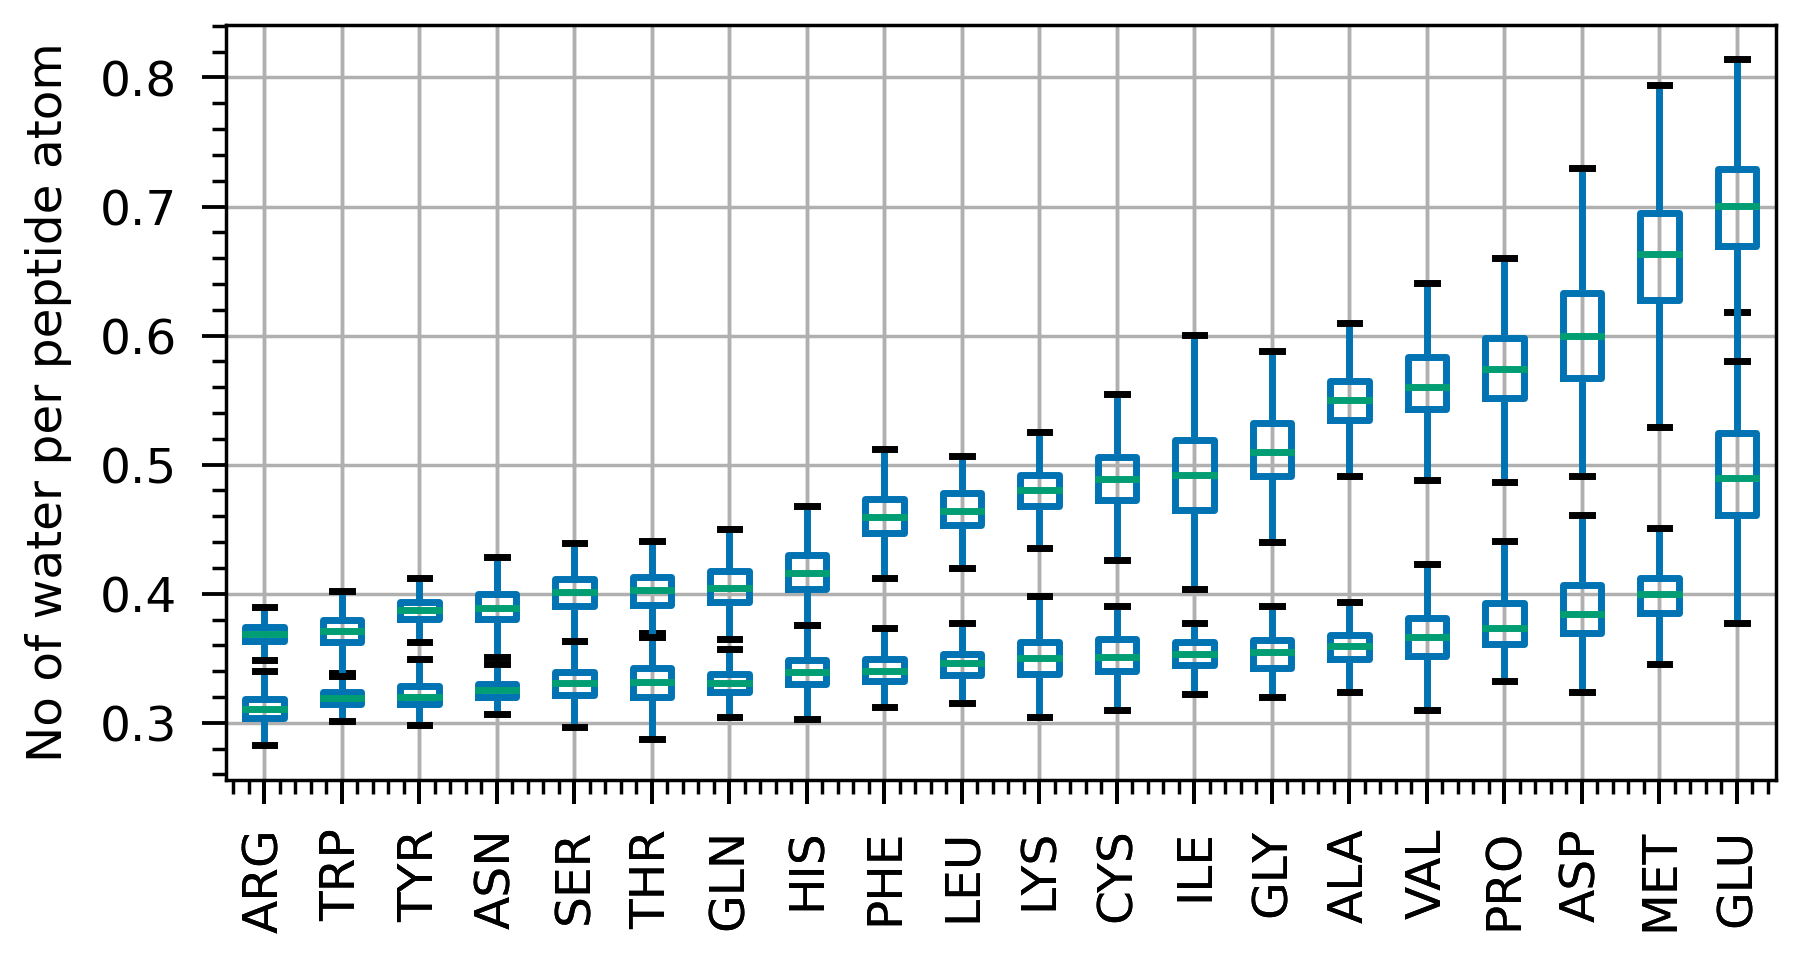

In [30]:
plt.figure(figsize=(4,2))
index_sort_r = hbonds_w_r.mean().sort_values().index

hbonds_w_r = hbonds_w_r[index_sort_r]

hbonds_w_r = hbonds_w_r.rename(columns={abbr: abbr.split('_')[0] for abbr in index_sort_r} )

hbonds_w_r.boxplot(showfliers=False)


index_sort_p = hbonds_w_p.mean().sort_values().index

hbonds_w_p = hbonds_w_p[index_sort_p]

hbonds_w_p = hbonds_w_p.rename(columns={abbr: abbr.split('_')[0] for abbr in index_sort_p} )

index_sort_r2 = [abbr.split('_')[0] for abbr in index_sort_r]
index_sort_p2 = [abbr.split('_')[0] for abbr in index_sort_p]



hbonds_w_p.boxplot(showfliers=False)
plt.ylabel('No of water per peptide atom')
plt.xticks(rotation=90)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


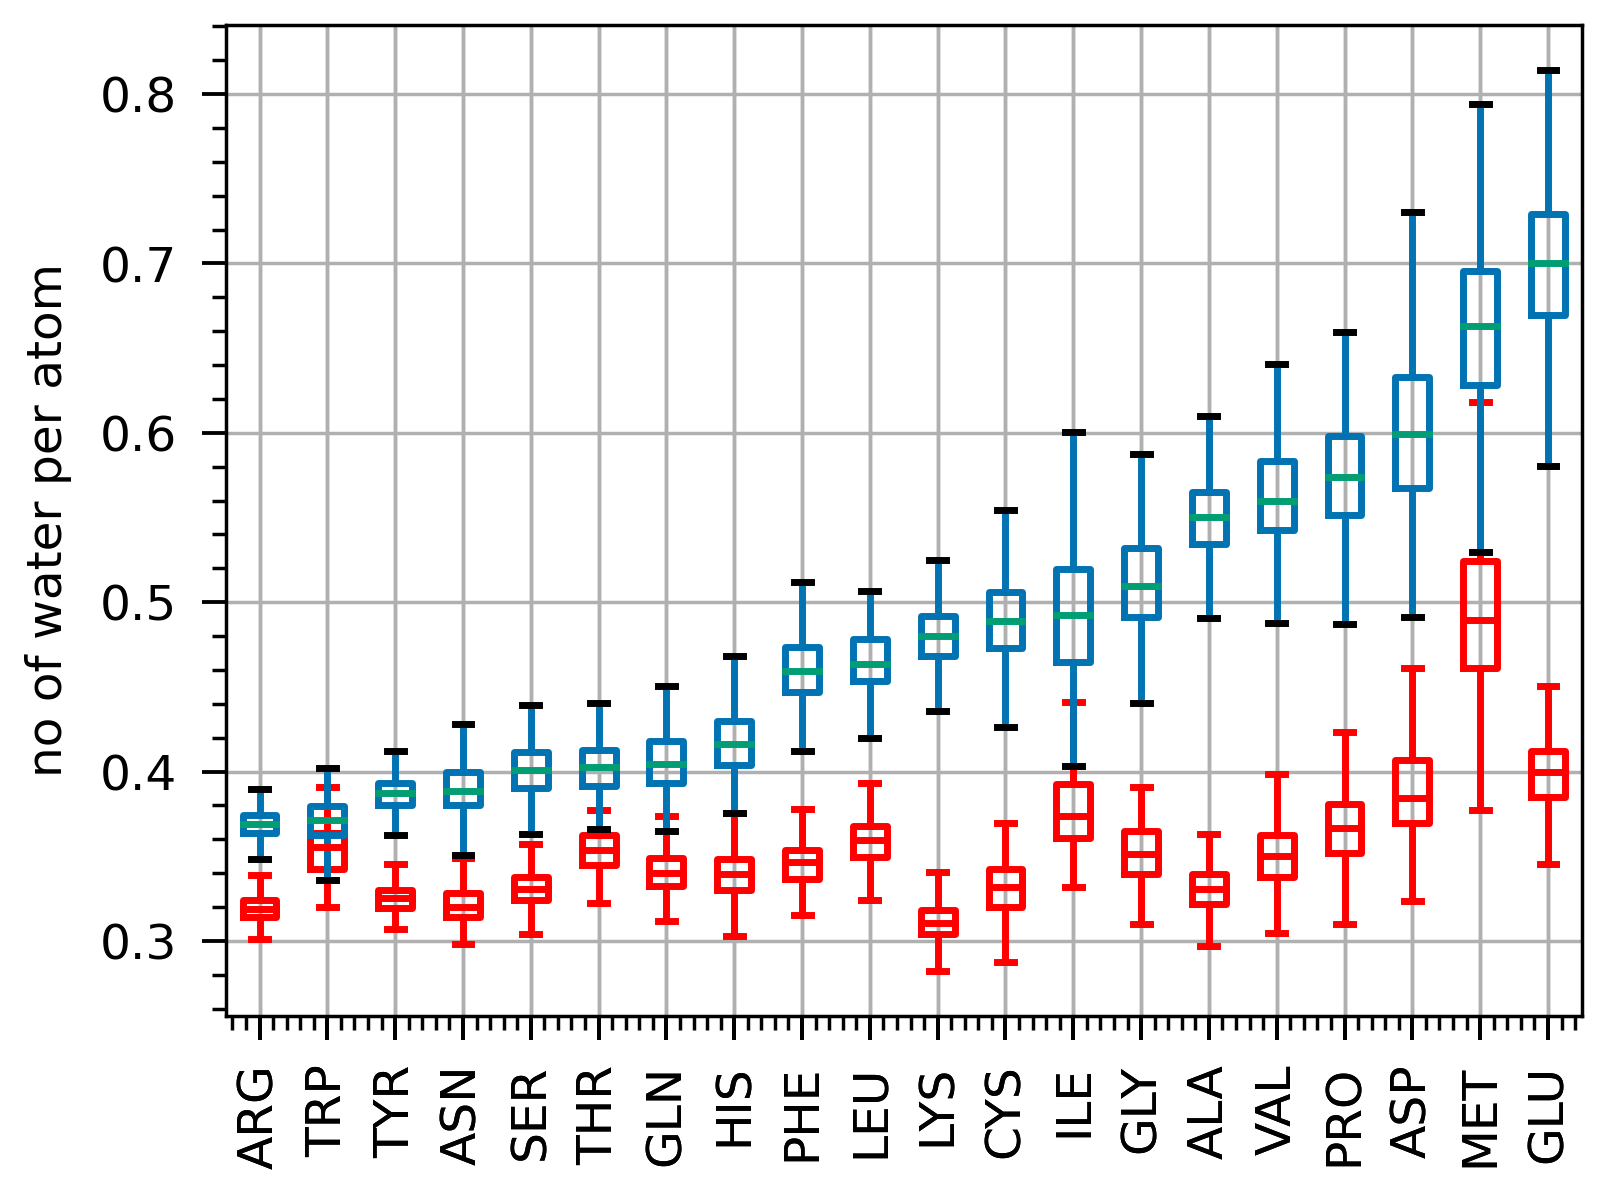

In [36]:
hbonds_w_r = hbonds_w_r[index_sort_p2]
hbonds_w_p = hbonds_w_p[index_sort_p2]
hbonds_w_r.boxplot(showfliers=False,color='red')
hbonds_w_p.boxplot(showfliers=False)
plt.ylabel('no of water per atom')
plt.xticks(rotation=90)
plt.legend()

In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [3]:
import parmed
struture = parmed.load_file('../LYS/gromacs/topol.top',xyz='../LYS/output.gro')

In [10]:
u = mda.Universe(struture)
#u = mda.Universe(struture,'../LYS/traj_vysa.dcd')

In [19]:
hbonds = HBA(
  universe=u,
  between=['resname SOL', 'protein']
  )
hbonds.run()

In [20]:
hbonds.count_by_time()

array([46])

In [19]:
len(hbonds.acceptors_sel)

335

In [ ]:
pwd

In [ ]:
def hbonds_on_cluster2(u, dens=125, start=1, stop=10, step=2):

        all_x_rp = pd.DataFrame()
        all_x_rr = pd.DataFrame()

        frame_no = start

        u2 = u
        for frame in u.trajectory[start:stop:step]:

            centroid, to_cluster, clustered_list, res_list,ind_list = clustering(u, frame, dens)

            selection = 'resindex '

            for item in res_list:
                selection += str(item)+ ' or resindex '
            selection = selection[0:-13]

            sel = u.select_atoms(selection)

            na_group = u.select_atoms(f"({selection}) and resname U")

            aa_group = u.select_atoms(f'({selection}) and protein')

            no_rna= len(np.unique(na_group.resids)) ### no of RNA resids in the cluster
            
            

            frp = plf.Fingerprint() ### RNA - Protein

            frp.run(u2.trajectory[frame_no:frame_no+1:1], na_group, aa_group)

            df_rp = frp.to_dataframe()

            x_rp=df_rp.groupby(axis=1, level=2).sum()
